In [67]:
import pypsa
import xarray as xr
import linopy as lp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import beta
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error

In [9]:
# SOC indem die Füllstände des H2 Stores aufsummiert werden und durch die installierte Kapazität geteilt werden

def get_hydrogen_soc(n):
    hydrogen_e = 0
    hydrogen_e_nom = 0

    for year in [2045, 2040, 2035, 2030, 2020]:

        hydrogen_e += n.stores_t.e[f"DE0 0 H2 Store-{year}"]
        hydrogen_e_nom += n.stores.e_nom[f"DE0 0 H2 Store-{year}"]

    soc = hydrogen_e / hydrogen_e_nom

    return soc

- ein Netzwerk mit perfect foresight lösen um mean für hydrogen und methanol stores zu bekommen.

- ich nehme nicht das Netzwerk direkt, weil da sind CO2 Constraints mit drin und deswegen ist der Preis vom hydrogen (weil die Konkurrenz teurer ist, höher)
    - Preis ist bei 90€ anstatt wie 19€ jetzt
    - wenn ich die 90 nehme dann hat man wieder so lange phasen von niedrigen Preisen.

- sollte aber kein Problem sein, weil sobald alle constraints drin sind der Wert ja einfach angepasst werden kann bzw. automatisch aktualisiert wird

In [5]:
n_perfect_forecast = pypsa.Network('base_s_1__none_2045_lt.nc')
n_perfect_forecast.optimize.fix_optimal_capacities()
n_perfect_forecast.optimize.create_model()

n_perfect_forecast.optimize.solve_model(
    solver_name = 'gurobi'
)

INFO:pypsa.io:Imported network base_s_1__none_2045_lt.nc has buses, carriers, generators, global_constraints, links, loads, storage_units, stores
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:01<00:00,  6.19it/s]
INFO:linopy.io: Writing time: 9.1s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-zu9ndy2g.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-zu9ndy2g.lp


Reading time = 3.41 seconds


INFO:gurobipy:Reading time = 3.41 seconds


obj: 1442481 rows, 712467 columns, 2747706 nonzeros


INFO:gurobipy:obj: 1442481 rows, 712467 columns, 2747706 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 1442481 rows, 712467 columns and 2747706 nonzeros


INFO:gurobipy:Optimize a model with 1442481 rows, 712467 columns and 2747706 nonzeros


Model fingerprint: 0x706770b8


INFO:gurobipy:Model fingerprint: 0x706770b8


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+01, 7e+02]


INFO:gurobipy:  Bounds range     [2e+01, 7e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 1375442 rows and 269290 columns


INFO:gurobipy:Presolve removed 1375442 rows and 269290 columns


Presolve time: 3.05s


INFO:gurobipy:Presolve time: 3.05s


Presolved: 67039 rows, 443177 columns, 982536 nonzeros


INFO:gurobipy:Presolved: 67039 rows, 443177 columns, 982536 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.07s


INFO:gurobipy:Ordering time: 0.07s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 1.990e+05


INFO:gurobipy: AA' NZ     : 1.990e+05


 Factor NZ  : 1.666e+06 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.666e+06 (roughly 200 MB of memory)


 Factor Ops : 6.984e+07 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 6.984e+07 (less than 1 second per iteration)


 Threads    : 3


INFO:gurobipy: Threads    : 3


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.01494862e+14 -2.58738544e+15  1.28e+11 1.76e+01  2.86e+10     4s


INFO:gurobipy:   0   1.01494862e+14 -2.58738544e+15  1.28e+11 1.76e+01  2.86e+10     4s


   1   1.86976585e+13 -2.08440180e+14  2.19e+10 2.10e-12  4.58e+09     4s


INFO:gurobipy:   1   1.86976585e+13 -2.08440180e+14  2.19e+10 2.10e-12  4.58e+09     4s


   2   2.29768586e+12 -6.07800877e+13  2.16e+09 8.94e-01  4.89e+08     4s


INFO:gurobipy:   2   2.29768586e+12 -6.07800877e+13  2.16e+09 8.94e-01  4.89e+08     4s


   3   4.85519176e+11 -1.85125029e+13  1.35e+08 6.33e-02  4.45e+07     4s


INFO:gurobipy:   3   4.85519176e+11 -1.85125029e+13  1.35e+08 6.33e-02  4.45e+07     4s


   4   2.88732691e+11 -5.48163388e+12  3.99e+07 1.37e-11  1.21e+07     4s


INFO:gurobipy:   4   2.88732691e+11 -5.48163388e+12  3.99e+07 1.37e-11  1.21e+07     4s


   5   2.35748468e+11 -2.53994400e+12  3.11e+07 1.28e-11  6.69e+06     4s


INFO:gurobipy:   5   2.35748468e+11 -2.53994400e+12  3.11e+07 1.28e-11  6.69e+06     4s


   6   1.53300928e+11 -1.79262944e+12  2.01e+07 1.01e-11  4.32e+06     4s


INFO:gurobipy:   6   1.53300928e+11 -1.79262944e+12  2.01e+07 1.01e-11  4.32e+06     4s


   7   1.15221933e+11 -1.49089684e+12  1.48e+07 7.34e-12  3.31e+06     4s


INFO:gurobipy:   7   1.15221933e+11 -1.49089684e+12  1.48e+07 7.34e-12  3.31e+06     4s


   8   9.34386446e+10 -1.14042862e+12  1.14e+07 4.61e-12  2.46e+06     4s


INFO:gurobipy:   8   9.34386446e+10 -1.14042862e+12  1.14e+07 4.61e-12  2.46e+06     4s


   9   5.04919013e+10 -3.23663358e+11  3.09e+06 9.21e-12  6.53e+05     5s


INFO:gurobipy:   9   5.04919013e+10 -3.23663358e+11  3.09e+06 9.21e-12  6.53e+05     5s


  10   2.89142338e+10 -7.43584421e+10  3.53e+05 2.85e-12  1.37e+05     5s


INFO:gurobipy:  10   2.89142338e+10 -7.43584421e+10  3.53e+05 2.85e-12  1.37e+05     5s


  11   2.35081235e+10 -2.79279452e+10  1.02e+05 1.94e-12  6.35e+04     5s


INFO:gurobipy:  11   2.35081235e+10 -2.79279452e+10  1.02e+05 1.94e-12  6.35e+04     5s


  12   2.23120720e+10 -1.31000605e+10  7.78e+04 1.94e-12  4.40e+04     5s


INFO:gurobipy:  12   2.23120720e+10 -1.31000605e+10  7.78e+04 1.94e-12  4.40e+04     5s


  13   2.13428280e+10 -4.88525196e+09  6.20e+04 3.25e-06  3.28e+04     5s


INFO:gurobipy:  13   2.13428280e+10 -4.88525196e+09  6.20e+04 3.25e-06  3.28e+04     5s


  14   2.04262926e+10 -5.61120736e+08  4.93e+04 9.89e-06  2.62e+04     5s


INFO:gurobipy:  14   2.04262926e+10 -5.61120736e+08  4.93e+04 9.89e-06  2.62e+04     5s


  15   1.95337508e+10  3.62730575e+09  3.84e+04 1.93e-05  1.99e+04     5s


INFO:gurobipy:  15   1.95337508e+10  3.62730575e+09  3.84e+04 1.93e-05  1.99e+04     5s


  16   1.82809809e+10  6.15528098e+09  2.54e+04 2.95e-05  1.50e+04     5s


INFO:gurobipy:  16   1.82809809e+10  6.15528098e+09  2.54e+04 2.95e-05  1.50e+04     5s


  17   1.75728197e+10  9.99008558e+09  1.93e+04 4.24e-05  9.52e+03     5s


INFO:gurobipy:  17   1.75728197e+10  9.99008558e+09  1.93e+04 4.24e-05  9.52e+03     5s


  18   1.69517989e+10  1.18955499e+10  1.41e+04 4.62e-05  6.41e+03     6s


INFO:gurobipy:  18   1.69517989e+10  1.18955499e+10  1.41e+04 4.62e-05  6.41e+03     6s


  19   1.64127554e+10  1.27571118e+10  9.93e+03 4.92e-05  4.62e+03     6s


INFO:gurobipy:  19   1.64127554e+10  1.27571118e+10  9.93e+03 4.92e-05  4.62e+03     6s


  20   1.61256197e+10  1.32951946e+10  7.78e+03 4.81e-05  3.58e+03     6s


INFO:gurobipy:  20   1.61256197e+10  1.32951946e+10  7.78e+03 4.81e-05  3.58e+03     6s


  21   1.59432537e+10  1.37640943e+10  6.50e+03 4.52e-05  2.78e+03     6s


INFO:gurobipy:  21   1.59432537e+10  1.37640943e+10  6.50e+03 4.52e-05  2.78e+03     6s


  22   1.57434659e+10  1.41821384e+10  5.09e+03 4.00e-05  2.02e+03     6s


INFO:gurobipy:  22   1.57434659e+10  1.41821384e+10  5.09e+03 4.00e-05  2.02e+03     6s


  23   1.54652638e+10  1.45077854e+10  3.18e+03 3.39e-05  1.24e+03     6s


INFO:gurobipy:  23   1.54652638e+10  1.45077854e+10  3.18e+03 3.39e-05  1.24e+03     6s


  24   1.53110917e+10  1.46443559e+10  2.17e+03 2.85e-05  8.59e+02     6s


INFO:gurobipy:  24   1.53110917e+10  1.46443559e+10  2.17e+03 2.85e-05  8.59e+02     6s


  25   1.52188111e+10  1.47538248e+10  1.56e+03 2.26e-05  6.01e+02     6s


INFO:gurobipy:  25   1.52188111e+10  1.47538248e+10  1.56e+03 2.26e-05  6.01e+02     6s


  26   1.51444084e+10  1.47957527e+10  1.06e+03 1.97e-05  4.44e+02     7s


INFO:gurobipy:  26   1.51444084e+10  1.47957527e+10  1.06e+03 1.97e-05  4.44e+02     7s


  27   1.51363375e+10  1.48144093e+10  1.01e+03 1.83e-05  4.12e+02     7s


INFO:gurobipy:  27   1.51363375e+10  1.48144093e+10  1.01e+03 1.83e-05  4.12e+02     7s


  28   1.51175312e+10  1.48389239e+10  8.78e+02 1.63e-05  3.57e+02     7s


INFO:gurobipy:  28   1.51175312e+10  1.48389239e+10  8.78e+02 1.63e-05  3.57e+02     7s


  29   1.50690175e+10  1.48781846e+10  5.54e+02 1.29e-05  2.42e+02     7s


INFO:gurobipy:  29   1.50690175e+10  1.48781846e+10  5.54e+02 1.29e-05  2.42e+02     7s


  30   1.50629108e+10  1.48872217e+10  5.15e+02 1.21e-05  2.23e+02     7s


INFO:gurobipy:  30   1.50629108e+10  1.48872217e+10  5.15e+02 1.21e-05  2.23e+02     7s


  31   1.50415407e+10  1.49291058e+10  3.73e+02 7.82e-06  1.45e+02     7s


INFO:gurobipy:  31   1.50415407e+10  1.49291058e+10  3.73e+02 7.82e-06  1.45e+02     7s


  32   1.50240227e+10  1.49440796e+10  2.59e+02 6.12e-06  1.03e+02     7s


INFO:gurobipy:  32   1.50240227e+10  1.49440796e+10  2.59e+02 6.12e-06  1.03e+02     7s


  33   1.50102903e+10  1.49562997e+10  1.70e+02 4.56e-06  6.91e+01     7s


INFO:gurobipy:  33   1.50102903e+10  1.49562997e+10  1.70e+02 4.56e-06  6.91e+01     7s


  34   1.50033722e+10  1.49660488e+10  1.27e+02 3.18e-06  4.83e+01     8s


INFO:gurobipy:  34   1.50033722e+10  1.49660488e+10  1.27e+02 3.18e-06  4.83e+01     8s


  35   1.49980880e+10  1.49708932e+10  9.46e+01 2.43e-06  3.54e+01     8s


INFO:gurobipy:  35   1.49980880e+10  1.49708932e+10  9.46e+01 2.43e-06  3.54e+01     8s


  36   1.49942348e+10  1.49721405e+10  7.08e+01 2.23e-06  2.83e+01     8s


INFO:gurobipy:  36   1.49942348e+10  1.49721405e+10  7.08e+01 2.23e-06  2.83e+01     8s


  37   1.49918318e+10  1.49752957e+10  5.58e+01 1.64e-06  2.14e+01     8s


INFO:gurobipy:  37   1.49918318e+10  1.49752957e+10  5.58e+01 1.64e-06  2.14e+01     8s


  38   1.49877315e+10  1.49778026e+10  3.09e+01 1.19e-06  1.27e+01     8s


INFO:gurobipy:  38   1.49877315e+10  1.49778026e+10  3.09e+01 1.19e-06  1.27e+01     8s


  39   1.49861487e+10  1.49793408e+10  2.14e+01 9.00e-07  8.69e+00     8s


INFO:gurobipy:  39   1.49861487e+10  1.49793408e+10  2.14e+01 9.00e-07  8.69e+00     8s


  40   1.49851841e+10  1.49800945e+10  1.57e+01 7.67e-07  6.45e+00     8s


INFO:gurobipy:  40   1.49851841e+10  1.49800945e+10  1.57e+01 7.67e-07  6.45e+00     8s


  41   1.49846383e+10  1.49808885e+10  1.25e+01 6.58e-07  4.80e+00     8s


INFO:gurobipy:  41   1.49846383e+10  1.49808885e+10  1.25e+01 6.58e-07  4.80e+00     8s


  42   1.49838720e+10  1.49813297e+10  7.96e+00 6.23e-07  3.17e+00     8s


INFO:gurobipy:  42   1.49838720e+10  1.49813297e+10  7.96e+00 6.23e-07  3.17e+00     8s


  43   1.49834249e+10  1.49815054e+10  5.37e+00 5.91e-07  2.31e+00     9s


INFO:gurobipy:  43   1.49834249e+10  1.49815054e+10  5.37e+00 5.91e-07  2.31e+00     9s


  44   1.49832254e+10  1.49817181e+10  4.21e+00 5.26e-07  1.79e+00     9s


INFO:gurobipy:  44   1.49832254e+10  1.49817181e+10  4.21e+00 5.26e-07  1.79e+00     9s


  45   1.49830343e+10  1.49819071e+10  3.11e+00 4.72e-07  1.32e+00     9s


INFO:gurobipy:  45   1.49830343e+10  1.49819071e+10  3.11e+00 4.72e-07  1.32e+00     9s


  46   1.49829688e+10  1.49819645e+10  2.73e+00 4.49e-07  1.16e+00     9s


INFO:gurobipy:  46   1.49829688e+10  1.49819645e+10  2.73e+00 4.49e-07  1.16e+00     9s


  47   1.49829277e+10  1.49819860e+10  2.51e+00 4.39e-07  1.08e+00     9s


INFO:gurobipy:  47   1.49829277e+10  1.49819860e+10  2.51e+00 4.39e-07  1.08e+00     9s


  48   1.49827542e+10  1.49821579e+10  1.52e+00 3.54e-07  6.54e-01     9s


INFO:gurobipy:  48   1.49827542e+10  1.49821579e+10  1.52e+00 3.54e-07  6.54e-01     9s


  49   1.49826000e+10  1.49822826e+10  6.79e-01 2.54e-07  3.05e-01     9s


INFO:gurobipy:  49   1.49826000e+10  1.49822826e+10  6.79e-01 2.54e-07  3.05e-01     9s


  50   1.49825165e+10  1.49823552e+10  2.37e-01 1.61e-07  1.21e-01    10s


INFO:gurobipy:  50   1.49825165e+10  1.49823552e+10  2.37e-01 1.61e-07  1.21e-01    10s


  51   1.49824955e+10  1.49823769e+10  1.29e-01 1.34e-07  7.91e-02    10s


INFO:gurobipy:  51   1.49824955e+10  1.49823769e+10  1.29e-01 1.34e-07  7.91e-02    10s


  52   1.49824871e+10  1.49824120e+10  8.68e-02 8.61e-08  5.04e-02    10s


INFO:gurobipy:  52   1.49824871e+10  1.49824120e+10  8.68e-02 8.61e-08  5.04e-02    10s


  53   1.49824786e+10  1.49824394e+10  4.47e-02 4.70e-08  2.57e-02    10s


INFO:gurobipy:  53   1.49824786e+10  1.49824394e+10  4.47e-02 4.70e-08  2.57e-02    10s


  54   1.49824727e+10  1.49824526e+10  1.70e-02 2.70e-08  1.17e-02    10s


INFO:gurobipy:  54   1.49824727e+10  1.49824526e+10  1.70e-02 2.70e-08  1.17e-02    10s


  55   1.49824710e+10  1.49824604e+10  9.36e-03 1.47e-08  6.25e-03    10s


INFO:gurobipy:  55   1.49824710e+10  1.49824604e+10  9.36e-03 1.47e-08  6.25e-03    10s


  56   1.49824695e+10  1.49824658e+10  2.58e-03 1.08e-08  2.04e-03    10s


INFO:gurobipy:  56   1.49824695e+10  1.49824658e+10  2.58e-03 1.08e-08  2.04e-03    10s


  57   1.49824691e+10  1.49824676e+10  1.10e-03 1.27e-08  8.71e-04    11s


INFO:gurobipy:  57   1.49824691e+10  1.49824676e+10  1.10e-03 1.27e-08  8.71e-04    11s


  58   1.49824689e+10  1.49824684e+10  2.99e-04 1.27e-08  2.86e-04    11s


INFO:gurobipy:  58   1.49824689e+10  1.49824684e+10  2.99e-04 1.27e-08  2.86e-04    11s


  59   1.49824689e+10  1.49824687e+10  6.77e-05 6.59e-09  8.82e-05    11s


INFO:gurobipy:  59   1.49824689e+10  1.49824687e+10  6.77e-05 6.59e-09  8.82e-05    11s


  60   1.49824689e+10  1.49824688e+10  3.75e-05 1.56e-09  2.56e-05    11s


INFO:gurobipy:  60   1.49824689e+10  1.49824688e+10  3.75e-05 1.56e-09  2.56e-05    11s


  61   1.49824688e+10  1.49824688e+10  6.85e-07 6.13e-10  2.76e-06    11s


INFO:gurobipy:  61   1.49824688e+10  1.49824688e+10  6.85e-07 6.13e-10  2.76e-06    11s


  62   1.49824688e+10  1.49824688e+10  1.46e-06 2.10e-10  4.05e-07    11s


INFO:gurobipy:  62   1.49824688e+10  1.49824688e+10  1.46e-06 2.10e-10  4.05e-07    11s


  63   1.49824688e+10  1.49824688e+10  9.24e-07 2.21e-10  7.31e-08    11s


INFO:gurobipy:  63   1.49824688e+10  1.49824688e+10  9.24e-07 2.21e-10  7.31e-08    11s


  64   1.49824688e+10  1.49824688e+10  8.05e-07 2.22e-10  1.48e-08    11s


INFO:gurobipy:  64   1.49824688e+10  1.49824688e+10  8.05e-07 2.22e-10  1.48e-08    11s


  65   1.49824688e+10  1.49824688e+10  9.83e-07 2.21e-10  3.36e-09    11s


INFO:gurobipy:  65   1.49824688e+10  1.49824688e+10  9.83e-07 2.21e-10  3.36e-09    11s


INFO:gurobipy:


Barrier solved model in 65 iterations and 11.45 seconds (8.88 work units)


INFO:gurobipy:Barrier solved model in 65 iterations and 11.45 seconds (8.88 work units)


Optimal objective 1.49824688e+10


INFO:gurobipy:Optimal objective 1.49824688e+10


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


    9865 DPushes remaining with DInf 0.0000000e+00                12s


INFO:gurobipy:    9865 DPushes remaining with DInf 0.0000000e+00                12s


       0 DPushes remaining with DInf 0.0000000e+00                12s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                12s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


   25816 PPushes remaining with PInf 1.5543499e-03                12s


INFO:gurobipy:   25816 PPushes remaining with PInf 1.5543499e-03                12s


       0 PPushes remaining with PInf 0.0000000e+00                13s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                13s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.9599590e-04     13s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.9599590e-04     13s


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   35684    1.4982469e+10   0.000000e+00   1.959958e-04     13s


INFO:gurobipy:   35684    1.4982469e+10   0.000000e+00   1.959958e-04     13s


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


   35694    1.4982469e+10   0.000000e+00   0.000000e+00     14s


INFO:gurobipy:   35694    1.4982469e+10   0.000000e+00   0.000000e+00     14s


INFO:gurobipy:


Solved in 35694 iterations and 13.91 seconds (9.86 work units)


INFO:gurobipy:Solved in 35694 iterations and 13.91 seconds (9.86 work units)


Optimal objective  1.498246885e+10


INFO:gurobipy:Optimal objective  1.498246885e+10
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 712467 primals, 1442481 duals
Objective: 1.50e+10
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.


('ok', 'optimal')

- dann netzwerk mit rolling horizon lösen:
    - marginal cost des methanol und hydrogen stores auf mean des perfect foresight netzes legen
    - cyclic aus, weil sonst nicht long term gestored werden kann (damit es einfacher ist einfach für alle)
    - dann optimieren. overlap auf 8, ansonsten gibt preisspitzen weil billigere Strompreise durch PV am nächsten tag nicht abgeschätzt werden können
    - e_initial des h2 speichers auf den wert des perfect-foresight modells setzen

In [94]:
n = pypsa.Network('base_s_1__none_2045_lt.nc')

# alle hydrogen related stores
stores = n.stores[n.stores.carrier.str.contains("H2", case=False, na=False)].index


# marginal price für alle der mean
for i in stores:
    n.stores.loc[i, 'marginal_cost'] = n_perfect_forecast.buses_t.marginal_price['DE0 0 H2'].mean()

# gleiches für den einen methanol store 
n.stores.loc['DE methanol Store', 'marginal_cost'] = n_perfect_forecast.buses_t.marginal_price["DE methanol"].mean()

# bei allen stores wird cyclic auf false gesetzt
for i in n.stores.index:
    n.stores.loc[i, 'e_cyclic'] = False

# initial storage aus perfect foresight
n.stores.loc['DE0 0 H2 Store-2045', 'e_initial'] = 5 * 10e6
n.stores.loc['DE0 0 H2 Store-2040', 'e_initial'] = 5 * 10e5
n.stores.loc['DE0 0 H2 Store-2035', 'e_initial'] = 0
n.stores.loc['DE0 0 H2 Store-2030', 'e_initial'] = 0


# optimierung mit horizon = 48 (144h) und overlap = 8
n.optimize.fix_optimal_capacities()
n.optimize.create_model()

n.optimize.optimize_with_rolling_horizon(
    horizon = 48,
    overlap = 8,
    solver_name = 'gurobi'
)

INFO:pypsa.io:Imported network base_s_1__none_2045_lt.nc has buses, carriers, generators, global_constraints, links, loads, storage_units, stores
{'DE', 'EU'}
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-01-01 00:00:00:2019-01-06 21:00:00] (1/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 246.46it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-vs24929v.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-vs24929v.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x825bf235


INFO:gurobipy:Model fingerprint: 0x825bf235


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [8e+01, 1e+02]


INFO:gurobipy:  Bounds range     [8e+01, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22643 rows and 4443 columns


INFO:gurobipy:Presolve removed 22643 rows and 4443 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1070 rows, 7269 columns, 14496 nonzeros


INFO:gurobipy:Presolved: 1070 rows, 7269 columns, 14496 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.784e+03


INFO:gurobipy: AA' NZ     : 2.784e+03


 Factor NZ  : 1.976e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 1.976e+04 (roughly 4 MB of memory)


 Factor Ops : 4.875e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.875e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.66850968e+12 -1.45012460e+13  1.34e+07 1.85e+02  2.97e+10     0s


INFO:gurobipy:   0   1.66850968e+12 -1.45012460e+13  1.34e+07 1.85e+02  2.97e+10     0s


   1   1.83718405e+11 -3.63038020e+12  1.17e+06 5.28e-11  2.75e+09     0s


INFO:gurobipy:   1   1.83718405e+11 -3.63038020e+12  1.17e+06 5.28e-11  2.75e+09     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.06 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.06 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1455    2.6140728e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1455    2.6140728e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1455 iterations and 0.08 seconds (0.05 work units)


INFO:gurobipy:Solved in 1455 iterations and 0.08 seconds (0.05 work units)


Optimal objective  2.614072814e+08


INFO:gurobipy:Optimal objective  2.614072814e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 2.61e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-01-06 00:00:00:2019-01-11 21:00:00] (2/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 248.74it/s]
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-why43th3.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-why43th3.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x85d75ef6


INFO:gurobipy:Model fingerprint: 0x85d75ef6


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [9e+01, 1e+02]


INFO:gurobipy:  Bounds range     [9e+01, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22643 rows and 4441 columns


INFO:gurobipy:Presolve removed 22643 rows and 4441 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1070 rows, 7271 columns, 14505 nonzeros


INFO:gurobipy:Presolved: 1070 rows, 7271 columns, 14505 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.784e+03


INFO:gurobipy: AA' NZ     : 2.784e+03


 Factor NZ  : 2.005e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.005e+04 (roughly 4 MB of memory)


 Factor Ops : 5.067e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.067e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.58624984e+12 -1.45172164e+13  1.27e+07 1.85e+02  2.83e+10     0s


INFO:gurobipy:   0   1.58624984e+12 -1.45172164e+13  1.27e+07 1.85e+02  2.83e+10     0s


   1   1.72631301e+11 -3.54485643e+12  1.10e+06 4.65e-11  2.58e+09     0s


INFO:gurobipy:   1   1.72631301e+11 -3.54485643e+12  1.10e+06 4.65e-11  2.58e+09     0s


   2   3.84539651e+10 -1.18882400e+12  2.08e+05 2.43e-09  5.12e+08     0s


INFO:gurobipy:   2   3.84539651e+10 -1.18882400e+12  2.08e+05 2.43e-09  5.12e+08     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.06 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.06 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1619    3.1939808e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1619    3.1939808e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1619 iterations and 0.08 seconds (0.05 work units)


INFO:gurobipy:Solved in 1619 iterations and 0.08 seconds (0.05 work units)


Optimal objective  3.193980796e+08


INFO:gurobipy:Optimal objective  3.193980796e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 3.19e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-01-11 00:00:00:2019-01-16 21:00:00] (3/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 246.28it/s]
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-clqoqph1.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-clqoqph1.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x25dfac2e


INFO:gurobipy:Model fingerprint: 0x25dfac2e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22643 rows and 4441 columns


INFO:gurobipy:Presolve removed 22643 rows and 4441 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1070 rows, 7271 columns, 14505 nonzeros


INFO:gurobipy:Presolved: 1070 rows, 7271 columns, 14505 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.784e+03


INFO:gurobipy: AA' NZ     : 2.784e+03


 Factor NZ  : 1.976e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 1.976e+04 (roughly 4 MB of memory)


 Factor Ops : 4.877e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.877e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.47643680e+12 -1.44525529e+13  1.18e+07 1.84e+02  2.64e+10     0s


INFO:gurobipy:   0   1.47643680e+12 -1.44525529e+13  1.18e+07 1.84e+02  2.64e+10     0s


   1   1.63269969e+11 -3.43917763e+12  1.03e+06 5.25e-11  2.44e+09     0s


INFO:gurobipy:   1   1.63269969e+11 -3.43917763e+12  1.03e+06 5.25e-11  2.44e+09     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.06 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.06 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1646    1.6649276e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1646    1.6649276e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1646 iterations and 0.09 seconds (0.05 work units)


INFO:gurobipy:Solved in 1646 iterations and 0.09 seconds (0.05 work units)


Optimal objective  1.664927611e+08


INFO:gurobipy:Optimal objective  1.664927611e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.66e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-01-16 00:00:00:2019-01-21 21:00:00] (4/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 249.09it/s]
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-vtf8p76_.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-vtf8p76_.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0xfc923ab5


INFO:gurobipy:Model fingerprint: 0xfc923ab5


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22643 rows and 4532 columns


INFO:gurobipy:Presolve removed 22643 rows and 4532 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1070 rows, 7180 columns, 14327 nonzeros


INFO:gurobipy:Presolved: 1070 rows, 7180 columns, 14327 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.784e+03


INFO:gurobipy: AA' NZ     : 2.784e+03


 Factor NZ  : 2.014e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.014e+04 (roughly 3 MB of memory)


 Factor Ops : 5.031e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.031e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.56947842e+12 -1.45667737e+13  1.27e+07 1.88e+02  2.84e+10     0s


INFO:gurobipy:   0   1.56947842e+12 -1.45667737e+13  1.27e+07 1.88e+02  2.84e+10     0s


   1   1.72910462e+11 -3.57710106e+12  1.12e+06 5.96e-11  2.63e+09     0s


INFO:gurobipy:   1   1.72910462e+11 -3.57710106e+12  1.12e+06 5.96e-11  2.63e+09     0s


   2   3.79161055e+10 -1.16766489e+12  2.05e+05 1.50e-09  5.05e+08     0s


INFO:gurobipy:   2   3.79161055e+10 -1.16766489e+12  2.05e+05 1.50e-09  5.05e+08     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.06 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.06 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1568    5.7316523e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1568    5.7316523e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1568 iterations and 0.08 seconds (0.05 work units)


INFO:gurobipy:Solved in 1568 iterations and 0.08 seconds (0.05 work units)


Optimal objective  5.731652301e+08


INFO:gurobipy:Optimal objective  5.731652301e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 5.73e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-01-21 00:00:00:2019-01-26 21:00:00] (5/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 249.33it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-h81iwiz5.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-h81iwiz5.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x17b1087e


INFO:gurobipy:Model fingerprint: 0x17b1087e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22644 rows and 4646 columns


INFO:gurobipy:Presolve removed 22644 rows and 4646 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1069 rows, 7066 columns, 14144 nonzeros


INFO:gurobipy:Presolved: 1069 rows, 7066 columns, 14144 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.783e+03


INFO:gurobipy: AA' NZ     : 2.783e+03


 Factor NZ  : 1.922e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 1.922e+04 (roughly 3 MB of memory)


 Factor Ops : 4.469e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.469e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.61659385e+12 -1.44445405e+13  1.32e+07 1.88e+02  2.94e+10     0s


INFO:gurobipy:   0   1.61659385e+12 -1.44445405e+13  1.32e+07 1.88e+02  2.94e+10     0s


   1   1.77018321e+11 -3.22316758e+12  1.15e+06 4.66e-11  2.67e+09     0s


INFO:gurobipy:   1   1.77018321e+11 -3.22316758e+12  1.15e+06 4.66e-11  2.67e+09     0s


   2   3.74302275e+10 -1.06315549e+12  1.96e+05 2.72e-09  4.80e+08     0s


INFO:gurobipy:   2   3.74302275e+10 -1.06315549e+12  1.96e+05 2.72e-09  4.80e+08     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1548    9.4185084e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1548    9.4185084e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1548 iterations and 0.11 seconds (0.05 work units)


INFO:gurobipy:Solved in 1548 iterations and 0.11 seconds (0.05 work units)


Optimal objective  9.418508427e+08


INFO:gurobipy:Optimal objective  9.418508427e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 9.42e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-01-26 00:00:00:2019-01-31 21:00:00] (6/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 213.32it/s]
INFO:linopy.io: Writing time: 0.28s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-1wcis3xi.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-1wcis3xi.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x30a29f52


INFO:gurobipy:Model fingerprint: 0x30a29f52


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22643 rows and 4435 columns


INFO:gurobipy:Presolve removed 22643 rows and 4435 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1070 rows, 7277 columns, 14492 nonzeros


INFO:gurobipy:Presolved: 1070 rows, 7277 columns, 14492 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.784e+03


INFO:gurobipy: AA' NZ     : 2.784e+03


 Factor NZ  : 1.982e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 1.982e+04 (roughly 4 MB of memory)


 Factor Ops : 4.953e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.953e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.12702242e+12 -1.44536239e+13  9.01e+06 1.81e+02  2.04e+10     0s


INFO:gurobipy:   0   1.12702242e+12 -1.44536239e+13  9.01e+06 1.81e+02  2.04e+10     0s


   1   1.25303966e+11 -3.13496106e+12  7.81e+05 5.29e-11  1.88e+09     0s


INFO:gurobipy:   1   1.25303966e+11 -3.13496106e+12  7.81e+05 5.29e-11  1.88e+09     0s


   2   3.18171174e+10 -9.76029689e+11  1.56e+05 2.75e-09  3.87e+08     0s


INFO:gurobipy:   2   3.18171174e+10 -9.76029689e+11  1.56e+05 2.75e-09  3.87e+08     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.09 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.09 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Extra simplex iterations after uncrush: 1


INFO:gurobipy:Extra simplex iterations after uncrush: 1


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1663    3.8101734e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1663    3.8101734e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1663 iterations and 0.13 seconds (0.05 work units)


INFO:gurobipy:Solved in 1663 iterations and 0.13 seconds (0.05 work units)


Optimal objective  3.810173369e+08


INFO:gurobipy:Optimal objective  3.810173369e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 3.81e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-01-31 00:00:00:2019-02-05 21:00:00] (7/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 235.16it/s]
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-1wda2bhv.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-1wda2bhv.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0xde13a54a


INFO:gurobipy:Model fingerprint: 0xde13a54a


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22643 rows and 4423 columns


INFO:gurobipy:Presolve removed 22643 rows and 4423 columns


Presolve time: 0.09s


INFO:gurobipy:Presolve time: 0.09s


Presolved: 1070 rows, 7289 columns, 14510 nonzeros


INFO:gurobipy:Presolved: 1070 rows, 7289 columns, 14510 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.784e+03


INFO:gurobipy: AA' NZ     : 2.784e+03


 Factor NZ  : 1.980e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 1.980e+04 (roughly 4 MB of memory)


 Factor Ops : 4.889e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.889e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.14436863e+12 -1.43896081e+13  9.15e+06 1.81e+02  2.07e+10     0s


INFO:gurobipy:   0   1.14436863e+12 -1.43896081e+13  9.15e+06 1.81e+02  2.07e+10     0s


   1   1.29609993e+11 -2.70196657e+12  8.04e+05 5.43e-11  1.90e+09     0s


INFO:gurobipy:   1   1.29609993e+11 -2.70196657e+12  8.04e+05 5.43e-11  1.90e+09     0s


   2   3.02942841e+10 -8.81620798e+11  1.43e+05 1.49e-09  3.55e+08     0s


INFO:gurobipy:   2   3.02942841e+10 -8.81620798e+11  1.43e+05 1.49e-09  3.55e+08     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.14 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.14 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1544    5.4637266e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1544    5.4637266e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1544 iterations and 0.16 seconds (0.05 work units)


INFO:gurobipy:Solved in 1544 iterations and 0.16 seconds (0.05 work units)


Optimal objective  5.463726599e+08


INFO:gurobipy:Optimal objective  5.463726599e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 5.46e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-02-05 00:00:00:2019-02-10 21:00:00] (8/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 253.60it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-13oua1zr.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-13oua1zr.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x9ab95642


INFO:gurobipy:Model fingerprint: 0x9ab95642


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22643 rows and 4398 columns


INFO:gurobipy:Presolve removed 22643 rows and 4398 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1070 rows, 7314 columns, 14548 nonzeros


INFO:gurobipy:Presolved: 1070 rows, 7314 columns, 14548 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.784e+03


INFO:gurobipy: AA' NZ     : 2.784e+03


 Factor NZ  : 1.976e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 1.976e+04 (roughly 4 MB of memory)


 Factor Ops : 4.875e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.875e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.14510049e+12 -1.43760264e+13  9.12e+06 1.84e+02  2.06e+10     0s


INFO:gurobipy:   0   1.14510049e+12 -1.43760264e+13  9.12e+06 1.84e+02  2.06e+10     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.08 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.08 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1403    2.3022452e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1403    2.3022452e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1403 iterations and 0.10 seconds (0.04 work units)


INFO:gurobipy:Solved in 1403 iterations and 0.10 seconds (0.04 work units)


Optimal objective  2.302245162e+08


INFO:gurobipy:Optimal objective  2.302245162e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 2.30e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-02-10 00:00:00:2019-02-15 21:00:00] (9/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 228.74it/s]
INFO:linopy.io: Writing time: 0.31s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-wc_g5m50.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-wc_g5m50.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x9a34dc53


INFO:gurobipy:Model fingerprint: 0x9a34dc53


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22643 rows and 4394 columns


INFO:gurobipy:Presolve removed 22643 rows and 4394 columns


Presolve time: 0.08s


INFO:gurobipy:Presolve time: 0.08s


Presolved: 1070 rows, 7318 columns, 14548 nonzeros


INFO:gurobipy:Presolved: 1070 rows, 7318 columns, 14548 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.784e+03


INFO:gurobipy: AA' NZ     : 2.784e+03


 Factor NZ  : 2.005e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.005e+04 (roughly 4 MB of memory)


 Factor Ops : 5.067e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.067e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.62259182e+12 -1.44149788e+13  1.30e+07 1.79e+02  2.89e+10     0s


INFO:gurobipy:   0   1.62259182e+12 -1.44149788e+13  1.30e+07 1.79e+02  2.89e+10     0s


   1   1.85328867e+11 -3.61150705e+12  1.19e+06 5.39e-11  2.78e+09     0s


INFO:gurobipy:   1   1.85328867e+11 -3.61150705e+12  1.19e+06 5.39e-11  2.78e+09     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.12 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.12 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1525    1.9208650e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1525    1.9208650e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1525 iterations and 0.15 seconds (0.05 work units)


INFO:gurobipy:Solved in 1525 iterations and 0.15 seconds (0.05 work units)


Optimal objective  1.920864978e+08


INFO:gurobipy:Optimal objective  1.920864978e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.92e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-02-15 00:00:00:2019-02-20 21:00:00] (10/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 209.02it/s]
INFO:linopy.io: Writing time: 0.44s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-8zru6aif.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-8zru6aif.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x53c64c0d


INFO:gurobipy:Model fingerprint: 0x53c64c0d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22643 rows and 4377 columns


INFO:gurobipy:Presolve removed 22643 rows and 4377 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1070 rows, 7335 columns, 14569 nonzeros


INFO:gurobipy:Presolved: 1070 rows, 7335 columns, 14569 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.784e+03


INFO:gurobipy: AA' NZ     : 2.784e+03


 Factor NZ  : 1.976e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 1.976e+04 (roughly 4 MB of memory)


 Factor Ops : 4.877e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.877e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   3.85513233e+12 -1.62940419e+13  3.10e+07 1.79e+02  6.76e+10     0s


INFO:gurobipy:   0   3.85513233e+12 -1.62940419e+13  3.10e+07 1.79e+02  6.76e+10     0s


   1   1.02555442e+12 -4.66814086e+12  7.66e+06 6.52e+01  1.67e+10     0s


INFO:gurobipy:   1   1.02555442e+12 -4.66814086e+12  7.66e+06 6.52e+01  1.67e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.09 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.09 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1558    1.7754499e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1558    1.7754499e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1558 iterations and 0.23 seconds (0.05 work units)


INFO:gurobipy:Solved in 1558 iterations and 0.23 seconds (0.05 work units)


Optimal objective  1.775449892e+08


INFO:gurobipy:Optimal objective  1.775449892e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.78e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-02-20 00:00:00:2019-02-25 21:00:00] (11/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 244.83it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-7y7f_qof.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-7y7f_qof.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x842b99a0


INFO:gurobipy:Model fingerprint: 0x842b99a0


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22643 rows and 4386 columns


INFO:gurobipy:Presolve removed 22643 rows and 4386 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1070 rows, 7326 columns, 14556 nonzeros


INFO:gurobipy:Presolved: 1070 rows, 7326 columns, 14556 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.784e+03


INFO:gurobipy: AA' NZ     : 2.784e+03


 Factor NZ  : 2.014e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.014e+04 (roughly 4 MB of memory)


 Factor Ops : 5.031e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.031e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.01968055e+12 -1.79766180e+13  3.23e+07 1.79e+02  7.06e+10     0s


INFO:gurobipy:   0   4.01968055e+12 -1.79766180e+13  3.23e+07 1.79e+02  7.06e+10     0s


   1   6.73798455e+11 -5.23041708e+12  4.82e+06 7.58e+02  1.07e+10     0s


INFO:gurobipy:   1   6.73798455e+11 -5.23041708e+12  4.82e+06 7.58e+02  1.07e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.08 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.08 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1453    3.0138244e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1453    3.0138244e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1453 iterations and 0.14 seconds (0.05 work units)


INFO:gurobipy:Solved in 1453 iterations and 0.14 seconds (0.05 work units)


Optimal objective  3.013824443e+08


INFO:gurobipy:Optimal objective  3.013824443e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 3.01e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-02-25 00:00:00:2019-03-02 21:00:00] (12/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 248.02it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-lvk30s86.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-lvk30s86.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x8a027abf


INFO:gurobipy:Model fingerprint: 0x8a027abf


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 3e+02]


INFO:gurobipy:  Bounds range     [2e+02, 3e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22644 rows and 4391 columns


INFO:gurobipy:Presolve removed 22644 rows and 4391 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1069 rows, 7321 columns, 14554 nonzeros


INFO:gurobipy:Presolved: 1069 rows, 7321 columns, 14554 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.783e+03


INFO:gurobipy: AA' NZ     : 2.783e+03


 Factor NZ  : 1.922e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 1.922e+04 (roughly 4 MB of memory)


 Factor Ops : 4.469e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.469e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.27208113e+12 -1.76335946e+13  3.43e+07 1.79e+02  7.49e+10     0s


INFO:gurobipy:   0   4.27208113e+12 -1.76335946e+13  3.43e+07 1.79e+02  7.49e+10     0s


   1   5.51541452e+11 -5.25827807e+12  3.77e+06 3.73e+02  8.44e+09     0s


INFO:gurobipy:   1   5.51541452e+11 -5.25827807e+12  3.77e+06 3.73e+02  8.44e+09     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.10 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.10 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1472    3.2229309e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1472    3.2229309e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1472 iterations and 0.12 seconds (0.04 work units)


INFO:gurobipy:Solved in 1472 iterations and 0.12 seconds (0.04 work units)


Optimal objective  3.222930876e+08


INFO:gurobipy:Optimal objective  3.222930876e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 3.22e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-03-02 00:00:00:2019-03-07 21:00:00] (13/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 212.79it/s]
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-yq8pq071.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-yq8pq071.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x20451b1f


INFO:gurobipy:Model fingerprint: 0x20451b1f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [3e+02, 4e+02]


INFO:gurobipy:  Bounds range     [3e+02, 4e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22643 rows and 4381 columns


INFO:gurobipy:Presolve removed 22643 rows and 4381 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1070 rows, 7331 columns, 14565 nonzeros


INFO:gurobipy:Presolved: 1070 rows, 7331 columns, 14565 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.784e+03


INFO:gurobipy: AA' NZ     : 2.784e+03


 Factor NZ  : 1.982e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 1.982e+04 (roughly 4 MB of memory)


 Factor Ops : 4.953e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.953e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


Barrier performed 0 iterations in 0.05 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.05 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1335    1.5239439e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1335    1.5239439e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1335 iterations and 0.12 seconds (0.04 work units)


INFO:gurobipy:Solved in 1335 iterations and 0.12 seconds (0.04 work units)


Optimal objective  1.523943913e+08


INFO:gurobipy:Optimal objective  1.523943913e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.52e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-03-07 00:00:00:2019-03-12 21:00:00] (14/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 254.14it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-3tybaew5.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-3tybaew5.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0xc6e93322


INFO:gurobipy:Model fingerprint: 0xc6e93322


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [4e+02, 4e+02]


INFO:gurobipy:  Bounds range     [4e+02, 4e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22643 rows and 4382 columns


INFO:gurobipy:Presolve removed 22643 rows and 4382 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1070 rows, 7330 columns, 14560 nonzeros


INFO:gurobipy:Presolved: 1070 rows, 7330 columns, 14560 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.784e+03


INFO:gurobipy: AA' NZ     : 2.784e+03


 Factor NZ  : 1.980e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 1.980e+04 (roughly 4 MB of memory)


 Factor Ops : 4.889e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.889e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.27099708e+12 -1.76218781e+13  3.43e+07 1.79e+02  7.49e+10     0s


INFO:gurobipy:   0   4.27099708e+12 -1.76218781e+13  3.43e+07 1.79e+02  7.49e+10     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1484    1.2317161e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1484    1.2317161e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1484 iterations and 0.11 seconds (0.04 work units)


INFO:gurobipy:Solved in 1484 iterations and 0.11 seconds (0.04 work units)


Optimal objective  1.231716104e+08


INFO:gurobipy:Optimal objective  1.231716104e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.23e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-03-12 00:00:00:2019-03-17 21:00:00] (15/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 222.00it/s]
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-wg408cmu.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-wg408cmu.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x7b9e934c


INFO:gurobipy:Model fingerprint: 0x7b9e934c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [4e+02, 6e+02]


INFO:gurobipy:  Bounds range     [4e+02, 6e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22643 rows and 4383 columns


INFO:gurobipy:Presolve removed 22643 rows and 4383 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1070 rows, 7329 columns, 14559 nonzeros


INFO:gurobipy:Presolved: 1070 rows, 7329 columns, 14559 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.784e+03


INFO:gurobipy: AA' NZ     : 2.784e+03


 Factor NZ  : 1.976e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 1.976e+04 (roughly 4 MB of memory)


 Factor Ops : 4.875e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.875e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.27164851e+12 -1.76857660e+13  3.43e+07 1.79e+02  7.49e+10     0s


INFO:gurobipy:   0   4.27164851e+12 -1.76857660e+13  3.43e+07 1.79e+02  7.49e+10     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1526    1.2296465e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1526    1.2296465e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1526 iterations and 0.13 seconds (0.04 work units)


INFO:gurobipy:Solved in 1526 iterations and 0.13 seconds (0.04 work units)


Optimal objective  1.229646483e+08


INFO:gurobipy:Optimal objective  1.229646483e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.23e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-03-17 00:00:00:2019-03-22 21:00:00] (16/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 245.56it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-iz892bs5.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-iz892bs5.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0xfac795d3


INFO:gurobipy:Model fingerprint: 0xfac795d3


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [6e+02, 7e+02]


INFO:gurobipy:  Bounds range     [6e+02, 7e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22643 rows and 4393 columns


INFO:gurobipy:Presolve removed 22643 rows and 4393 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1070 rows, 7319 columns, 14549 nonzeros


INFO:gurobipy:Presolved: 1070 rows, 7319 columns, 14549 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.784e+03


INFO:gurobipy: AA' NZ     : 2.784e+03


 Factor NZ  : 2.005e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.005e+04 (roughly 4 MB of memory)


 Factor Ops : 5.067e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.067e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.27180826e+12 -1.75518538e+13  3.43e+07 1.79e+02  7.49e+10     0s


INFO:gurobipy:   0   4.27180826e+12 -1.75518538e+13  3.43e+07 1.79e+02  7.49e+10     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1452    1.7566221e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1452    1.7566221e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1452 iterations and 0.15 seconds (0.04 work units)


INFO:gurobipy:Solved in 1452 iterations and 0.15 seconds (0.04 work units)


Optimal objective  1.756622083e+08


INFO:gurobipy:Optimal objective  1.756622083e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.76e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-03-22 00:00:00:2019-03-27 21:00:00] (17/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 248.32it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-7znqcqg_.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-7znqcqg_.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x7c0b2aab


INFO:gurobipy:Model fingerprint: 0x7c0b2aab


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [5e+02, 7e+02]


INFO:gurobipy:  Bounds range     [5e+02, 7e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22643 rows and 4393 columns


INFO:gurobipy:Presolve removed 22643 rows and 4393 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1070 rows, 7319 columns, 14553 nonzeros


INFO:gurobipy:Presolved: 1070 rows, 7319 columns, 14553 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.784e+03


INFO:gurobipy: AA' NZ     : 2.784e+03


 Factor NZ  : 1.976e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 1.976e+04 (roughly 4 MB of memory)


 Factor Ops : 4.877e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.877e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.27106170e+12 -1.74784588e+13  3.43e+07 1.79e+02  7.48e+10     0s


INFO:gurobipy:   0   4.27106170e+12 -1.74784588e+13  3.43e+07 1.79e+02  7.48e+10     0s


   1   4.60554039e+11 -5.21027827e+12  3.01e+06 3.74e+02  6.80e+09     0s


INFO:gurobipy:   1   4.60554039e+11 -5.21027827e+12  3.01e+06 3.74e+02  6.80e+09     0s


   2   5.35266552e+10 -1.45033538e+12  2.99e+05 2.78e-09  7.31e+08     0s


INFO:gurobipy:   2   5.35266552e+10 -1.45033538e+12  2.99e+05 2.78e-09  7.31e+08     0s


   3   1.24625058e+10 -5.20904805e+11  3.92e+04 4.94e-09  1.14e+08     0s


INFO:gurobipy:   3   1.24625058e+10 -5.20904805e+11  3.92e+04 4.94e-09  1.14e+08     0s


INFO:gurobipy:


Barrier performed 3 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 3 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1521    1.9697586e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1521    1.9697586e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1521 iterations and 0.13 seconds (0.05 work units)


INFO:gurobipy:Solved in 1521 iterations and 0.13 seconds (0.05 work units)


Optimal objective  1.969758643e+08


INFO:gurobipy:Optimal objective  1.969758643e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.97e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-03-27 00:00:00:2019-04-01 21:00:00] (18/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 250.20it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-2_29m_mw.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-2_29m_mw.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x0feb4bd0


INFO:gurobipy:Model fingerprint: 0x0feb4bd0


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [5e+02, 5e+02]


INFO:gurobipy:  Bounds range     [5e+02, 5e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22641 rows and 4384 columns


INFO:gurobipy:Presolve removed 22641 rows and 4384 columns


Presolve time: 0.06s


INFO:gurobipy:Presolve time: 0.06s


Presolved: 1072 rows, 7328 columns, 14560 nonzeros


INFO:gurobipy:Presolved: 1072 rows, 7328 columns, 14560 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.786e+03


INFO:gurobipy: AA' NZ     : 2.786e+03


 Factor NZ  : 2.006e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.006e+04 (roughly 4 MB of memory)


 Factor Ops : 5.101e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.101e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.27192080e+12 -1.77404278e+13  3.43e+07 1.83e+02  7.49e+10     0s


INFO:gurobipy:   0   4.27192080e+12 -1.77404278e+13  3.43e+07 1.83e+02  7.49e+10     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.08 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.08 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1282    2.1484750e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1282    2.1484750e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1282 iterations and 0.16 seconds (0.04 work units)


INFO:gurobipy:Solved in 1282 iterations and 0.16 seconds (0.04 work units)


Optimal objective  2.148475029e+08


INFO:gurobipy:Optimal objective  2.148475029e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 2.15e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-04-01 00:00:00:2019-04-06 21:00:00] (19/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 247.99it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-er2wqjgw.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-er2wqjgw.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0xdbfa744c


INFO:gurobipy:Model fingerprint: 0xdbfa744c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [4e+02, 5e+02]


INFO:gurobipy:  Bounds range     [4e+02, 5e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22640 rows and 4370 columns


INFO:gurobipy:Presolve removed 22640 rows and 4370 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1073 rows, 7342 columns, 14579 nonzeros


INFO:gurobipy:Presolved: 1073 rows, 7342 columns, 14579 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.787e+03


INFO:gurobipy: AA' NZ     : 2.787e+03


 Factor NZ  : 2.003e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.003e+04 (roughly 4 MB of memory)


 Factor Ops : 4.966e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.966e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.00941787e+12 -1.79128161e+13  3.22e+07 1.77e+02  7.04e+10     0s


INFO:gurobipy:   0   4.00941787e+12 -1.79128161e+13  3.22e+07 1.77e+02  7.04e+10     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1398    2.8311176e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1398    2.8311176e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1398 iterations and 0.14 seconds (0.04 work units)


INFO:gurobipy:Solved in 1398 iterations and 0.14 seconds (0.04 work units)


Optimal objective  2.831117640e+08


INFO:gurobipy:Optimal objective  2.831117640e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 2.83e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-04-06 00:00:00:2019-04-11 21:00:00] (20/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 250.45it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-dnp2jzp8.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-dnp2jzp8.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x214dd3c1


INFO:gurobipy:Model fingerprint: 0x214dd3c1


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [5e+02, 5e+02]


INFO:gurobipy:  Bounds range     [5e+02, 5e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22638 rows and 4356 columns


INFO:gurobipy:Presolve removed 22638 rows and 4356 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1075 rows, 7356 columns, 14595 nonzeros


INFO:gurobipy:Presolved: 1075 rows, 7356 columns, 14595 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.789e+03


INFO:gurobipy: AA' NZ     : 2.789e+03


 Factor NZ  : 1.970e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 1.970e+04 (roughly 4 MB of memory)


 Factor Ops : 4.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.27169238e+12 -1.77505802e+13  3.43e+07 1.83e+02  7.48e+10     0s


INFO:gurobipy:   0   4.27169238e+12 -1.77505802e+13  3.43e+07 1.83e+02  7.48e+10     0s


   1   5.51480711e+11 -5.27064471e+12  3.77e+06 4.14e+02  8.44e+09     0s


INFO:gurobipy:   1   5.51480711e+11 -5.27064471e+12  3.77e+06 4.14e+02  8.44e+09     0s


   2   5.32120200e+10 -1.56388730e+12  3.09e+05 1.34e-10  7.56e+08     0s


INFO:gurobipy:   2   5.32120200e+10 -1.56388730e+12  3.09e+05 1.34e-10  7.56e+08     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.06 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.06 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1448    1.8361938e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1448    1.8361938e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1448 iterations and 0.12 seconds (0.05 work units)


INFO:gurobipy:Solved in 1448 iterations and 0.12 seconds (0.05 work units)


Optimal objective  1.836193801e+08


INFO:gurobipy:Optimal objective  1.836193801e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.84e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-04-11 00:00:00:2019-04-16 21:00:00] (21/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 205.89it/s]
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-d8cigdva.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-d8cigdva.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0xf0951fd9


INFO:gurobipy:Model fingerprint: 0xf0951fd9


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [4e+02, 5e+02]


INFO:gurobipy:  Bounds range     [4e+02, 5e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22639 rows and 4352 columns


INFO:gurobipy:Presolve removed 22639 rows and 4352 columns


Presolve time: 0.08s


INFO:gurobipy:Presolve time: 0.08s


Presolved: 1074 rows, 7360 columns, 14598 nonzeros


INFO:gurobipy:Presolved: 1074 rows, 7360 columns, 14598 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.788e+03


INFO:gurobipy: AA' NZ     : 2.788e+03


 Factor NZ  : 2.017e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.017e+04 (roughly 4 MB of memory)


 Factor Ops : 5.212e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.212e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


Barrier performed 0 iterations in 0.15 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.15 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1258    2.4595436e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1258    2.4595436e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1258 iterations and 0.19 seconds (0.04 work units)


INFO:gurobipy:Solved in 1258 iterations and 0.19 seconds (0.04 work units)


Optimal objective  2.459543559e+08


INFO:gurobipy:Optimal objective  2.459543559e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 2.46e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-04-16 00:00:00:2019-04-21 21:00:00] (22/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 246.62it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-da0r5l6o.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-da0r5l6o.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x614e1e70


INFO:gurobipy:Model fingerprint: 0x614e1e70


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [4e+02, 4e+02]


INFO:gurobipy:  Bounds range     [4e+02, 4e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22639 rows and 4458 columns


INFO:gurobipy:Presolve removed 22639 rows and 4458 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1074 rows, 7254 columns, 14391 nonzeros


INFO:gurobipy:Presolved: 1074 rows, 7254 columns, 14391 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.788e+03


INFO:gurobipy: AA' NZ     : 2.788e+03


 Factor NZ  : 2.007e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.007e+04 (roughly 4 MB of memory)


 Factor Ops : 5.121e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.121e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


Barrier performed 0 iterations in 0.06 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.06 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1339    1.2840401e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1339    1.2840401e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1339 iterations and 0.08 seconds (0.04 work units)


INFO:gurobipy:Solved in 1339 iterations and 0.08 seconds (0.04 work units)


Optimal objective  1.284040148e+08


INFO:gurobipy:Optimal objective  1.284040148e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.28e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-04-21 00:00:00:2019-04-26 21:00:00] (23/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 255.13it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-b3aqjsj1.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-b3aqjsj1.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x5cd1e618


INFO:gurobipy:Model fingerprint: 0x5cd1e618


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [3e+02, 4e+02]


INFO:gurobipy:  Bounds range     [3e+02, 4e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22638 rows and 4546 columns


INFO:gurobipy:Presolve removed 22638 rows and 4546 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1075 rows, 7166 columns, 14213 nonzeros


INFO:gurobipy:Presolved: 1075 rows, 7166 columns, 14213 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.789e+03


INFO:gurobipy: AA' NZ     : 2.789e+03


 Factor NZ  : 2.031e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.031e+04 (roughly 3 MB of memory)


 Factor Ops : 5.091e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.091e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.27375162e+12 -1.74984589e+13  3.43e+07 3.37e+02  7.42e+10     0s


INFO:gurobipy:   0   4.27375162e+12 -1.74984589e+13  3.43e+07 3.37e+02  7.42e+10     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.06 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.06 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1341    1.3087059e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1341    1.3087059e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1341 iterations and 0.08 seconds (0.04 work units)


INFO:gurobipy:Solved in 1341 iterations and 0.08 seconds (0.04 work units)


Optimal objective  1.308705899e+08


INFO:gurobipy:Optimal objective  1.308705899e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.31e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-04-26 00:00:00:2019-05-01 21:00:00] (24/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 246.42it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-4v2w1p7y.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-4v2w1p7y.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x63896c06


INFO:gurobipy:Model fingerprint: 0x63896c06


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22639 rows and 4363 columns


INFO:gurobipy:Presolve removed 22639 rows and 4363 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1074 rows, 7349 columns, 14587 nonzeros


INFO:gurobipy:Presolved: 1074 rows, 7349 columns, 14587 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.788e+03


INFO:gurobipy: AA' NZ     : 2.788e+03


 Factor NZ  : 2.022e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.022e+04 (roughly 4 MB of memory)


 Factor Ops : 5.176e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.176e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.16384178e+12 -1.79432338e+13  3.34e+07 1.75e+02  7.30e+10     0s


INFO:gurobipy:   0   4.16384178e+12 -1.79432338e+13  3.34e+07 1.75e+02  7.30e+10     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.17 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.17 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1349    2.0647022e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1349    2.0647022e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1349 iterations and 0.20 seconds (0.04 work units)


INFO:gurobipy:Solved in 1349 iterations and 0.20 seconds (0.04 work units)


Optimal objective  2.064702152e+08


INFO:gurobipy:Optimal objective  2.064702152e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 2.06e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-05-01 00:00:00:2019-05-06 21:00:00] (25/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 232.75it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-4578a3l3.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-4578a3l3.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0xc064cfc0


INFO:gurobipy:Model fingerprint: 0xc064cfc0


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22639 rows and 4338 columns


INFO:gurobipy:Presolve removed 22639 rows and 4338 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1074 rows, 7374 columns, 14608 nonzeros


INFO:gurobipy:Presolved: 1074 rows, 7374 columns, 14608 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.788e+03


INFO:gurobipy: AA' NZ     : 2.788e+03


 Factor NZ  : 2.028e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.028e+04 (roughly 4 MB of memory)


 Factor Ops : 5.159e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.159e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.00720065e+12 -1.79025012e+13  3.22e+07 1.83e+02  7.03e+10     0s


INFO:gurobipy:   0   4.00720065e+12 -1.79025012e+13  3.22e+07 1.83e+02  7.03e+10     0s


   1   4.29526428e+11 -5.20638102e+12  2.82e+06 7.52e+02  6.40e+09     0s


INFO:gurobipy:   1   4.29526428e+11 -5.20638102e+12  2.82e+06 7.52e+02  6.40e+09     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1556    1.4674693e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1556    1.4674693e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1556 iterations and 0.14 seconds (0.05 work units)


INFO:gurobipy:Solved in 1556 iterations and 0.14 seconds (0.05 work units)


Optimal objective  1.467469253e+08


INFO:gurobipy:Optimal objective  1.467469253e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.47e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-05-06 00:00:00:2019-05-11 21:00:00] (26/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 245.56it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-y0spshl7.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-y0spshl7.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x37d048be


INFO:gurobipy:Model fingerprint: 0x37d048be


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22640 rows and 4331 columns


INFO:gurobipy:Presolve removed 22640 rows and 4331 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1073 rows, 7381 columns, 14618 nonzeros


INFO:gurobipy:Presolved: 1073 rows, 7381 columns, 14618 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.787e+03


INFO:gurobipy: AA' NZ     : 2.787e+03


 Factor NZ  : 2.003e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.003e+04 (roughly 4 MB of memory)


 Factor Ops : 4.966e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.966e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.56675636e+12 -1.77841169e+13  3.67e+07 1.77e+02  8.00e+10     0s


INFO:gurobipy:   0   4.56675636e+12 -1.77841169e+13  3.67e+07 1.77e+02  8.00e+10     0s


   1   4.83048789e+11 -5.40032847e+12  3.16e+06 1.65e+01  7.14e+09     0s


INFO:gurobipy:   1   4.83048789e+11 -5.40032847e+12  3.16e+06 1.65e+01  7.14e+09     0s


   2   5.43892248e+10 -1.42279497e+12  3.11e+05 1.53e-09  7.46e+08     0s


INFO:gurobipy:   2   5.43892248e+10 -1.42279497e+12  3.11e+05 1.53e-09  7.46e+08     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.10 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.10 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1438    2.0776241e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1438    2.0776241e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1438 iterations and 0.13 seconds (0.05 work units)


INFO:gurobipy:Solved in 1438 iterations and 0.13 seconds (0.05 work units)


Optimal objective  2.077624068e+08


INFO:gurobipy:Optimal objective  2.077624068e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 2.08e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-05-11 00:00:00:2019-05-16 21:00:00] (27/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 244.70it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-rc96w407.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-rc96w407.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x828f4bac


INFO:gurobipy:Model fingerprint: 0x828f4bac


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22638 rows and 4316 columns


INFO:gurobipy:Presolve removed 22638 rows and 4316 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1075 rows, 7396 columns, 14635 nonzeros


INFO:gurobipy:Presolved: 1075 rows, 7396 columns, 14635 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.789e+03


INFO:gurobipy: AA' NZ     : 2.789e+03


 Factor NZ  : 1.970e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 1.970e+04 (roughly 4 MB of memory)


 Factor Ops : 4.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.71207773e+12 -1.79036356e+13  3.79e+07 1.82e+02  8.25e+10     0s


INFO:gurobipy:   0   4.71207773e+12 -1.79036356e+13  3.79e+07 1.82e+02  8.25e+10     0s


   1   5.01358058e+11 -5.52371101e+12  3.30e+06 5.40e-11  7.46e+09     0s


INFO:gurobipy:   1   5.01358058e+11 -5.52371101e+12  3.30e+06 5.40e-11  7.46e+09     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1404    1.7275562e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1404    1.7275562e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1404 iterations and 0.24 seconds (0.04 work units)


INFO:gurobipy:Solved in 1404 iterations and 0.24 seconds (0.04 work units)


Optimal objective  1.727556195e+08


INFO:gurobipy:Optimal objective  1.727556195e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.73e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-05-16 00:00:00:2019-05-21 21:00:00] (28/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 249.88it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-hcb5s2m5.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-hcb5s2m5.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0xed2de5e5


INFO:gurobipy:Model fingerprint: 0xed2de5e5


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 5e+02]


INFO:gurobipy:  Bounds range     [2e+02, 5e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22639 rows and 4452 columns


INFO:gurobipy:Presolve removed 22639 rows and 4452 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1074 rows, 7260 columns, 14359 nonzeros


INFO:gurobipy:Presolved: 1074 rows, 7260 columns, 14359 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.788e+03


INFO:gurobipy: AA' NZ     : 2.788e+03


 Factor NZ  : 2.017e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.017e+04 (roughly 4 MB of memory)


 Factor Ops : 5.212e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.212e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.71326431e+12 -1.77546673e+13  3.79e+07 2.87e+02  8.19e+10     0s


INFO:gurobipy:   0   4.71326431e+12 -1.77546673e+13  3.79e+07 2.87e+02  8.19e+10     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1367    1.7969079e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1367    1.7969079e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1367 iterations and 0.13 seconds (0.04 work units)


INFO:gurobipy:Solved in 1367 iterations and 0.13 seconds (0.04 work units)


Optimal objective  1.796907888e+08


INFO:gurobipy:Optimal objective  1.796907888e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.80e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-05-21 00:00:00:2019-05-26 21:00:00] (29/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 251.89it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-y7jfiim1.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-y7jfiim1.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0xab85498f


INFO:gurobipy:Model fingerprint: 0xab85498f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [4e+02, 5e+02]


INFO:gurobipy:  Bounds range     [4e+02, 5e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22639 rows and 4478 columns


INFO:gurobipy:Presolve removed 22639 rows and 4478 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1074 rows, 7234 columns, 14304 nonzeros


INFO:gurobipy:Presolved: 1074 rows, 7234 columns, 14304 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.788e+03


INFO:gurobipy: AA' NZ     : 2.788e+03


 Factor NZ  : 2.007e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.007e+04 (roughly 3 MB of memory)


 Factor Ops : 5.121e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.121e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.83758822e+12 -1.78857980e+13  3.89e+07 2.86e+02  8.39e+10     0s


INFO:gurobipy:   0   4.83758822e+12 -1.78857980e+13  3.89e+07 2.86e+02  8.39e+10     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.06 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.06 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1317    1.4805953e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1317    1.4805953e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1317 iterations and 0.09 seconds (0.04 work units)


INFO:gurobipy:Solved in 1317 iterations and 0.09 seconds (0.04 work units)


Optimal objective  1.480595344e+08


INFO:gurobipy:Optimal objective  1.480595344e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.48e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-05-26 00:00:00:2019-05-31 21:00:00] (30/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 246.78it/s]
INFO:linopy.io: Writing time: 0.39s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-5782bbnl.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-5782bbnl.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x346a4b4a


INFO:gurobipy:Model fingerprint: 0x346a4b4a


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [3e+02, 5e+02]


INFO:gurobipy:  Bounds range     [3e+02, 5e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22638 rows and 4492 columns


INFO:gurobipy:Presolve removed 22638 rows and 4492 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1075 rows, 7220 columns, 14275 nonzeros


INFO:gurobipy:Presolved: 1075 rows, 7220 columns, 14275 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.789e+03


INFO:gurobipy: AA' NZ     : 2.789e+03


 Factor NZ  : 2.031e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.031e+04 (roughly 3 MB of memory)


 Factor Ops : 5.091e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.091e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.83823481e+12 -1.75917615e+13  3.89e+07 3.01e+02  8.40e+10     0s


INFO:gurobipy:   0   4.83823481e+12 -1.75917615e+13  3.89e+07 3.01e+02  8.40e+10     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.08 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.08 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1241    1.5791171e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1241    1.5791171e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1241 iterations and 0.11 seconds (0.04 work units)


INFO:gurobipy:Solved in 1241 iterations and 0.11 seconds (0.04 work units)


Optimal objective  1.579117076e+08


INFO:gurobipy:Optimal objective  1.579117076e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.58e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-05-31 00:00:00:2019-06-05 21:00:00] (31/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 253.01it/s]
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-ami7n2u5.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-ami7n2u5.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x65e5b97d


INFO:gurobipy:Model fingerprint: 0x65e5b97d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [3e+02, 4e+02]


INFO:gurobipy:  Bounds range     [3e+02, 4e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22639 rows and 4608 columns


INFO:gurobipy:Presolve removed 22639 rows and 4608 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1074 rows, 7104 columns, 14050 nonzeros


INFO:gurobipy:Presolved: 1074 rows, 7104 columns, 14050 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.788e+03


INFO:gurobipy: AA' NZ     : 2.788e+03


 Factor NZ  : 2.022e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.022e+04 (roughly 3 MB of memory)


 Factor Ops : 5.176e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.176e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.71457469e+12 -1.78922498e+13  3.79e+07 3.86e+02  8.17e+10     0s


INFO:gurobipy:   0   4.71457469e+12 -1.78922498e+13  3.79e+07 3.86e+02  8.17e+10     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.08 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.08 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1339    1.4669171e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1339    1.4669171e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1339 iterations and 0.10 seconds (0.04 work units)


INFO:gurobipy:Solved in 1339 iterations and 0.10 seconds (0.04 work units)


Optimal objective  1.466917082e+08


INFO:gurobipy:Optimal objective  1.466917082e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.47e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-06-05 00:00:00:2019-06-10 21:00:00] (32/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 246.78it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-k11nr9o3.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-k11nr9o3.lp


Reading time = 0.13 seconds


INFO:gurobipy:Reading time = 0.13 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x512952f0


INFO:gurobipy:Model fingerprint: 0x512952f0


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22639 rows and 4606 columns


INFO:gurobipy:Presolve removed 22639 rows and 4606 columns


Presolve time: 0.06s


INFO:gurobipy:Presolve time: 0.06s


Presolved: 1074 rows, 7106 columns, 14052 nonzeros


INFO:gurobipy:Presolved: 1074 rows, 7106 columns, 14052 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.788e+03


INFO:gurobipy: AA' NZ     : 2.788e+03


 Factor NZ  : 2.028e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.028e+04 (roughly 3 MB of memory)


 Factor Ops : 5.159e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.159e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


Barrier performed 0 iterations in 0.11 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.11 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1367    1.4202962e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1367    1.4202962e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1367 iterations and 0.13 seconds (0.04 work units)


INFO:gurobipy:Solved in 1367 iterations and 0.13 seconds (0.04 work units)


Optimal objective  1.420296188e+08


INFO:gurobipy:Optimal objective  1.420296188e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.42e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-06-10 00:00:00:2019-06-15 21:00:00] (33/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 245.35it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-xvz8erqe.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-xvz8erqe.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x01b4e982


INFO:gurobipy:Model fingerprint: 0x01b4e982


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22640 rows and 4598 columns


INFO:gurobipy:Presolve removed 22640 rows and 4598 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1073 rows, 7114 columns, 14059 nonzeros


INFO:gurobipy:Presolved: 1073 rows, 7114 columns, 14059 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.787e+03


INFO:gurobipy: AA' NZ     : 2.787e+03


 Factor NZ  : 2.003e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.003e+04 (roughly 3 MB of memory)


 Factor Ops : 4.966e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.966e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.68570540e+12 -1.81407288e+13  3.77e+07 3.62e+02  8.11e+10     0s


INFO:gurobipy:   0   4.68570540e+12 -1.81407288e+13  3.77e+07 3.62e+02  8.11e+10     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.18 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.18 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1361    1.6240651e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1361    1.6240651e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1361 iterations and 0.22 seconds (0.04 work units)


INFO:gurobipy:Solved in 1361 iterations and 0.22 seconds (0.04 work units)


Optimal objective  1.624065059e+08


INFO:gurobipy:Optimal objective  1.624065059e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.62e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-06-15 00:00:00:2019-06-20 21:00:00] (34/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 249.19it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-5r8safj5.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-5r8safj5.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x58ffe620


INFO:gurobipy:Model fingerprint: 0x58ffe620


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 3e+02]


INFO:gurobipy:  Bounds range     [2e+02, 3e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22638 rows and 4603 columns


INFO:gurobipy:Presolve removed 22638 rows and 4603 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1075 rows, 7109 columns, 14056 nonzeros


INFO:gurobipy:Presolved: 1075 rows, 7109 columns, 14056 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.789e+03


INFO:gurobipy: AA' NZ     : 2.789e+03


 Factor NZ  : 1.970e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 1.970e+04 (roughly 3 MB of memory)


 Factor Ops : 4.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.86486474e+12 -1.80193307e+13  3.91e+07 3.80e+02  8.40e+10     0s


INFO:gurobipy:   0   4.86486474e+12 -1.80193307e+13  3.91e+07 3.80e+02  8.40e+10     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1377    1.6053519e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1377    1.6053519e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1377 iterations and 0.13 seconds (0.04 work units)


INFO:gurobipy:Solved in 1377 iterations and 0.13 seconds (0.04 work units)


Optimal objective  1.605351877e+08


INFO:gurobipy:Optimal objective  1.605351877e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.61e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-06-20 00:00:00:2019-06-25 21:00:00] (35/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 251.34it/s]
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-fshfmco2.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-fshfmco2.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0xbeb98164


INFO:gurobipy:Model fingerprint: 0xbeb98164


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 3e+02]


INFO:gurobipy:  Bounds range     [2e+02, 3e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22639 rows and 4596 columns


INFO:gurobipy:Presolve removed 22639 rows and 4596 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1074 rows, 7116 columns, 14066 nonzeros


INFO:gurobipy:Presolved: 1074 rows, 7116 columns, 14066 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.788e+03


INFO:gurobipy: AA' NZ     : 2.788e+03


 Factor NZ  : 2.017e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.017e+04 (roughly 3 MB of memory)


 Factor Ops : 5.212e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.212e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.71865912e+12 -1.81849377e+13  3.79e+07 3.89e+02  8.16e+10     0s


INFO:gurobipy:   0   4.71865912e+12 -1.81849377e+13  3.79e+07 3.89e+02  8.16e+10     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.06 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.06 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1302    1.6377376e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1302    1.6377376e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1302 iterations and 0.12 seconds (0.04 work units)


INFO:gurobipy:Solved in 1302 iterations and 0.12 seconds (0.04 work units)


Optimal objective  1.637737605e+08


INFO:gurobipy:Optimal objective  1.637737605e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.64e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-06-25 00:00:00:2019-06-30 21:00:00] (36/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 250.16it/s]
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-3_iop690.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-3_iop690.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x18bc54f1


INFO:gurobipy:Model fingerprint: 0x18bc54f1


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22639 rows and 4596 columns


INFO:gurobipy:Presolve removed 22639 rows and 4596 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1074 rows, 7116 columns, 14062 nonzeros


INFO:gurobipy:Presolved: 1074 rows, 7116 columns, 14062 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.788e+03


INFO:gurobipy: AA' NZ     : 2.788e+03


 Factor NZ  : 2.007e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.007e+04 (roughly 3 MB of memory)


 Factor Ops : 5.121e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.121e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


Barrier performed 0 iterations in 0.06 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.06 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1341    1.4122977e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1341    1.4122977e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1341 iterations and 0.18 seconds (0.04 work units)


INFO:gurobipy:Solved in 1341 iterations and 0.18 seconds (0.04 work units)


Optimal objective  1.412297674e+08


INFO:gurobipy:Optimal objective  1.412297674e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.41e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-06-30 00:00:00:2019-07-05 21:00:00] (37/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 242.79it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-08hmv_5i.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-08hmv_5i.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0xcda76bf9


INFO:gurobipy:Model fingerprint: 0xcda76bf9


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22638 rows and 4589 columns


INFO:gurobipy:Presolve removed 22638 rows and 4589 columns


Presolve time: 0.06s


INFO:gurobipy:Presolve time: 0.06s


Presolved: 1075 rows, 7123 columns, 14070 nonzeros


INFO:gurobipy:Presolved: 1075 rows, 7123 columns, 14070 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.789e+03


INFO:gurobipy: AA' NZ     : 2.789e+03


 Factor NZ  : 2.031e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.031e+04 (roughly 3 MB of memory)


 Factor Ops : 5.091e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.091e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.88816743e+12 -1.78897638e+13  3.93e+07 3.57e+02  8.43e+10     0s


INFO:gurobipy:   0   4.88816743e+12 -1.78897638e+13  3.93e+07 3.57e+02  8.43e+10     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.09 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.09 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1357    1.2587280e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1357    1.2587280e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1357 iterations and 0.11 seconds (0.04 work units)


INFO:gurobipy:Solved in 1357 iterations and 0.11 seconds (0.04 work units)


Optimal objective  1.258728039e+08


INFO:gurobipy:Optimal objective  1.258728039e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.26e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-07-05 00:00:00:2019-07-10 21:00:00] (38/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 242.87it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-wtpcrflu.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-wtpcrflu.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x2e10cadb


INFO:gurobipy:Model fingerprint: 0x2e10cadb


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22639 rows and 4549 columns


INFO:gurobipy:Presolve removed 22639 rows and 4549 columns


Presolve time: 0.07s


INFO:gurobipy:Presolve time: 0.07s


Presolved: 1074 rows, 7163 columns, 14153 nonzeros


INFO:gurobipy:Presolved: 1074 rows, 7163 columns, 14153 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.788e+03


INFO:gurobipy: AA' NZ     : 2.788e+03


 Factor NZ  : 2.022e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.022e+04 (roughly 3 MB of memory)


 Factor Ops : 5.176e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.176e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.72766289e+12 -1.81627393e+13  3.80e+07 3.34e+02  8.18e+10     0s


INFO:gurobipy:   0   4.72766289e+12 -1.81627393e+13  3.80e+07 3.34e+02  8.18e+10     0s


   1   5.34454244e+11 -5.50811635e+12  3.37e+06 4.89e-11  7.49e+09     0s


INFO:gurobipy:   1   5.34454244e+11 -5.50811635e+12  3.37e+06 4.89e-11  7.49e+09     0s


   2   6.20455914e+10 -1.64704133e+12  3.53e+05 2.68e-09  8.47e+08     0s


INFO:gurobipy:   2   6.20455914e+10 -1.64704133e+12  3.53e+05 2.68e-09  8.47e+08     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.10 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.10 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1558    1.5145157e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1558    1.5145157e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1558 iterations and 0.16 seconds (0.05 work units)


INFO:gurobipy:Solved in 1558 iterations and 0.16 seconds (0.05 work units)


Optimal objective  1.514515687e+08


INFO:gurobipy:Optimal objective  1.514515687e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.51e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-07-10 00:00:00:2019-07-15 21:00:00] (39/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 251.10it/s]
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-nc2g23vz.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-nc2g23vz.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x4b3c1859


INFO:gurobipy:Model fingerprint: 0x4b3c1859


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22639 rows and 4618 columns


INFO:gurobipy:Presolve removed 22639 rows and 4618 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1074 rows, 7094 columns, 14040 nonzeros


INFO:gurobipy:Presolved: 1074 rows, 7094 columns, 14040 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.788e+03


INFO:gurobipy: AA' NZ     : 2.788e+03


 Factor NZ  : 2.028e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.028e+04 (roughly 3 MB of memory)


 Factor Ops : 5.159e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.159e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.24818646e+12 -1.80323785e+13  4.22e+07 2.87e+02  9.06e+10     0s


INFO:gurobipy:   0   5.24818646e+12 -1.80323785e+13  4.22e+07 2.87e+02  9.06e+10     0s


   1   5.84694277e+11 -5.87537890e+12  3.73e+06 5.95e-11  8.26e+09     0s


INFO:gurobipy:   1   5.84694277e+11 -5.87537890e+12  3.73e+06 5.95e-11  8.26e+09     0s


   2   6.29213946e+10 -1.75884194e+12  3.61e+05 4.43e-09  8.74e+08     0s


INFO:gurobipy:   2   6.29213946e+10 -1.75884194e+12  3.61e+05 4.43e-09  8.74e+08     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.11 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.11 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1507    2.3472102e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1507    2.3472102e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1507 iterations and 0.14 seconds (0.05 work units)


INFO:gurobipy:Solved in 1507 iterations and 0.14 seconds (0.05 work units)


Optimal objective  2.347210244e+08


INFO:gurobipy:Optimal objective  2.347210244e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 2.35e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-07-15 00:00:00:2019-07-20 21:00:00] (40/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 245.89it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-u2wwfwet.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-u2wwfwet.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x5b10ef2a


INFO:gurobipy:Model fingerprint: 0x5b10ef2a


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22640 rows and 4654 columns


INFO:gurobipy:Presolve removed 22640 rows and 4654 columns


Presolve time: 0.08s


INFO:gurobipy:Presolve time: 0.08s


Presolved: 1073 rows, 7058 columns, 14003 nonzeros


INFO:gurobipy:Presolved: 1073 rows, 7058 columns, 14003 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.787e+03


INFO:gurobipy: AA' NZ     : 2.787e+03


 Factor NZ  : 2.003e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.003e+04 (roughly 3 MB of memory)


 Factor Ops : 4.966e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.966e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.43783971e+12 -1.80304570e+13  4.37e+07 3.85e+02  9.38e+10     0s


INFO:gurobipy:   0   5.43783971e+12 -1.80304570e+13  4.37e+07 3.85e+02  9.38e+10     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.18 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.18 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1463    1.9234757e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1463    1.9234757e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1463 iterations and 0.22 seconds (0.05 work units)


INFO:gurobipy:Solved in 1463 iterations and 0.22 seconds (0.05 work units)


Optimal objective  1.923475650e+08


INFO:gurobipy:Optimal objective  1.923475650e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.92e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-07-20 00:00:00:2019-07-25 21:00:00] (41/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 253.05it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-g2m6tzr4.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-g2m6tzr4.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0xff7e4fd0


INFO:gurobipy:Model fingerprint: 0xff7e4fd0


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22638 rows and 4609 columns


INFO:gurobipy:Presolve removed 22638 rows and 4609 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1075 rows, 7103 columns, 14050 nonzeros


INFO:gurobipy:Presolved: 1075 rows, 7103 columns, 14050 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.789e+03


INFO:gurobipy: AA' NZ     : 2.789e+03


 Factor NZ  : 1.970e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 1.970e+04 (roughly 3 MB of memory)


 Factor Ops : 4.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.68386260e+12 -1.79743147e+13  4.57e+07 3.86e+02  9.80e+10     0s


INFO:gurobipy:   0   5.68386260e+12 -1.79743147e+13  4.57e+07 3.86e+02  9.80e+10     0s


   1   6.31954403e+11 -6.18915261e+12  4.03e+06 6.86e-11  8.93e+09     0s


INFO:gurobipy:   1   6.31954403e+11 -6.18915261e+12  4.03e+06 6.86e-11  8.93e+09     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.06 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.06 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1412    1.9136085e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1412    1.9136085e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1412 iterations and 0.16 seconds (0.04 work units)


INFO:gurobipy:Solved in 1412 iterations and 0.16 seconds (0.04 work units)


Optimal objective  1.913608549e+08


INFO:gurobipy:Optimal objective  1.913608549e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.91e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-07-25 00:00:00:2019-07-30 21:00:00] (42/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 187.59it/s]
INFO:linopy.io: Writing time: 0.33s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-08zbnc76.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-08zbnc76.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0xfe9dc34a


INFO:gurobipy:Model fingerprint: 0xfe9dc34a


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22639 rows and 4604 columns


INFO:gurobipy:Presolve removed 22639 rows and 4604 columns


Presolve time: 0.21s


INFO:gurobipy:Presolve time: 0.21s


Presolved: 1074 rows, 7108 columns, 14054 nonzeros


INFO:gurobipy:Presolved: 1074 rows, 7108 columns, 14054 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.788e+03


INFO:gurobipy: AA' NZ     : 2.788e+03


 Factor NZ  : 2.017e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.017e+04 (roughly 3 MB of memory)


 Factor Ops : 5.212e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.212e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.80789957e+12 -1.80247226e+13  3.87e+07 3.63e+02  8.30e+10     0s


INFO:gurobipy:   0   4.80789957e+12 -1.80247226e+13  3.87e+07 3.63e+02  8.30e+10     0s


   1   5.28911214e+11 -5.70339450e+12  3.42e+06 5.36e+02  7.60e+09     0s


INFO:gurobipy:   1   5.28911214e+11 -5.70339450e+12  3.42e+06 5.36e+02  7.60e+09     0s


   2   6.16280509e+10 -1.71603351e+12  3.61e+05 2.89e+01  8.70e+08     0s


INFO:gurobipy:   2   6.16280509e+10 -1.71603351e+12  3.61e+05 2.89e+01  8.70e+08     0s


   3   1.37583057e+10 -5.58031160e+11  5.43e+04 4.73e-09  1.47e+08     0s


INFO:gurobipy:   3   1.37583057e+10 -5.58031160e+11  5.43e+04 4.73e-09  1.47e+08     0s


   4   3.18842199e+09 -1.62923973e+11  5.65e+03 1.38e-09  2.11e+07     0s


INFO:gurobipy:   4   3.18842199e+09 -1.62923973e+11  5.65e+03 1.38e-09  2.11e+07     0s


   5   1.30892891e+09 -4.49926195e+10  8.03e+02 1.20e-10  4.20e+06     0s


INFO:gurobipy:   5   1.30892891e+09 -4.49926195e+10  8.03e+02 1.20e-10  4.20e+06     0s


   6   9.87143592e+08 -9.37773629e+09  5.60e+01 4.98e-11  7.69e+05     0s


INFO:gurobipy:   6   9.87143592e+08 -9.37773629e+09  5.60e+01 4.98e-11  7.69e+05     0s


INFO:gurobipy:


Barrier performed 6 iterations in 0.28 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 6 iterations in 0.28 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1596    2.0434854e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1596    2.0434854e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1596 iterations and 0.31 seconds (0.05 work units)


INFO:gurobipy:Solved in 1596 iterations and 0.31 seconds (0.05 work units)


Optimal objective  2.043485359e+08


INFO:gurobipy:Optimal objective  2.043485359e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 2.04e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-07-30 00:00:00:2019-08-04 21:00:00] (43/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 228.05it/s]
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-fuy6zsp2.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-fuy6zsp2.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x2fe9c866


INFO:gurobipy:Model fingerprint: 0x2fe9c866


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22639 rows and 4648 columns


INFO:gurobipy:Presolve removed 22639 rows and 4648 columns


Presolve time: 0.11s


INFO:gurobipy:Presolve time: 0.11s


Presolved: 1074 rows, 7064 columns, 14014 nonzeros


INFO:gurobipy:Presolved: 1074 rows, 7064 columns, 14014 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.788e+03


INFO:gurobipy: AA' NZ     : 2.788e+03


 Factor NZ  : 2.007e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.007e+04 (roughly 3 MB of memory)


 Factor Ops : 5.121e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.121e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.81609287e+12 -1.80418585e+13  3.87e+07 3.63e+02  8.32e+10     0s


INFO:gurobipy:   0   4.81609287e+12 -1.80418585e+13  3.87e+07 3.63e+02  8.32e+10     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.15 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.15 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1389    2.2577782e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1389    2.2577782e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1389 iterations and 0.18 seconds (0.04 work units)


INFO:gurobipy:Solved in 1389 iterations and 0.18 seconds (0.04 work units)


Optimal objective  2.257778194e+08


INFO:gurobipy:Optimal objective  2.257778194e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 2.26e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-08-04 00:00:00:2019-08-09 21:00:00] (44/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 247.08it/s]
INFO:linopy.io: Writing time: 0.33s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-wl4lmaam.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-wl4lmaam.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x18b346b2


INFO:gurobipy:Model fingerprint: 0x18b346b2


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22638 rows and 4637 columns


INFO:gurobipy:Presolve removed 22638 rows and 4637 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1075 rows, 7075 columns, 14022 nonzeros


INFO:gurobipy:Presolved: 1075 rows, 7075 columns, 14022 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.789e+03


INFO:gurobipy: AA' NZ     : 2.789e+03


 Factor NZ  : 2.031e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.031e+04 (roughly 3 MB of memory)


 Factor Ops : 5.091e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.091e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.96866523e+12 -1.77267503e+13  4.80e+07 3.63e+02  1.03e+11     0s


INFO:gurobipy:   0   5.96866523e+12 -1.77267503e+13  4.80e+07 3.63e+02  1.03e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.08 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.08 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1471    1.9238146e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1471    1.9238146e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1471 iterations and 0.15 seconds (0.05 work units)


INFO:gurobipy:Solved in 1471 iterations and 0.15 seconds (0.05 work units)


Optimal objective  1.923814635e+08


INFO:gurobipy:Optimal objective  1.923814635e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.92e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-08-09 00:00:00:2019-08-14 21:00:00] (45/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 250.48it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-_iov70ln.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-_iov70ln.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x39def1c4


INFO:gurobipy:Model fingerprint: 0x39def1c4


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22639 rows and 4638 columns


INFO:gurobipy:Presolve removed 22639 rows and 4638 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1074 rows, 7074 columns, 14020 nonzeros


INFO:gurobipy:Presolved: 1074 rows, 7074 columns, 14020 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.788e+03


INFO:gurobipy: AA' NZ     : 2.788e+03


 Factor NZ  : 2.022e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.022e+04 (roughly 3 MB of memory)


 Factor Ops : 5.176e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.176e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.86717181e+12 -1.79482456e+13  4.72e+07 3.63e+02  1.01e+11     0s


INFO:gurobipy:   0   5.86717181e+12 -1.79482456e+13  4.72e+07 3.63e+02  1.01e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.09 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.09 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1422    1.9759790e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1422    1.9759790e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1422 iterations and 0.11 seconds (0.04 work units)


INFO:gurobipy:Solved in 1422 iterations and 0.11 seconds (0.04 work units)


Optimal objective  1.975978961e+08


INFO:gurobipy:Optimal objective  1.975978961e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.98e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-08-14 00:00:00:2019-08-19 21:00:00] (46/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 250.57it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-s46hs447.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-s46hs447.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x3cf441aa


INFO:gurobipy:Model fingerprint: 0x3cf441aa


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22639 rows and 4644 columns


INFO:gurobipy:Presolve removed 22639 rows and 4644 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1074 rows, 7068 columns, 14014 nonzeros


INFO:gurobipy:Presolved: 1074 rows, 7068 columns, 14014 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.788e+03


INFO:gurobipy: AA' NZ     : 2.788e+03


 Factor NZ  : 2.028e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.028e+04 (roughly 3 MB of memory)


 Factor Ops : 5.159e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.159e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


Barrier performed 0 iterations in 0.09 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.09 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1400    2.0602053e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1400    2.0602053e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1400 iterations and 0.12 seconds (0.04 work units)


INFO:gurobipy:Solved in 1400 iterations and 0.12 seconds (0.04 work units)


Optimal objective  2.060205266e+08


INFO:gurobipy:Optimal objective  2.060205266e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 2.06e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-08-19 00:00:00:2019-08-24 21:00:00] (47/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 253.32it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-2wjm_4sf.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-2wjm_4sf.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x449f8093


INFO:gurobipy:Model fingerprint: 0x449f8093


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22640 rows and 4651 columns


INFO:gurobipy:Presolve removed 22640 rows and 4651 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1073 rows, 7061 columns, 14006 nonzeros


INFO:gurobipy:Presolved: 1073 rows, 7061 columns, 14006 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.787e+03


INFO:gurobipy: AA' NZ     : 2.787e+03


 Factor NZ  : 2.003e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.003e+04 (roughly 3 MB of memory)


 Factor Ops : 4.966e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.966e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   6.39530041e+12 -1.80065340e+13  5.15e+07 3.72e+02  1.10e+11     0s


INFO:gurobipy:   0   6.39530041e+12 -1.80065340e+13  5.15e+07 3.72e+02  1.10e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1309    2.0591631e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1309    2.0591631e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1309 iterations and 0.12 seconds (0.04 work units)


INFO:gurobipy:Solved in 1309 iterations and 0.12 seconds (0.04 work units)


Optimal objective  2.059163080e+08


INFO:gurobipy:Optimal objective  2.059163080e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 2.06e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-08-24 00:00:00:2019-08-29 21:00:00] (48/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 248.54it/s]
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-0lapdpzt.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-0lapdpzt.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0xdfee7d51


INFO:gurobipy:Model fingerprint: 0xdfee7d51


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [8e+01, 1e+02]


INFO:gurobipy:  Bounds range     [8e+01, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22638 rows and 4646 columns


INFO:gurobipy:Presolve removed 22638 rows and 4646 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1075 rows, 7066 columns, 14013 nonzeros


INFO:gurobipy:Presolved: 1075 rows, 7066 columns, 14013 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.789e+03


INFO:gurobipy: AA' NZ     : 2.789e+03


 Factor NZ  : 1.970e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 1.970e+04 (roughly 3 MB of memory)


 Factor Ops : 4.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   6.12706755e+12 -1.79678871e+13  4.93e+07 3.79e+02  1.06e+11     0s


INFO:gurobipy:   0   6.12706755e+12 -1.79678871e+13  4.93e+07 3.79e+02  1.06e+11     0s


   1   7.41394789e+11 -6.50485030e+12  4.89e+06 5.40e-11  1.07e+10     0s


INFO:gurobipy:   1   7.41394789e+11 -6.50485030e+12  4.89e+06 5.40e-11  1.07e+10     0s


   2   8.88523910e+10 -1.93878995e+12  5.48e+05 1.62e-10  1.27e+09     0s


INFO:gurobipy:   2   8.88523910e+10 -1.93878995e+12  5.48e+05 1.62e-10  1.27e+09     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1653    2.0513730e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1653    2.0513730e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1653 iterations and 0.09 seconds (0.05 work units)


INFO:gurobipy:Solved in 1653 iterations and 0.09 seconds (0.05 work units)


Optimal objective  2.051372963e+08


INFO:gurobipy:Optimal objective  2.051372963e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 2.05e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-08-29 00:00:00:2019-09-03 21:00:00] (49/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 250.24it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-4wa322xv.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-4wa322xv.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0xe7dcd7a5


INFO:gurobipy:Model fingerprint: 0xe7dcd7a5


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [8e+01, 1e+02]


INFO:gurobipy:  Bounds range     [8e+01, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22639 rows and 4665 columns


INFO:gurobipy:Presolve removed 22639 rows and 4665 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1074 rows, 7047 columns, 14001 nonzeros


INFO:gurobipy:Presolved: 1074 rows, 7047 columns, 14001 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.788e+03


INFO:gurobipy: AA' NZ     : 2.788e+03


 Factor NZ  : 2.017e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.017e+04 (roughly 3 MB of memory)


 Factor Ops : 5.212e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.212e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.03697150e+12 -1.80185084e+13  4.05e+07 3.65e+02  8.69e+10     0s


INFO:gurobipy:   0   5.03697150e+12 -1.80185084e+13  4.05e+07 3.65e+02  8.69e+10     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.10 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.10 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1440    2.0561720e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1440    2.0561720e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1440 iterations and 0.12 seconds (0.04 work units)


INFO:gurobipy:Solved in 1440 iterations and 0.12 seconds (0.04 work units)


Optimal objective  2.056172015e+08


INFO:gurobipy:Optimal objective  2.056172015e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 2.06e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-09-03 00:00:00:2019-09-08 21:00:00] (50/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 248.41it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-pitgyq_i.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-pitgyq_i.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x66ff08e5


INFO:gurobipy:Model fingerprint: 0x66ff08e5


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [9e+01, 1e+02]


INFO:gurobipy:  Bounds range     [9e+01, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22639 rows and 4578 columns


INFO:gurobipy:Presolve removed 22639 rows and 4578 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1074 rows, 7134 columns, 14197 nonzeros


INFO:gurobipy:Presolved: 1074 rows, 7134 columns, 14197 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.788e+03


INFO:gurobipy: AA' NZ     : 2.788e+03


 Factor NZ  : 2.007e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.007e+04 (roughly 3 MB of memory)


 Factor Ops : 5.121e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.121e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.80949872e+12 -1.80391481e+13  4.67e+07 3.15e+02  1.00e+11     0s


INFO:gurobipy:   0   5.80949872e+12 -1.80391481e+13  4.67e+07 3.15e+02  1.00e+11     0s


   1   7.85853226e+11 -6.28320518e+12  5.24e+06 4.73e-11  1.15e+10     0s


INFO:gurobipy:   1   7.85853226e+11 -6.28320518e+12  5.24e+06 4.73e-11  1.15e+10     0s


   2   6.73940912e+10 -2.08741659e+12  4.12e+05 1.63e-10  1.01e+09     0s


INFO:gurobipy:   2   6.73940912e+10 -2.08741659e+12  4.12e+05 1.63e-10  1.01e+09     0s


   3   1.20565998e+10 -5.32796325e+11  4.46e+04 1.10e-09  1.25e+08     0s


INFO:gurobipy:   3   1.20565998e+10 -5.32796325e+11  4.46e+04 1.10e-09  1.25e+08     0s


INFO:gurobipy:


Barrier performed 3 iterations in 0.11 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 3 iterations in 0.11 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1564    2.1337495e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1564    2.1337495e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1564 iterations and 0.14 seconds (0.05 work units)


INFO:gurobipy:Solved in 1564 iterations and 0.14 seconds (0.05 work units)


Optimal objective  2.133749540e+08


INFO:gurobipy:Optimal objective  2.133749540e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 2.13e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-09-08 00:00:00:2019-09-13 21:00:00] (51/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 249.73it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-h6bthps8.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-h6bthps8.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x640b6d4d


INFO:gurobipy:Model fingerprint: 0x640b6d4d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22638 rows and 4561 columns


INFO:gurobipy:Presolve removed 22638 rows and 4561 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1075 rows, 7151 columns, 14223 nonzeros


INFO:gurobipy:Presolved: 1075 rows, 7151 columns, 14223 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.789e+03


INFO:gurobipy: AA' NZ     : 2.789e+03


 Factor NZ  : 2.031e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.031e+04 (roughly 3 MB of memory)


 Factor Ops : 5.091e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.091e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   7.66623834e+12 -1.78660135e+13  6.17e+07 2.89e+02  1.32e+11     0s


INFO:gurobipy:   0   7.66623834e+12 -1.78660135e+13  6.17e+07 2.89e+02  1.32e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.10 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.10 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1504    2.3103892e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1504    2.3103892e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1504 iterations and 0.12 seconds (0.04 work units)


INFO:gurobipy:Solved in 1504 iterations and 0.12 seconds (0.04 work units)


Optimal objective  2.310389191e+08


INFO:gurobipy:Optimal objective  2.310389191e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 2.31e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-09-13 00:00:00:2019-09-18 21:00:00] (52/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 255.78it/s]
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-0_3uuqlg.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-0_3uuqlg.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11709 columns, 45130 nonzeros


INFO:gurobipy:obj: 23713 rows, 11709 columns, 45130 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11709 columns and 45130 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11709 columns and 45130 nonzeros


Model fingerprint: 0x6b780834


INFO:gurobipy:Model fingerprint: 0x6b780834


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+01, 1e+02]


INFO:gurobipy:  Bounds range     [2e+01, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22641 rows and 4537 columns


INFO:gurobipy:Presolve removed 22641 rows and 4537 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1072 rows, 7172 columns, 14246 nonzeros


INFO:gurobipy:Presolved: 1072 rows, 7172 columns, 14246 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.786e+03


INFO:gurobipy: AA' NZ     : 2.786e+03


 Factor NZ  : 2.024e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.024e+04 (roughly 3 MB of memory)


 Factor Ops : 5.058e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.058e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   7.72211947e+12 -1.79298516e+13  6.22e+07 3.14e+02  1.33e+11     0s


INFO:gurobipy:   0   7.72211947e+12 -1.79298516e+13  6.22e+07 3.14e+02  1.33e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1381    1.9083862e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1381    1.9083862e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1381 iterations and 0.12 seconds (0.04 work units)


INFO:gurobipy:Solved in 1381 iterations and 0.12 seconds (0.04 work units)


Optimal objective  1.908386242e+08


INFO:gurobipy:Optimal objective  1.908386242e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11709 primals, 23713 duals
Objective: 1.91e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-09-18 00:00:00:2019-09-23 21:00:00] (53/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 245.45it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-5h9gwza1.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-5h9gwza1.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11702 columns, 45123 nonzeros


INFO:gurobipy:obj: 23713 rows, 11702 columns, 45123 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11702 columns and 45123 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11702 columns and 45123 nonzeros


Model fingerprint: 0x24f6b0cf


INFO:gurobipy:Model fingerprint: 0x24f6b0cf


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+01, 8e+01]


INFO:gurobipy:  Bounds range     [2e+01, 8e+01]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22648 rows and 4509 columns


INFO:gurobipy:Presolve removed 22648 rows and 4509 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1065 rows, 7193 columns, 14307 nonzeros


INFO:gurobipy:Presolved: 1065 rows, 7193 columns, 14307 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.779e+03


INFO:gurobipy: AA' NZ     : 2.779e+03


 Factor NZ  : 1.986e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 1.986e+04 (roughly 3 MB of memory)


 Factor Ops : 4.875e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.875e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   7.76708496e+12 -1.82089026e+13  6.25e+07 3.04e+02  1.35e+11     0s


INFO:gurobipy:   0   7.76708496e+12 -1.82089026e+13  6.25e+07 3.04e+02  1.35e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.10 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.10 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1362    2.0137923e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1362    2.0137923e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1362 iterations and 0.12 seconds (0.04 work units)


INFO:gurobipy:Solved in 1362 iterations and 0.12 seconds (0.04 work units)


Optimal objective  2.013792257e+08


INFO:gurobipy:Optimal objective  2.013792257e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11702 primals, 23713 duals
Objective: 2.01e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-09-23 00:00:00:2019-09-28 21:00:00] (54/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 246.38it/s]
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-ekw_yrbv.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-ekw_yrbv.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x4dbb7e54


INFO:gurobipy:Model fingerprint: 0x4dbb7e54


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [7e+01, 1e+02]


INFO:gurobipy:  Bounds range     [7e+01, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22640 rows and 4627 columns


INFO:gurobipy:Presolve removed 22640 rows and 4627 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1073 rows, 7085 columns, 14077 nonzeros


INFO:gurobipy:Presolved: 1073 rows, 7085 columns, 14077 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.787e+03


INFO:gurobipy: AA' NZ     : 2.787e+03


 Factor NZ  : 2.003e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.003e+04 (roughly 3 MB of memory)


 Factor Ops : 4.966e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.966e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   7.82437078e+12 -1.81060595e+13  6.30e+07 2.78e+02  1.34e+11     0s


INFO:gurobipy:   0   7.82437078e+12 -1.81060595e+13  6.30e+07 2.78e+02  1.34e+11     0s


   1   9.43998779e+11 -7.69311654e+12  6.18e+06 5.17e-11  1.36e+10     0s


INFO:gurobipy:   1   9.43998779e+11 -7.69311654e+12  6.18e+06 5.17e-11  1.36e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.09 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.09 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1532    2.1586915e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1532    2.1586915e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1532 iterations and 0.12 seconds (0.05 work units)


INFO:gurobipy:Solved in 1532 iterations and 0.12 seconds (0.05 work units)


Optimal objective  2.158691494e+08


INFO:gurobipy:Optimal objective  2.158691494e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 2.16e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-09-28 00:00:00:2019-10-03 21:00:00] (55/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 250.85it/s]
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-brxjxnm_.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-brxjxnm_.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0xb077fe5e


INFO:gurobipy:Model fingerprint: 0xb077fe5e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [9e+01, 1e+02]


INFO:gurobipy:  Bounds range     [9e+01, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22638 rows and 4521 columns


INFO:gurobipy:Presolve removed 22638 rows and 4521 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1075 rows, 7191 columns, 14285 nonzeros


INFO:gurobipy:Presolved: 1075 rows, 7191 columns, 14285 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.789e+03


INFO:gurobipy: AA' NZ     : 2.789e+03


 Factor NZ  : 1.970e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 1.970e+04 (roughly 3 MB of memory)


 Factor Ops : 4.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.06229986e+12 -1.80609707e+13  4.07e+07 2.73e+02  8.79e+10     0s


INFO:gurobipy:   0   5.06229986e+12 -1.80609707e+13  4.07e+07 2.73e+02  8.79e+10     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.10 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.10 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1477    1.9455836e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1477    1.9455836e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1477 iterations and 0.13 seconds (0.04 work units)


INFO:gurobipy:Solved in 1477 iterations and 0.13 seconds (0.04 work units)


Optimal objective  1.945583588e+08


INFO:gurobipy:Optimal objective  1.945583588e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.95e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-10-03 00:00:00:2019-10-08 21:00:00] (56/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 233.72it/s]
INFO:linopy.io: Writing time: 0.27s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-gpcur_3l.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-gpcur_3l.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0xb5e85e74


INFO:gurobipy:Model fingerprint: 0xb5e85e74


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22639 rows and 4384 columns


INFO:gurobipy:Presolve removed 22639 rows and 4384 columns


Presolve time: 0.13s


INFO:gurobipy:Presolve time: 0.13s


Presolved: 1074 rows, 7328 columns, 14565 nonzeros


INFO:gurobipy:Presolved: 1074 rows, 7328 columns, 14565 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.788e+03


INFO:gurobipy: AA' NZ     : 2.788e+03


 Factor NZ  : 2.017e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.017e+04 (roughly 4 MB of memory)


 Factor Ops : 5.212e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.212e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.88412736e+12 -1.80267530e+13  4.73e+07 1.82e+02  1.03e+11     0s


INFO:gurobipy:   0   5.88412736e+12 -1.80267530e+13  4.73e+07 1.82e+02  1.03e+11     0s


   1   7.04720567e+11 -6.52181946e+12  4.88e+06 4.59e+02  1.09e+10     0s


INFO:gurobipy:   1   7.04720567e+11 -6.52181946e+12  4.88e+06 4.59e+02  1.09e+10     0s


   2   9.42401000e+10 -2.06760729e+12  6.22e+05 2.78e+01  1.48e+09     0s


INFO:gurobipy:   2   9.42401000e+10 -2.06760729e+12  6.22e+05 2.78e+01  1.48e+09     0s


   3   1.20529824e+10 -6.10794008e+11  4.42e+04 9.03e-11  1.32e+08     0s


INFO:gurobipy:   3   1.20529824e+10 -6.10794008e+11  4.42e+04 9.03e-11  1.32e+08     0s


INFO:gurobipy:


Barrier performed 3 iterations in 0.17 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 3 iterations in 0.17 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1500    2.2042942e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1500    2.2042942e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1500 iterations and 0.20 seconds (0.05 work units)


INFO:gurobipy:Solved in 1500 iterations and 0.20 seconds (0.05 work units)


Optimal objective  2.204294211e+08


INFO:gurobipy:Optimal objective  2.204294211e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 2.20e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-10-08 00:00:00:2019-10-13 21:00:00] (57/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 229.72it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-lwo8k5uu.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-lwo8k5uu.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x014d8bdf


INFO:gurobipy:Model fingerprint: 0x014d8bdf


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22639 rows and 4477 columns


INFO:gurobipy:Presolve removed 22639 rows and 4477 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1074 rows, 7235 columns, 14374 nonzeros


INFO:gurobipy:Presolved: 1074 rows, 7235 columns, 14374 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.788e+03


INFO:gurobipy: AA' NZ     : 2.788e+03


 Factor NZ  : 2.007e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.007e+04 (roughly 3 MB of memory)


 Factor Ops : 5.121e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.121e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.95904663e+12 -1.80151106e+13  4.79e+07 2.96e+02  1.03e+11     0s


INFO:gurobipy:   0   5.95904663e+12 -1.80151106e+13  4.79e+07 2.96e+02  1.03e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.10 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.10 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1520    1.9001616e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1520    1.9001616e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1520 iterations and 0.12 seconds (0.05 work units)


INFO:gurobipy:Solved in 1520 iterations and 0.12 seconds (0.05 work units)


Optimal objective  1.900161601e+08


INFO:gurobipy:Optimal objective  1.900161601e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.90e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-10-13 00:00:00:2019-10-18 21:00:00] (58/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 250.41it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-3wvi_s0n.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-3wvi_s0n.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x4f416312


INFO:gurobipy:Model fingerprint: 0x4f416312


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22638 rows and 4569 columns


INFO:gurobipy:Presolve removed 22638 rows and 4569 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1075 rows, 7143 columns, 14196 nonzeros


INFO:gurobipy:Presolved: 1075 rows, 7143 columns, 14196 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.789e+03


INFO:gurobipy: AA' NZ     : 2.789e+03


 Factor NZ  : 2.031e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.031e+04 (roughly 3 MB of memory)


 Factor Ops : 5.091e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.091e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   7.94858753e+12 -1.77258310e+13  6.40e+07 2.96e+02  1.37e+11     0s


INFO:gurobipy:   0   7.94858753e+12 -1.77258310e+13  6.40e+07 2.96e+02  1.37e+11     0s


   1   9.56215854e+11 -7.62765856e+12  6.26e+06 5.95e-11  1.38e+10     0s


INFO:gurobipy:   1   9.56215854e+11 -7.62765856e+12  6.26e+06 5.95e-11  1.38e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1523    2.0620313e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1523    2.0620313e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1523 iterations and 0.12 seconds (0.05 work units)


INFO:gurobipy:Solved in 1523 iterations and 0.12 seconds (0.05 work units)


Optimal objective  2.062031336e+08


INFO:gurobipy:Optimal objective  2.062031336e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 2.06e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-10-18 00:00:00:2019-10-23 21:00:00] (59/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 246.84it/s]
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-6lgwbapp.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-6lgwbapp.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0xd990a84d


INFO:gurobipy:Model fingerprint: 0xd990a84d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22639 rows and 4449 columns


INFO:gurobipy:Presolve removed 22639 rows and 4449 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1074 rows, 7263 columns, 14439 nonzeros


INFO:gurobipy:Presolved: 1074 rows, 7263 columns, 14439 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.788e+03


INFO:gurobipy: AA' NZ     : 2.788e+03


 Factor NZ  : 2.022e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.022e+04 (roughly 4 MB of memory)


 Factor Ops : 5.176e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.176e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   7.08915242e+12 -1.80410914e+13  5.70e+07 2.63e+02  1.23e+11     0s


INFO:gurobipy:   0   7.08915242e+12 -1.80410914e+13  5.70e+07 2.63e+02  1.23e+11     0s


   1   1.11324682e+12 -7.16754331e+12  7.62e+06 4.74e-11  1.67e+10     0s


INFO:gurobipy:   1   1.11324682e+12 -7.16754331e+12  7.62e+06 4.74e-11  1.67e+10     0s


   2   1.22697612e+11 -2.24828735e+12  8.05e+05 1.16e-10  1.85e+09     0s


INFO:gurobipy:   2   1.22697612e+11 -2.24828735e+12  8.05e+05 1.16e-10  1.85e+09     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1631    2.5859748e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1631    2.5859748e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1631 iterations and 0.12 seconds (0.05 work units)


INFO:gurobipy:Solved in 1631 iterations and 0.12 seconds (0.05 work units)


Optimal objective  2.585974832e+08


INFO:gurobipy:Optimal objective  2.585974832e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 2.59e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-10-23 00:00:00:2019-10-28 21:00:00] (60/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 248.00it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-8tm5o05h.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-8tm5o05h.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0xeca593be


INFO:gurobipy:Model fingerprint: 0xeca593be


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22641 rows and 4454 columns


INFO:gurobipy:Presolve removed 22641 rows and 4454 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1072 rows, 7258 columns, 14435 nonzeros


INFO:gurobipy:Presolved: 1072 rows, 7258 columns, 14435 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.03s


INFO:gurobipy:Ordering time: 0.03s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.786e+03


INFO:gurobipy: AA' NZ     : 2.786e+03


 Factor NZ  : 1.997e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 1.997e+04 (roughly 4 MB of memory)


 Factor Ops : 5.168e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.168e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   7.16909647e+12 -1.80102547e+13  5.77e+07 2.50e+02  1.24e+11     0s


INFO:gurobipy:   0   7.16909647e+12 -1.80102547e+13  5.77e+07 2.50e+02  1.24e+11     0s


   1   1.20932609e+12 -7.22013142e+12  8.40e+06 4.89e-11  1.84e+10     0s


INFO:gurobipy:   1   1.20932609e+12 -7.22013142e+12  8.40e+06 4.89e-11  1.84e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.10 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.10 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1459    1.8712166e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1459    1.8712166e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1459 iterations and 0.12 seconds (0.05 work units)


INFO:gurobipy:Solved in 1459 iterations and 0.12 seconds (0.05 work units)


Optimal objective  1.871216614e+08


INFO:gurobipy:Optimal objective  1.871216614e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.87e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-10-28 00:00:00:2019-11-02 21:00:00] (61/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 249.97it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-6ye6n2_t.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-6ye6n2_t.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0xd0318fb4


INFO:gurobipy:Model fingerprint: 0xd0318fb4


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22644 rows and 4425 columns


INFO:gurobipy:Presolve removed 22644 rows and 4425 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1069 rows, 7287 columns, 14520 nonzeros


INFO:gurobipy:Presolved: 1069 rows, 7287 columns, 14520 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.03s


INFO:gurobipy:Ordering time: 0.03s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.783e+03


INFO:gurobipy: AA' NZ     : 2.783e+03


 Factor NZ  : 1.922e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 1.922e+04 (roughly 4 MB of memory)


 Factor Ops : 4.469e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.469e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   8.38327356e+12 -1.77965946e+13  6.75e+07 1.81e+02  1.46e+11     0s


INFO:gurobipy:   0   8.38327356e+12 -1.77965946e+13  6.75e+07 1.81e+02  1.46e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.10 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.10 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1420    4.0012845e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1420    4.0012845e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1420 iterations and 0.12 seconds (0.04 work units)


INFO:gurobipy:Solved in 1420 iterations and 0.12 seconds (0.04 work units)


Optimal objective  4.001284493e+08


INFO:gurobipy:Optimal objective  4.001284493e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 4.00e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-11-02 00:00:00:2019-11-07 21:00:00] (62/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 243.64it/s]
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-osgvz2zw.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-osgvz2zw.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x7a8a1244


INFO:gurobipy:Model fingerprint: 0x7a8a1244


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22643 rows and 4448 columns


INFO:gurobipy:Presolve removed 22643 rows and 4448 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1070 rows, 7264 columns, 14494 nonzeros


INFO:gurobipy:Presolved: 1070 rows, 7264 columns, 14494 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.784e+03


INFO:gurobipy: AA' NZ     : 2.784e+03


 Factor NZ  : 1.982e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 1.982e+04 (roughly 4 MB of memory)


 Factor Ops : 4.953e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.953e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   8.53751119e+12 -1.77853043e+13  6.87e+07 1.83e+02  1.49e+11     0s


INFO:gurobipy:   0   8.53751119e+12 -1.77853043e+13  6.87e+07 1.83e+02  1.49e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1453    3.9675479e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1453    3.9675479e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1453 iterations and 0.11 seconds (0.05 work units)


INFO:gurobipy:Solved in 1453 iterations and 0.11 seconds (0.05 work units)


Optimal objective  3.967547851e+08


INFO:gurobipy:Optimal objective  3.967547851e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 3.97e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-11-07 00:00:00:2019-11-12 21:00:00] (63/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 252.91it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-zcrsucg_.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-zcrsucg_.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x255556c0


INFO:gurobipy:Model fingerprint: 0x255556c0


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22643 rows and 4437 columns


INFO:gurobipy:Presolve removed 22643 rows and 4437 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1070 rows, 7275 columns, 14509 nonzeros


INFO:gurobipy:Presolved: 1070 rows, 7275 columns, 14509 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.784e+03


INFO:gurobipy: AA' NZ     : 2.784e+03


 Factor NZ  : 1.980e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 1.980e+04 (roughly 4 MB of memory)


 Factor Ops : 4.889e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.889e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   8.26979012e+12 -1.79216069e+13  6.66e+07 1.84e+02  1.44e+11     0s


INFO:gurobipy:   0   8.26979012e+12 -1.79216069e+13  6.66e+07 1.84e+02  1.44e+11     0s


   1   8.78669518e+11 -7.93636130e+12  5.82e+06 6.11e-11  1.31e+10     0s


INFO:gurobipy:   1   8.78669518e+11 -7.93636130e+12  5.82e+06 6.11e-11  1.31e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.10 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.10 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1367    4.8228832e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1367    4.8228832e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1367 iterations and 0.12 seconds (0.04 work units)


INFO:gurobipy:Solved in 1367 iterations and 0.12 seconds (0.04 work units)


Optimal objective  4.822883208e+08


INFO:gurobipy:Optimal objective  4.822883208e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 4.82e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-11-12 00:00:00:2019-11-17 21:00:00] (64/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 253.72it/s]
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-5m8bzcc6.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-5m8bzcc6.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x0b2b310d


INFO:gurobipy:Model fingerprint: 0x0b2b310d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22643 rows and 4438 columns


INFO:gurobipy:Presolve removed 22643 rows and 4438 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1070 rows, 7274 columns, 14504 nonzeros


INFO:gurobipy:Presolved: 1070 rows, 7274 columns, 14504 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.784e+03


INFO:gurobipy: AA' NZ     : 2.784e+03


 Factor NZ  : 1.976e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 1.976e+04 (roughly 4 MB of memory)


 Factor Ops : 4.875e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.875e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   8.83877251e+12 -1.77485418e+13  7.11e+07 1.84e+02  1.54e+11     0s


INFO:gurobipy:   0   8.83877251e+12 -1.77485418e+13  7.11e+07 1.84e+02  1.54e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.12 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.12 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1486    3.3693659e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1486    3.3693659e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1486 iterations and 0.14 seconds (0.05 work units)


INFO:gurobipy:Solved in 1486 iterations and 0.14 seconds (0.05 work units)


Optimal objective  3.369365898e+08


INFO:gurobipy:Optimal objective  3.369365898e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 3.37e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-11-17 00:00:00:2019-11-22 21:00:00] (65/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 246.09it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-a02g3_8q.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-a02g3_8q.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x0cf9bd22


INFO:gurobipy:Model fingerprint: 0x0cf9bd22


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22643 rows and 4467 columns


INFO:gurobipy:Presolve removed 22643 rows and 4467 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1070 rows, 7245 columns, 14475 nonzeros


INFO:gurobipy:Presolved: 1070 rows, 7245 columns, 14475 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.784e+03


INFO:gurobipy: AA' NZ     : 2.784e+03


 Factor NZ  : 2.005e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.005e+04 (roughly 3 MB of memory)


 Factor Ops : 5.067e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.067e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   8.97945803e+12 -1.76853542e+13  7.23e+07 1.84e+02  1.56e+11     0s


INFO:gurobipy:   0   8.97945803e+12 -1.76853542e+13  7.23e+07 1.84e+02  1.56e+11     0s


   1   9.37286925e+11 -8.21727114e+12  6.23e+06 5.04e-11  1.40e+10     0s


INFO:gurobipy:   1   9.37286925e+11 -8.21727114e+12  6.23e+06 5.04e-11  1.40e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1360    5.9768874e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1360    5.9768874e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1360 iterations and 0.11 seconds (0.04 work units)


INFO:gurobipy:Solved in 1360 iterations and 0.11 seconds (0.04 work units)


Optimal objective  5.976887398e+08


INFO:gurobipy:Optimal objective  5.976887398e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 5.98e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-11-22 00:00:00:2019-11-27 21:00:00] (66/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 244.93it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-q8501i94.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-q8501i94.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x70012fb8


INFO:gurobipy:Model fingerprint: 0x70012fb8


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22643 rows and 4454 columns


INFO:gurobipy:Presolve removed 22643 rows and 4454 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1070 rows, 7258 columns, 14488 nonzeros


INFO:gurobipy:Presolved: 1070 rows, 7258 columns, 14488 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.784e+03


INFO:gurobipy: AA' NZ     : 2.784e+03


 Factor NZ  : 1.976e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 1.976e+04 (roughly 4 MB of memory)


 Factor Ops : 4.877e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.877e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   9.14648598e+12 -1.75782470e+13  7.36e+07 1.84e+02  1.59e+11     0s


INFO:gurobipy:   0   9.14648598e+12 -1.75782470e+13  7.36e+07 1.84e+02  1.59e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.10 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.10 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1406    4.1619411e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1406    4.1619411e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1406 iterations and 0.12 seconds (0.05 work units)


INFO:gurobipy:Solved in 1406 iterations and 0.12 seconds (0.05 work units)


Optimal objective  4.161941085e+08


INFO:gurobipy:Optimal objective  4.161941085e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 4.16e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-11-27 00:00:00:2019-12-02 21:00:00] (67/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 239.80it/s]
INFO:linopy.io: Writing time: 0.33s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-2nn8zw0j.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-2nn8zw0j.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x64f7f057


INFO:gurobipy:Model fingerprint: 0x64f7f057


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22643 rows and 4445 columns


INFO:gurobipy:Presolve removed 22643 rows and 4445 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1070 rows, 7267 columns, 14497 nonzeros


INFO:gurobipy:Presolved: 1070 rows, 7267 columns, 14497 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.784e+03


INFO:gurobipy: AA' NZ     : 2.784e+03


 Factor NZ  : 2.014e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.014e+04 (roughly 4 MB of memory)


 Factor Ops : 5.031e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.031e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   8.47482712e+12 -1.78714100e+13  6.82e+07 1.85e+02  1.48e+11     0s


INFO:gurobipy:   0   8.47482712e+12 -1.78714100e+13  6.82e+07 1.85e+02  1.48e+11     0s


   1   1.03454384e+12 -8.05175805e+12  7.12e+06 6.11e-11  1.59e+10     0s


INFO:gurobipy:   1   1.03454384e+12 -8.05175805e+12  7.12e+06 6.11e-11  1.59e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1505    3.6364312e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1505    3.6364312e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1505 iterations and 0.09 seconds (0.04 work units)


INFO:gurobipy:Solved in 1505 iterations and 0.09 seconds (0.04 work units)


Optimal objective  3.636431177e+08


INFO:gurobipy:Optimal objective  3.636431177e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 3.64e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-12-02 00:00:00:2019-12-07 21:00:00] (68/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 234.10it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-he48n8px.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-he48n8px.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x0603e03d


INFO:gurobipy:Model fingerprint: 0x0603e03d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22644 rows and 4433 columns


INFO:gurobipy:Presolve removed 22644 rows and 4433 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1069 rows, 7279 columns, 14512 nonzeros


INFO:gurobipy:Presolved: 1069 rows, 7279 columns, 14512 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.783e+03


INFO:gurobipy: AA' NZ     : 2.783e+03


 Factor NZ  : 1.922e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 1.922e+04 (roughly 4 MB of memory)


 Factor Ops : 4.469e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.469e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   9.42662835e+12 -1.75150770e+13  7.60e+07 1.84e+02  1.64e+11     0s


INFO:gurobipy:   0   9.42662835e+12 -1.75150770e+13  7.60e+07 1.84e+02  1.64e+11     0s


   1   9.84972693e+11 -8.46742622e+12  6.56e+06 5.46e-11  1.47e+10     0s


INFO:gurobipy:   1   9.84972693e+11 -8.46742622e+12  6.56e+06 5.46e-11  1.47e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.10 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.10 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1451    3.6626994e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1451    3.6626994e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1451 iterations and 0.13 seconds (0.04 work units)


INFO:gurobipy:Solved in 1451 iterations and 0.13 seconds (0.04 work units)


Optimal objective  3.662699359e+08


INFO:gurobipy:Optimal objective  3.662699359e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 3.66e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-12-07 00:00:00:2019-12-12 21:00:00] (69/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 132.87it/s]
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-36rzdhtc.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-36rzdhtc.lp


Reading time = 0.08 seconds


INFO:gurobipy:Reading time = 0.08 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x0acd1581


INFO:gurobipy:Model fingerprint: 0x0acd1581


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22643 rows and 4439 columns


INFO:gurobipy:Presolve removed 22643 rows and 4439 columns


Presolve time: 0.15s


INFO:gurobipy:Presolve time: 0.15s


Presolved: 1070 rows, 7273 columns, 14503 nonzeros


INFO:gurobipy:Presolved: 1070 rows, 7273 columns, 14503 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.784e+03


INFO:gurobipy: AA' NZ     : 2.784e+03


 Factor NZ  : 1.982e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 1.982e+04 (roughly 4 MB of memory)


 Factor Ops : 4.953e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.953e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   9.58269718e+12 -1.76293985e+13  7.71e+07 1.84e+02  1.67e+11     0s


INFO:gurobipy:   0   9.58269718e+12 -1.76293985e+13  7.71e+07 1.84e+02  1.67e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.19 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.19 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1507    1.8613554e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1507    1.8613554e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1507 iterations and 0.21 seconds (0.04 work units)


INFO:gurobipy:Solved in 1507 iterations and 0.21 seconds (0.04 work units)


Optimal objective  1.861355416e+08


INFO:gurobipy:Optimal objective  1.861355416e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.86e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-12-12 00:00:00:2019-12-17 21:00:00] (70/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 244.07it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-9oygtrth.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-9oygtrth.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0xc2ed0429


INFO:gurobipy:Model fingerprint: 0xc2ed0429


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22643 rows and 4435 columns


INFO:gurobipy:Presolve removed 22643 rows and 4435 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1070 rows, 7277 columns, 14509 nonzeros


INFO:gurobipy:Presolved: 1070 rows, 7277 columns, 14509 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.784e+03


INFO:gurobipy: AA' NZ     : 2.784e+03


 Factor NZ  : 1.980e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 1.980e+04 (roughly 4 MB of memory)


 Factor Ops : 4.889e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.889e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   9.72834197e+12 -1.75066669e+13  7.83e+07 1.83e+02  1.69e+11     0s


INFO:gurobipy:   0   9.72834197e+12 -1.75066669e+13  7.83e+07 1.83e+02  1.69e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.12 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.12 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1445    1.9011388e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1445    1.9011388e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1445 iterations and 0.15 seconds (0.04 work units)


INFO:gurobipy:Solved in 1445 iterations and 0.15 seconds (0.04 work units)


Optimal objective  1.901138769e+08


INFO:gurobipy:Optimal objective  1.901138769e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.90e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-12-17 00:00:00:2019-12-22 21:00:00] (71/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 234.93it/s]
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-0s_zfpv4.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-0s_zfpv4.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x6e47a5f5


INFO:gurobipy:Model fingerprint: 0x6e47a5f5


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22643 rows and 4432 columns


INFO:gurobipy:Presolve removed 22643 rows and 4432 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1070 rows, 7280 columns, 14514 nonzeros


INFO:gurobipy:Presolved: 1070 rows, 7280 columns, 14514 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.784e+03


INFO:gurobipy: AA' NZ     : 2.784e+03


 Factor NZ  : 1.976e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 1.976e+04 (roughly 4 MB of memory)


 Factor Ops : 4.875e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.875e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   9.87431153e+12 -1.74901135e+13  7.95e+07 1.84e+02  1.72e+11     0s


INFO:gurobipy:   0   9.87431153e+12 -1.74901135e+13  7.95e+07 1.84e+02  1.72e+11     0s


   1   1.06186038e+12 -8.66550884e+12  7.06e+06 4.96e-11  1.58e+10     0s


INFO:gurobipy:   1   1.06186038e+12 -8.66550884e+12  7.06e+06 4.96e-11  1.58e+10     0s


   2   1.83756478e+11 -2.59787425e+12  1.20e+06 6.14e-10  2.76e+09     0s


INFO:gurobipy:   2   1.83756478e+11 -2.59787425e+12  1.20e+06 6.14e-10  2.76e+09     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.11 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.11 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1571    1.9504752e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1571    1.9504752e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1571 iterations and 0.14 seconds (0.05 work units)


INFO:gurobipy:Solved in 1571 iterations and 0.14 seconds (0.05 work units)


Optimal objective  1.950475232e+08


INFO:gurobipy:Optimal objective  1.950475232e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.95e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-12-22 00:00:00:2019-12-27 21:00:00] (72/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 237.42it/s]
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-9x5xz2jx.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-9x5xz2jx.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0xbddd9292


INFO:gurobipy:Model fingerprint: 0xbddd9292


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22643 rows and 4449 columns


INFO:gurobipy:Presolve removed 22643 rows and 4449 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1070 rows, 7263 columns, 14493 nonzeros


INFO:gurobipy:Presolved: 1070 rows, 7263 columns, 14493 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.784e+03


INFO:gurobipy: AA' NZ     : 2.784e+03


 Factor NZ  : 2.005e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.005e+04 (roughly 4 MB of memory)


 Factor Ops : 5.067e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.067e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.00065860e+13 -1.74818391e+13  8.06e+07 1.84e+02  1.74e+11     0s


INFO:gurobipy:   0   1.00065860e+13 -1.74818391e+13  8.06e+07 1.84e+02  1.74e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.10 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.10 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1504    4.0906749e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1504    4.0906749e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1504 iterations and 0.13 seconds (0.05 work units)


INFO:gurobipy:Solved in 1504 iterations and 0.13 seconds (0.05 work units)


Optimal objective  4.090674875e+08


INFO:gurobipy:Optimal objective  4.090674875e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 4.09e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-12-27 00:00:00:2019-12-31 21:00:00] (73/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-2o9_wixz.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-2o9_wixz.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 19761 rows, 9760 columns, 37605 nonzeros


INFO:gurobipy:obj: 19761 rows, 9760 columns, 37605 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 19761 rows, 9760 columns and 37605 nonzeros


INFO:gurobipy:Optimize a model with 19761 rows, 9760 columns and 37605 nonzeros


Model fingerprint: 0x274e9b18


INFO:gurobipy:Model fingerprint: 0x274e9b18


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 18870 rows and 3702 columns


INFO:gurobipy:Presolve removed 18870 rows and 3702 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 891 rows, 6058 columns, 12078 nonzeros


INFO:gurobipy:Presolved: 891 rows, 6058 columns, 12078 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.317e+03


INFO:gurobipy: AA' NZ     : 2.317e+03


 Factor NZ  : 1.640e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 1.640e+04 (roughly 3 MB of memory)


 Factor Ops : 3.989e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 3.989e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


Barrier performed 0 iterations in 0.11 seconds (0.02 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.11 seconds (0.02 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1181    3.8310853e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1181    3.8310853e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1181 iterations and 0.16 seconds (0.03 work units)


INFO:gurobipy:Solved in 1181 iterations and 0.16 seconds (0.03 work units)


Optimal objective  3.831085303e+08


INFO:gurobipy:Optimal objective  3.831085303e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 9760 primals, 19761 duals
Objective: 3.83e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.


# Strompreise, SOC und marginal price von H2

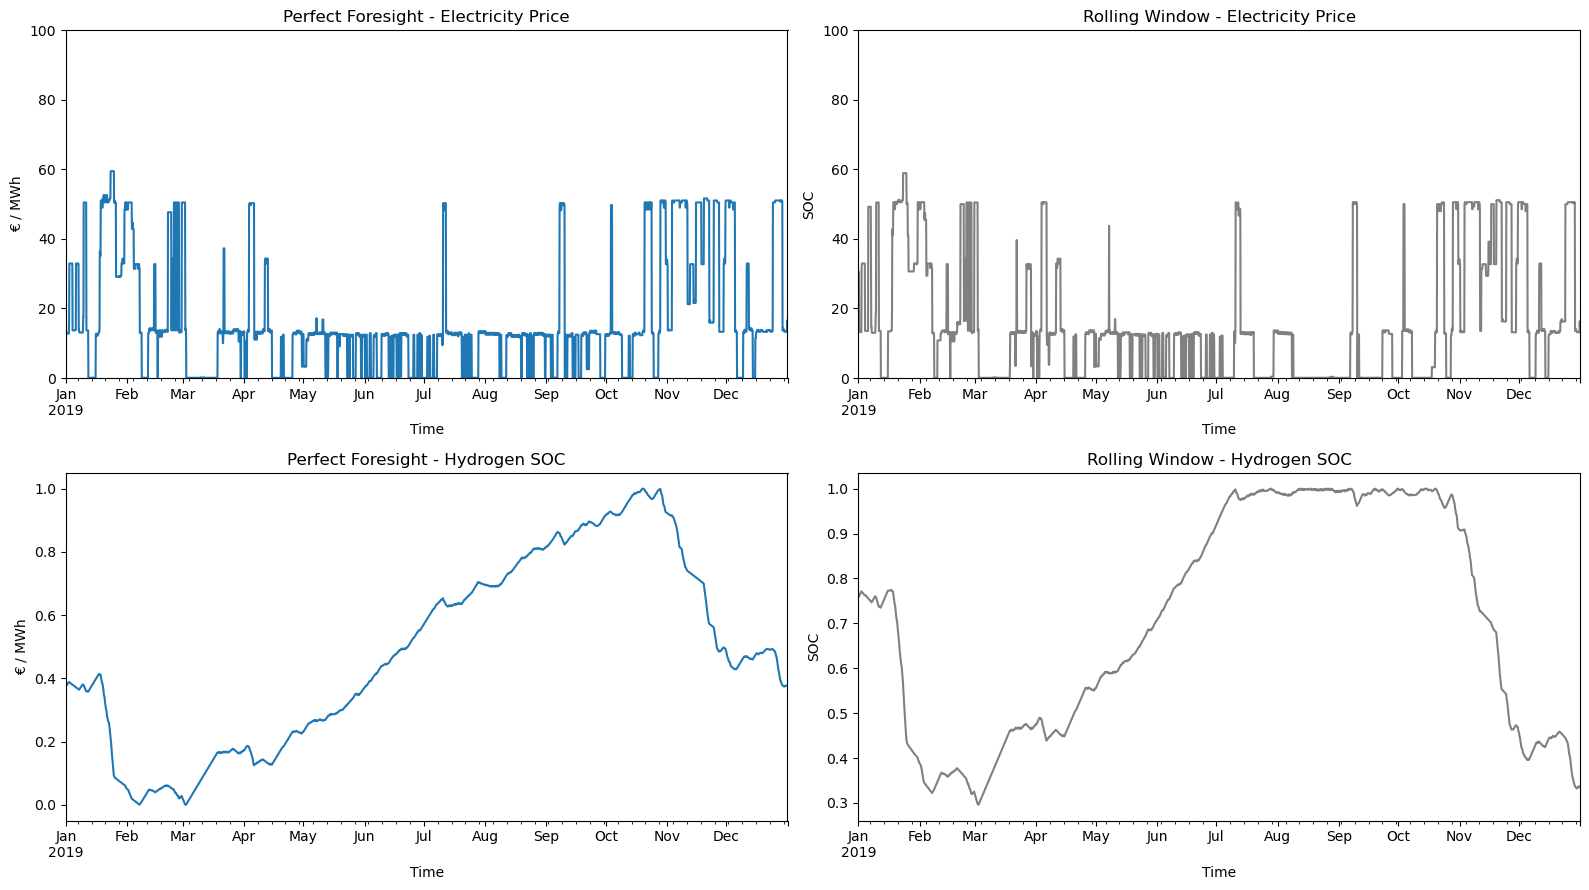

In [95]:
fig, ax = plt.subplots(2,2, figsize=(16,9))

n_perfect_forecast.buses_t.marginal_price['DE0 0'].plot(
    ax = ax[0][0],
    ylim=(0, 100),
    title = 'Perfect Foresight - Electricity Price'
)

n.buses_t.marginal_price['DE0 0'].plot(
    ax = ax[0][1],
    ylim = (0, 100),
    title = 'Rolling Window - Electricity Price',
    color = 'grey'
)

get_hydrogen_soc(n_perfect_forecast).plot(
    ax = ax[1][0],
    title = 'Perfect Foresight - Hydrogen SOC'
)
get_hydrogen_soc(n).plot(
    ax = ax[1][1],
    title = 'Rolling Window - Hydrogen SOC',
    color = 'grey'

)

ax[0][0].set_xlabel("Time")
ax[1][0].set_xlabel("Time")
ax[0][1].set_xlabel("Time")
ax[1][1].set_xlabel("Time")

ax[0][0].set_ylabel("€ / MWh")
ax[1][0].set_ylabel("€ / MWh")
ax[0][1].set_ylabel("SOC")
ax[1][1].set_ylabel("SOC")

plt.tight_layout()


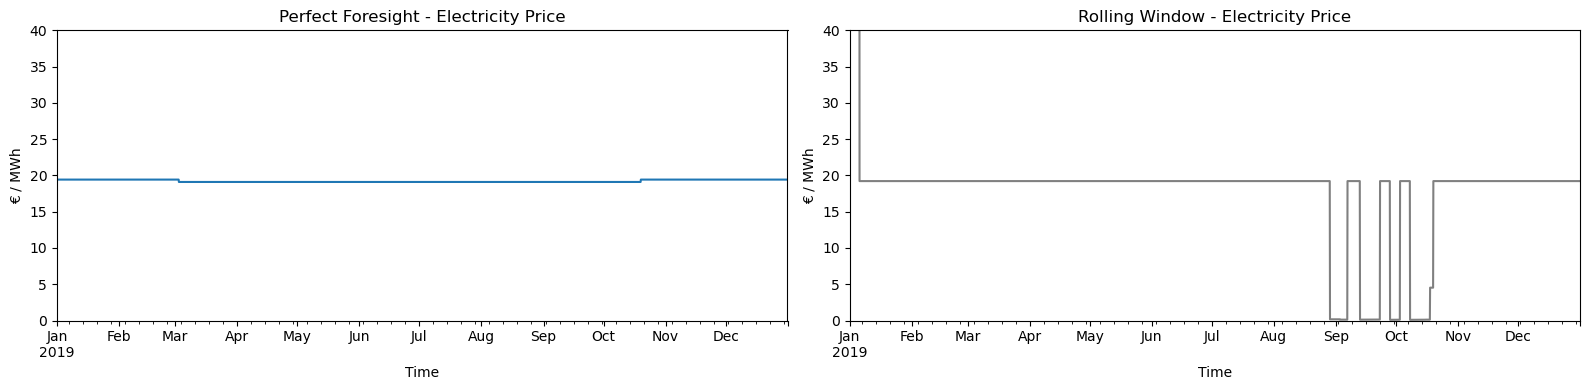

In [66]:
fig, ax = plt.subplots(1,2, figsize=(16,4))

n_perfect_forecast.buses_t.marginal_price['DE0 0 H2'].plot(
    ax = ax[0],
    ylim=(0, 40),
    title = 'Perfect Foresight - Electricity Price'
)

n.buses_t.marginal_price['DE0 0 H2'].plot(
    ax = ax[1],
    ylim = (0, 40),
    title = 'Rolling Window - Electricity Price',
    color = 'grey'
)

ax[0].set_xlabel('Time')
ax[1].set_xlabel('Time')
ax[0].set_ylabel('€ / MWh')
ax[1].set_ylabel('€ / MWh')

plt.tight_layout()

Problematisch:

- Hydrogen muss am anfang und am Ende nicht gleich sein.
- Preise nahe null im september kommen vom hydrogen:
    - marginal price von hydrogen da ist 0 --> anreiz hydrogen los zu werden.

Lösungansätze:
- einen zusätzlichen hydrogen verbrauch einfügen der den speicher im Sommer künstlich entleert um den Anfangszustand zu kompensieren
- also den Strompreis nicht beeinflusst sondern einfach vom Hydrogen Bus Hydrogen entnimmt

# Erzeugung:

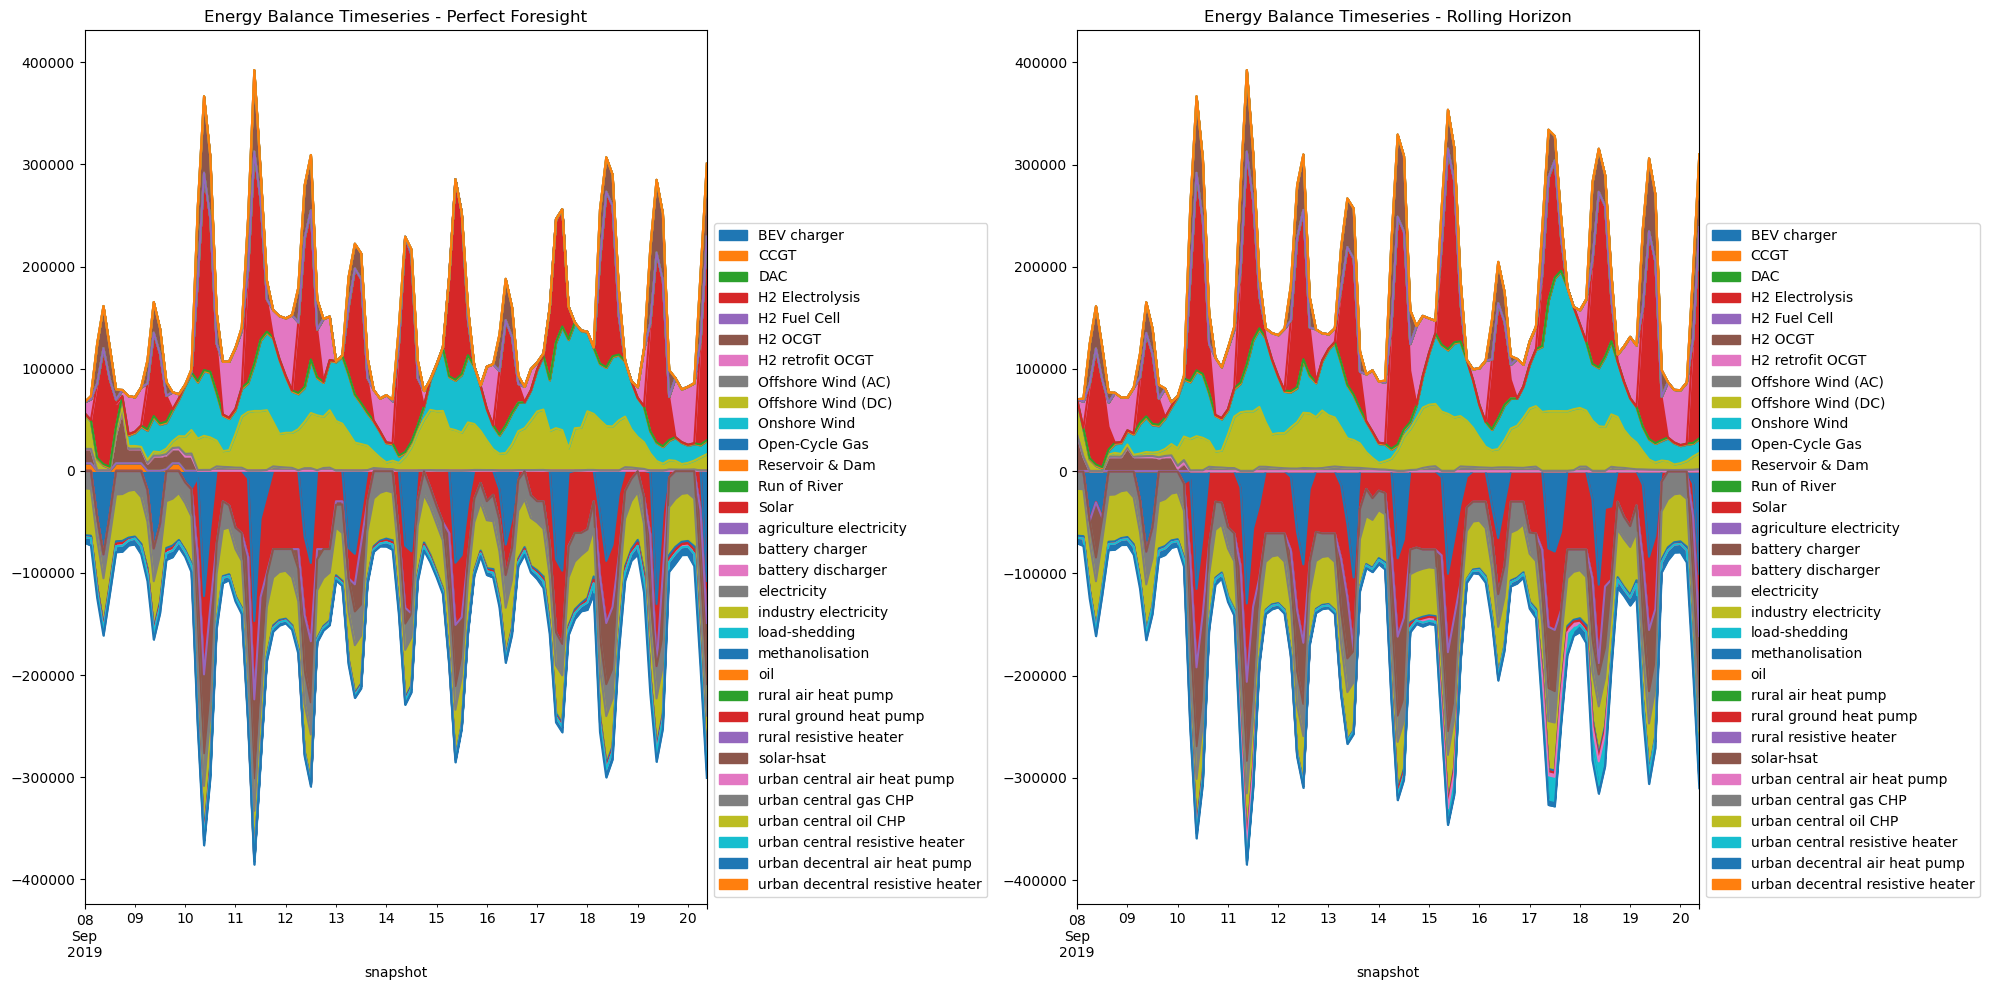

In [52]:
fig, ax = plt.subplots(1,2,figsize=(20,10))

n.statistics.energy_balance(aggregate_time=False).loc[:, :, "AC"].droplevel(0).iloc[
    :, 2000:2100
].groupby("carrier").sum().where(lambda x: np.abs(x) > 1).fillna(0).drop("Pumped Hydro Storage", axis=0, errors="ignore").T.plot.area(
    ax = ax[0],
    title="Energy Balance Timeseries - Perfect Foresight"
)
ax[0].legend(bbox_to_anchor=(1, 0), loc="lower left", title=None, ncol=1)
plt.tight_layout()

n_perfect_forecast.statistics.energy_balance(aggregate_time=False).loc[:, :, "AC"].droplevel(0).iloc[
    :, 2000:2100
].groupby("carrier").sum().where(lambda x: np.abs(x) > 1).fillna(0).drop("Pumped Hydro Storage", axis=0, errors="ignore").T.plot.area(
    ax = ax[1],
    title="Energy Balance Timeseries - Rolling Horizon"
)
ax[1].legend(bbox_to_anchor=(1, 0), loc="lower left", title=None, ncol=1)
plt.tight_layout()

- Energy Balance sieht auch ähnlich aus
- mehr pink im august kommt wie gesagt von dem hydrogen storage. 
- mehr Wärme liegt an der geringeren Planungsfähigkeit, beeinflusst den Strompreis allerdings nicht also who cares

# Wind Noise:

In [68]:
# Wrapper Funktion um cf übergeben zu können
def change_wind_noise():
    # eigentliche funktion zum ändern der Constraints
    def change_wind(n, sns):
        rhs = n.model.constraints["Generator-fix-p-upper"].rhs
        years = [2045, 2040, 2035, 2030, 2025, 2020]

        for year in years:
            selector = {"Generator-fix": f"DE0 0 onwind-{year}"}
            scaling_factor = np.std(rhs.sel(selector).data)
            p_nom = n.generators.p_nom[f"DE0 0 onwind-{year}"]
            wind_power = rhs.sel(selector) + wind_noise(len(sns), scaling_factor)
            wind_power = wind_power.where(wind_power >= 0, 0)
            wind_power = wind_power.where(wind_power <= p_nom, p_nom)
            rhs.loc[selector] = wind_power

    return change_wind

def wind_noise(hours, scaling_factor):

    # 2. MSE-Werte für LSTM-Modell aus Tabelle bis 168h --> aus der Tabelle des Papers (0 von mir)
    horizons = np.array([0, 24, 48, 72, 96, 168, 336])
    mse_values = np.array([0, 0.499, 0.794, 0.899, 0.943, 1.011, 1.064])
    rmse_std = np.sqrt(mse_values)  # RMSE in Standardform

    # 3. Skaliere RMSE auf echte MW-Einheit
    rmse_MW = rmse_std * scaling_factor

    # 4. Interpolation der RMSE auf 144h
    interp_rmse = interp1d(horizons, rmse_MW, kind='linear', fill_value='extrapolate')
    rmse_per_hour = interp_rmse(np.arange(0, hours*3, 3))  # Stunden 1–144


    # 5. Rauschen generieren und synthetische Prognose erzeugen
    noise = np.random.normal(loc=0, scale=1.2*rmse_per_hour)
    #noise = np.clip(noise, 0, None)  # alles < 0 → 0, Rest bleibt
    return noise


- gleiches Netzwerk erstellen wie oben, aber was mit Windnoise optimiert wird

In [71]:
n_wind_noise = pypsa.Network('base_s_1__none_2045_lt.nc')

# alle hydrogen related stores
stores = n_wind_noise.stores[n_wind_noise.stores.carrier.str.contains("H2", case=False, na=False)].index


# marginal price für alle der mean
for i in stores:
    n_wind_noise.stores.loc[i, 'marginal_cost'] = n_perfect_forecast.buses_t.marginal_price['DE0 0 H2'].mean()

# gleiches für den einen methanol store 
n_wind_noise.stores.loc['DE methanol Store', 'marginal_cost'] = n_perfect_forecast.buses_t.marginal_price["DE methanol"].mean()

# bei allen stores wird cyclic auf false gesetzt
for i in n_wind_noise.stores.index:
    n_wind_noise.stores.loc[i, 'e_cyclic'] = False

# initial storage aus perfect foresight
n_wind_noise.stores.loc['DE0 0 H2 Store-2045', 'e_initial'] = 5 * 10e6
n_wind_noise.stores.loc['DE0 0 H2 Store-2040', 'e_initial'] = 5 * 10e5


# optimierung mit horizon = 48 (144h) und overlap = 8
n_wind_noise.optimize.fix_optimal_capacities()
n_wind_noise.optimize.create_model()

n_wind_noise.optimize.optimize_with_rolling_horizon(
    horizon = 48,
    overlap = 8,
    solver_name = 'gurobi',
    extra_functionality=change_wind_noise()

)

INFO:pypsa.io:Imported network base_s_1__none_2045_lt.nc has buses, carriers, generators, global_constraints, links, loads, storage_units, stores
{'DE', 'EU'}
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-01-01 00:00:00:2019-01-06 21:00:00] (1/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 246.93it/s]
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-76qnqxoi.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-76qnqxoi.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0xa57b6d1c


INFO:gurobipy:Model fingerprint: 0xa57b6d1c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [8e+01, 1e+02]


INFO:gurobipy:  Bounds range     [8e+01, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22643 rows and 4474 columns


INFO:gurobipy:Presolve removed 22643 rows and 4474 columns


Presolve time: 0.08s


INFO:gurobipy:Presolve time: 0.08s


Presolved: 1070 rows, 7238 columns, 14465 nonzeros


INFO:gurobipy:Presolved: 1070 rows, 7238 columns, 14465 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.784e+03


INFO:gurobipy: AA' NZ     : 2.784e+03


 Factor NZ  : 1.976e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 1.976e+04 (roughly 3 MB of memory)


 Factor Ops : 4.875e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.875e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


Barrier performed 0 iterations in 0.17 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.17 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1457    2.4857822e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1457    2.4857822e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1457 iterations and 0.25 seconds (0.05 work units)


INFO:gurobipy:Solved in 1457 iterations and 0.25 seconds (0.05 work units)


Optimal objective  2.485782228e+08


INFO:gurobipy:Optimal objective  2.485782228e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 2.49e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-01-06 00:00:00:2019-01-11 21:00:00] (2/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 236.17it/s]
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-to9lvz0h.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-to9lvz0h.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0xd199556b


INFO:gurobipy:Model fingerprint: 0xd199556b


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [9e+01, 1e+02]


INFO:gurobipy:  Bounds range     [9e+01, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22643 rows and 4477 columns


INFO:gurobipy:Presolve removed 22643 rows and 4477 columns


Presolve time: 0.19s


INFO:gurobipy:Presolve time: 0.19s


Presolved: 1070 rows, 7235 columns, 14465 nonzeros


INFO:gurobipy:Presolved: 1070 rows, 7235 columns, 14465 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.784e+03


INFO:gurobipy: AA' NZ     : 2.784e+03


 Factor NZ  : 2.005e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.005e+04 (roughly 3 MB of memory)


 Factor Ops : 5.067e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.067e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


Barrier performed 0 iterations in 0.25 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.25 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1618    2.7735955e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1618    2.7735955e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1618 iterations and 0.29 seconds (0.05 work units)


INFO:gurobipy:Solved in 1618 iterations and 0.29 seconds (0.05 work units)


Optimal objective  2.773595515e+08


INFO:gurobipy:Optimal objective  2.773595515e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 2.77e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-01-11 00:00:00:2019-01-16 21:00:00] (3/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 238.27it/s]
INFO:linopy.io: Writing time: 0.27s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-08ieuw1v.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-08ieuw1v.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0xd1e3768d


INFO:gurobipy:Model fingerprint: 0xd1e3768d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22643 rows and 4441 columns


INFO:gurobipy:Presolve removed 22643 rows and 4441 columns


Presolve time: 0.15s


INFO:gurobipy:Presolve time: 0.15s


Presolved: 1070 rows, 7271 columns, 14505 nonzeros


INFO:gurobipy:Presolved: 1070 rows, 7271 columns, 14505 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.784e+03


INFO:gurobipy: AA' NZ     : 2.784e+03


 Factor NZ  : 1.976e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 1.976e+04 (roughly 4 MB of memory)


 Factor Ops : 4.877e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.877e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


Barrier performed 0 iterations in 0.22 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.22 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1441    1.6791655e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1441    1.6791655e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1441 iterations and 0.33 seconds (0.04 work units)


INFO:gurobipy:Solved in 1441 iterations and 0.33 seconds (0.04 work units)


Optimal objective  1.679165453e+08


INFO:gurobipy:Optimal objective  1.679165453e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.68e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-01-16 00:00:00:2019-01-21 21:00:00] (4/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 228.19it/s]
INFO:linopy.io: Writing time: 0.27s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-1rnqkt76.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-1rnqkt76.lp


Reading time = 0.09 seconds


INFO:gurobipy:Reading time = 0.09 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x48aa4008


INFO:gurobipy:Model fingerprint: 0x48aa4008


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22643 rows and 4597 columns


INFO:gurobipy:Presolve removed 22643 rows and 4597 columns


Presolve time: 0.19s


INFO:gurobipy:Presolve time: 0.19s


Presolved: 1070 rows, 7115 columns, 14262 nonzeros


INFO:gurobipy:Presolved: 1070 rows, 7115 columns, 14262 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.784e+03


INFO:gurobipy: AA' NZ     : 2.784e+03


 Factor NZ  : 2.014e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.014e+04 (roughly 3 MB of memory)


 Factor Ops : 5.031e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.031e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.57149741e+12 -1.45589155e+13  1.27e+07 1.94e+02  2.84e+10     0s


INFO:gurobipy:   0   1.57149741e+12 -1.45589155e+13  1.27e+07 1.94e+02  2.84e+10     0s


   1   1.72646704e+11 -3.57341735e+12  1.12e+06 5.09e-11  2.63e+09     0s


INFO:gurobipy:   1   1.72646704e+11 -3.57341735e+12  1.12e+06 5.09e-11  2.63e+09     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.42 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.42 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1624    5.0855668e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1624    5.0855668e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1624 iterations and 0.47 seconds (0.05 work units)


INFO:gurobipy:Solved in 1624 iterations and 0.47 seconds (0.05 work units)


Optimal objective  5.085566808e+08


INFO:gurobipy:Optimal objective  5.085566808e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 5.09e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-01-21 00:00:00:2019-01-26 21:00:00] (5/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 225.26it/s]
INFO:linopy.io: Writing time: 0.28s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-r7mbuz03.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-r7mbuz03.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0xc8be2d45


INFO:gurobipy:Model fingerprint: 0xc8be2d45


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22644 rows and 4654 columns


INFO:gurobipy:Presolve removed 22644 rows and 4654 columns


Presolve time: 0.11s


INFO:gurobipy:Presolve time: 0.11s


Presolved: 1069 rows, 7058 columns, 14136 nonzeros


INFO:gurobipy:Presolved: 1069 rows, 7058 columns, 14136 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.783e+03


INFO:gurobipy: AA' NZ     : 2.783e+03


 Factor NZ  : 1.922e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 1.922e+04 (roughly 3 MB of memory)


 Factor Ops : 4.469e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.469e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.61109342e+12 -1.45717064e+13  1.31e+07 1.87e+02  2.93e+10     0s


INFO:gurobipy:   0   1.61109342e+12 -1.45717064e+13  1.31e+07 1.87e+02  2.93e+10     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.18 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.18 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1450    8.8691269e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1450    8.8691269e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1450 iterations and 0.21 seconds (0.05 work units)


INFO:gurobipy:Solved in 1450 iterations and 0.21 seconds (0.05 work units)


Optimal objective  8.869126917e+08


INFO:gurobipy:Optimal objective  8.869126917e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 8.87e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-01-26 00:00:00:2019-01-31 21:00:00] (6/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 241.98it/s]
INFO:linopy.io: Writing time: 0.29s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-sn59m040.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-sn59m040.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x0e11bc9c


INFO:gurobipy:Model fingerprint: 0x0e11bc9c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22643 rows and 4450 columns


INFO:gurobipy:Presolve removed 22643 rows and 4450 columns


Presolve time: 0.13s


INFO:gurobipy:Presolve time: 0.13s


Presolved: 1070 rows, 7262 columns, 14477 nonzeros


INFO:gurobipy:Presolved: 1070 rows, 7262 columns, 14477 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.784e+03


INFO:gurobipy: AA' NZ     : 2.784e+03


 Factor NZ  : 1.982e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 1.982e+04 (roughly 4 MB of memory)


 Factor Ops : 4.953e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.953e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.28556173e+12 -1.44744192e+13  1.03e+07 1.83e+02  2.31e+10     0s


INFO:gurobipy:   0   1.28556173e+12 -1.44744192e+13  1.03e+07 1.83e+02  2.31e+10     0s


   1   1.41695044e+11 -2.86718669e+12  8.93e+05 4.65e-11  2.10e+09     0s


INFO:gurobipy:   1   1.41695044e+11 -2.86718669e+12  8.93e+05 4.65e-11  2.10e+09     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.24 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.24 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Extra simplex iterations after uncrush: 1


INFO:gurobipy:Extra simplex iterations after uncrush: 1


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1557    3.6645111e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1557    3.6645111e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1557 iterations and 0.28 seconds (0.05 work units)


INFO:gurobipy:Solved in 1557 iterations and 0.28 seconds (0.05 work units)


Optimal objective  3.664511120e+08


INFO:gurobipy:Optimal objective  3.664511120e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 3.66e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-01-31 00:00:00:2019-02-05 21:00:00] (7/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 240.31it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-fjkzs35j.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-fjkzs35j.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x0b78a26e


INFO:gurobipy:Model fingerprint: 0x0b78a26e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22643 rows and 4442 columns


INFO:gurobipy:Presolve removed 22643 rows and 4442 columns


Presolve time: 0.06s


INFO:gurobipy:Presolve time: 0.06s


Presolved: 1070 rows, 7270 columns, 14491 nonzeros


INFO:gurobipy:Presolved: 1070 rows, 7270 columns, 14491 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.784e+03


INFO:gurobipy: AA' NZ     : 2.784e+03


 Factor NZ  : 1.980e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 1.980e+04 (roughly 4 MB of memory)


 Factor Ops : 4.889e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.889e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.32373511e+12 -1.44723303e+13  1.06e+07 1.82e+02  2.38e+10     0s


INFO:gurobipy:   0   1.32373511e+12 -1.44723303e+13  1.06e+07 1.82e+02  2.38e+10     0s


   1   1.48425357e+11 -3.27740372e+12  9.32e+05 4.91e-11  2.21e+09     0s


INFO:gurobipy:   1   1.48425357e+11 -3.27740372e+12  9.32e+05 4.91e-11  2.21e+09     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.10 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.10 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1466    5.2757034e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1466    5.2757034e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1466 iterations and 0.12 seconds (0.05 work units)


INFO:gurobipy:Solved in 1466 iterations and 0.12 seconds (0.05 work units)


Optimal objective  5.275703365e+08


INFO:gurobipy:Optimal objective  5.275703365e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 5.28e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-02-05 00:00:00:2019-02-10 21:00:00] (8/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 245.28it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-pt2q_xj9.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-pt2q_xj9.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x25395b67


INFO:gurobipy:Model fingerprint: 0x25395b67


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22643 rows and 4407 columns


INFO:gurobipy:Presolve removed 22643 rows and 4407 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1070 rows, 7305 columns, 14539 nonzeros


INFO:gurobipy:Presolved: 1070 rows, 7305 columns, 14539 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.784e+03


INFO:gurobipy: AA' NZ     : 2.784e+03


 Factor NZ  : 1.976e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 1.976e+04 (roughly 4 MB of memory)


 Factor Ops : 4.875e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.875e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.24664009e+12 -1.44144984e+13  9.94e+06 1.84e+02  2.24e+10     0s


INFO:gurobipy:   0   1.24664009e+12 -1.44144984e+13  9.94e+06 1.84e+02  2.24e+10     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.08 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.08 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1414    2.2457991e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1414    2.2457991e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1414 iterations and 0.10 seconds (0.04 work units)


INFO:gurobipy:Solved in 1414 iterations and 0.10 seconds (0.04 work units)


Optimal objective  2.245799131e+08


INFO:gurobipy:Optimal objective  2.245799131e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 2.25e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-02-10 00:00:00:2019-02-15 21:00:00] (9/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 246.46it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-pwt5bl0i.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-pwt5bl0i.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x951e58cb


INFO:gurobipy:Model fingerprint: 0x951e58cb


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22643 rows and 4447 columns


INFO:gurobipy:Presolve removed 22643 rows and 4447 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1070 rows, 7265 columns, 14495 nonzeros


INFO:gurobipy:Presolved: 1070 rows, 7265 columns, 14495 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.784e+03


INFO:gurobipy: AA' NZ     : 2.784e+03


 Factor NZ  : 2.005e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.005e+04 (roughly 4 MB of memory)


 Factor Ops : 5.067e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.067e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.72431563e+12 -1.43298024e+13  1.38e+07 1.84e+02  3.06e+10     0s


INFO:gurobipy:   0   1.72431563e+12 -1.43298024e+13  1.38e+07 1.84e+02  3.06e+10     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.08 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.08 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1486    1.7347547e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1486    1.7347547e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1486 iterations and 0.13 seconds (0.05 work units)


INFO:gurobipy:Solved in 1486 iterations and 0.13 seconds (0.05 work units)


Optimal objective  1.734754681e+08


INFO:gurobipy:Optimal objective  1.734754681e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.73e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-02-15 00:00:00:2019-02-20 21:00:00] (10/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 244.46it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-srqzp13w.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-srqzp13w.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x6b255303


INFO:gurobipy:Model fingerprint: 0x6b255303


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22643 rows and 4403 columns


INFO:gurobipy:Presolve removed 22643 rows and 4403 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1070 rows, 7309 columns, 14539 nonzeros


INFO:gurobipy:Presolved: 1070 rows, 7309 columns, 14539 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.784e+03


INFO:gurobipy: AA' NZ     : 2.784e+03


 Factor NZ  : 1.976e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 1.976e+04 (roughly 4 MB of memory)


 Factor Ops : 4.877e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.877e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.28870217e+12 -1.62282415e+13  3.44e+07 1.80e+02  7.51e+10     0s


INFO:gurobipy:   0   4.28870217e+12 -1.62282415e+13  3.44e+07 1.80e+02  7.51e+10     0s


   1   1.01619158e+12 -5.55458601e+12  7.57e+06 5.28e-11  1.66e+10     0s


INFO:gurobipy:   1   1.01619158e+12 -5.55458601e+12  7.57e+06 5.28e-11  1.66e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1373    1.8225983e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1373    1.8225983e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1373 iterations and 0.09 seconds (0.04 work units)


INFO:gurobipy:Solved in 1373 iterations and 0.09 seconds (0.04 work units)


Optimal objective  1.822598344e+08


INFO:gurobipy:Optimal objective  1.822598344e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.82e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-02-20 00:00:00:2019-02-25 21:00:00] (11/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 254.40it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-r700lrlc.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-r700lrlc.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x72ec4b37


INFO:gurobipy:Model fingerprint: 0x72ec4b37


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22643 rows and 4416 columns


INFO:gurobipy:Presolve removed 22643 rows and 4416 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1070 rows, 7296 columns, 14526 nonzeros


INFO:gurobipy:Presolved: 1070 rows, 7296 columns, 14526 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.784e+03


INFO:gurobipy: AA' NZ     : 2.784e+03


 Factor NZ  : 2.014e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.014e+04 (roughly 4 MB of memory)


 Factor Ops : 5.031e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.031e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.01927545e+12 -1.78716771e+13  3.23e+07 1.82e+02  7.06e+10     0s


INFO:gurobipy:   0   4.01927545e+12 -1.78716771e+13  3.23e+07 1.82e+02  7.06e+10     0s


   1   6.75131368e+11 -5.20834376e+12  4.84e+06 7.57e+02  1.07e+10     0s


INFO:gurobipy:   1   6.75131368e+11 -5.20834376e+12  4.84e+06 7.57e+02  1.07e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1402    2.9642682e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1402    2.9642682e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1402 iterations and 0.09 seconds (0.05 work units)


INFO:gurobipy:Solved in 1402 iterations and 0.09 seconds (0.05 work units)


Optimal objective  2.964268238e+08


INFO:gurobipy:Optimal objective  2.964268238e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 2.96e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-02-25 00:00:00:2019-03-02 21:00:00] (12/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 245.96it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-ggblvfh2.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-ggblvfh2.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0xf20fd86e


INFO:gurobipy:Model fingerprint: 0xf20fd86e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 3e+02]


INFO:gurobipy:  Bounds range     [2e+02, 3e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22644 rows and 4440 columns


INFO:gurobipy:Presolve removed 22644 rows and 4440 columns


Presolve time: 0.06s


INFO:gurobipy:Presolve time: 0.06s


Presolved: 1069 rows, 7272 columns, 14505 nonzeros


INFO:gurobipy:Presolved: 1069 rows, 7272 columns, 14505 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.783e+03


INFO:gurobipy: AA' NZ     : 2.783e+03


 Factor NZ  : 1.922e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 1.922e+04 (roughly 4 MB of memory)


 Factor Ops : 4.469e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.469e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.27157302e+12 -1.76974030e+13  3.43e+07 1.81e+02  7.49e+10     0s


INFO:gurobipy:   0   4.27157302e+12 -1.76974030e+13  3.43e+07 1.81e+02  7.49e+10     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.10 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.10 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1427    2.9354661e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1427    2.9354661e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1427 iterations and 0.14 seconds (0.04 work units)


INFO:gurobipy:Solved in 1427 iterations and 0.14 seconds (0.04 work units)


Optimal objective  2.935466114e+08


INFO:gurobipy:Optimal objective  2.935466114e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 2.94e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-03-02 00:00:00:2019-03-07 21:00:00] (13/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 249.10it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-e9m918lb.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-e9m918lb.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0xb8f029f1


INFO:gurobipy:Model fingerprint: 0xb8f029f1


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [3e+02, 4e+02]


INFO:gurobipy:  Bounds range     [3e+02, 4e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22643 rows and 4390 columns


INFO:gurobipy:Presolve removed 22643 rows and 4390 columns


Presolve time: 0.06s


INFO:gurobipy:Presolve time: 0.06s


Presolved: 1070 rows, 7322 columns, 14556 nonzeros


INFO:gurobipy:Presolved: 1070 rows, 7322 columns, 14556 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.784e+03


INFO:gurobipy: AA' NZ     : 2.784e+03


 Factor NZ  : 1.982e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 1.982e+04 (roughly 4 MB of memory)


 Factor Ops : 4.953e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.953e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.27218556e+12 -1.76562709e+13  3.43e+07 1.78e+02  7.49e+10     0s


INFO:gurobipy:   0   4.27218556e+12 -1.76562709e+13  3.43e+07 1.78e+02  7.49e+10     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.08 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.08 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1346    1.4988684e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1346    1.4988684e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1346 iterations and 0.11 seconds (0.04 work units)


INFO:gurobipy:Solved in 1346 iterations and 0.11 seconds (0.04 work units)


Optimal objective  1.498868401e+08


INFO:gurobipy:Optimal objective  1.498868401e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.50e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-03-07 00:00:00:2019-03-12 21:00:00] (14/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 234.43it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-5kawwlks.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-5kawwlks.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0xd66e23f5


INFO:gurobipy:Model fingerprint: 0xd66e23f5


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [4e+02, 4e+02]


INFO:gurobipy:  Bounds range     [4e+02, 4e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22643 rows and 4382 columns


INFO:gurobipy:Presolve removed 22643 rows and 4382 columns


Presolve time: 0.06s


INFO:gurobipy:Presolve time: 0.06s


Presolved: 1070 rows, 7330 columns, 14560 nonzeros


INFO:gurobipy:Presolved: 1070 rows, 7330 columns, 14560 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.784e+03


INFO:gurobipy: AA' NZ     : 2.784e+03


 Factor NZ  : 1.980e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 1.980e+04 (roughly 4 MB of memory)


 Factor Ops : 4.889e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.889e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.27096378e+12 -1.77131386e+13  3.43e+07 1.79e+02  7.49e+10     0s


INFO:gurobipy:   0   4.27096378e+12 -1.77131386e+13  3.43e+07 1.79e+02  7.49e+10     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.08 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.08 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1383    1.2314384e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1383    1.2314384e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1383 iterations and 0.11 seconds (0.04 work units)


INFO:gurobipy:Solved in 1383 iterations and 0.11 seconds (0.04 work units)


Optimal objective  1.231438445e+08


INFO:gurobipy:Optimal objective  1.231438445e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.23e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-03-12 00:00:00:2019-03-17 21:00:00] (15/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 246.79it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-kcise4zy.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-kcise4zy.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0xc7181949


INFO:gurobipy:Model fingerprint: 0xc7181949


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [4e+02, 6e+02]


INFO:gurobipy:  Bounds range     [4e+02, 6e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22643 rows and 4383 columns


INFO:gurobipy:Presolve removed 22643 rows and 4383 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1070 rows, 7329 columns, 14559 nonzeros


INFO:gurobipy:Presolved: 1070 rows, 7329 columns, 14559 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.784e+03


INFO:gurobipy: AA' NZ     : 2.784e+03


 Factor NZ  : 1.976e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 1.976e+04 (roughly 4 MB of memory)


 Factor Ops : 4.875e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.875e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.27156304e+12 -1.77741246e+13  3.43e+07 1.79e+02  7.49e+10     0s


INFO:gurobipy:   0   4.27156304e+12 -1.77741246e+13  3.43e+07 1.79e+02  7.49e+10     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.08 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.08 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1424    1.2342733e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1424    1.2342733e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1424 iterations and 0.11 seconds (0.04 work units)


INFO:gurobipy:Solved in 1424 iterations and 0.11 seconds (0.04 work units)


Optimal objective  1.234273346e+08


INFO:gurobipy:Optimal objective  1.234273346e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.23e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-03-17 00:00:00:2019-03-22 21:00:00] (16/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 250.82it/s]
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-rkeaclhz.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-rkeaclhz.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x7abeff6f


INFO:gurobipy:Model fingerprint: 0x7abeff6f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [6e+02, 7e+02]


INFO:gurobipy:  Bounds range     [6e+02, 7e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22643 rows and 4463 columns


INFO:gurobipy:Presolve removed 22643 rows and 4463 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1070 rows, 7249 columns, 14479 nonzeros


INFO:gurobipy:Presolved: 1070 rows, 7249 columns, 14479 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.784e+03


INFO:gurobipy: AA' NZ     : 2.784e+03


 Factor NZ  : 2.005e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.005e+04 (roughly 4 MB of memory)


 Factor Ops : 5.067e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.067e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.27218064e+12 -1.76897849e+13  3.43e+07 1.87e+02  7.49e+10     0s


INFO:gurobipy:   0   4.27218064e+12 -1.76897849e+13  3.43e+07 1.87e+02  7.49e+10     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.06 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.06 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1312    1.6711684e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1312    1.6711684e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1312 iterations and 0.09 seconds (0.04 work units)


INFO:gurobipy:Solved in 1312 iterations and 0.09 seconds (0.04 work units)


Optimal objective  1.671168365e+08


INFO:gurobipy:Optimal objective  1.671168365e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.67e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-03-22 00:00:00:2019-03-27 21:00:00] (17/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 235.93it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-fepkszzj.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-fepkszzj.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x87ee8d07


INFO:gurobipy:Model fingerprint: 0x87ee8d07


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [5e+02, 7e+02]


INFO:gurobipy:  Bounds range     [5e+02, 7e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22643 rows and 4421 columns


INFO:gurobipy:Presolve removed 22643 rows and 4421 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1070 rows, 7291 columns, 14525 nonzeros


INFO:gurobipy:Presolved: 1070 rows, 7291 columns, 14525 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.784e+03


INFO:gurobipy: AA' NZ     : 2.784e+03


 Factor NZ  : 1.976e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 1.976e+04 (roughly 4 MB of memory)


 Factor Ops : 4.877e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.877e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.27100547e+12 -1.75971698e+13  3.43e+07 1.80e+02  7.49e+10     0s


INFO:gurobipy:   0   4.27100547e+12 -1.75971698e+13  3.43e+07 1.80e+02  7.49e+10     0s


   1   4.60044486e+11 -5.23860320e+12  3.01e+06 3.74e+02  6.80e+09     0s


INFO:gurobipy:   1   4.60044486e+11 -5.23860320e+12  3.01e+06 3.74e+02  6.80e+09     0s


   2   5.39482265e+10 -1.40619730e+12  3.04e+05 5.85e-10  7.38e+08     0s


INFO:gurobipy:   2   5.39482265e+10 -1.40619730e+12  3.04e+05 5.85e-10  7.38e+08     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.08 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.08 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1553    1.9642047e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1553    1.9642047e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1553 iterations and 0.14 seconds (0.05 work units)


INFO:gurobipy:Solved in 1553 iterations and 0.14 seconds (0.05 work units)


Optimal objective  1.964204728e+08


INFO:gurobipy:Optimal objective  1.964204728e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.96e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-03-27 00:00:00:2019-04-01 21:00:00] (18/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 244.39it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-4eefbcxb.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-4eefbcxb.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0xc234cc49


INFO:gurobipy:Model fingerprint: 0xc234cc49


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [5e+02, 5e+02]


INFO:gurobipy:  Bounds range     [5e+02, 5e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22641 rows and 4408 columns


INFO:gurobipy:Presolve removed 22641 rows and 4408 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1072 rows, 7304 columns, 14536 nonzeros


INFO:gurobipy:Presolved: 1072 rows, 7304 columns, 14536 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.786e+03


INFO:gurobipy: AA' NZ     : 2.786e+03


 Factor NZ  : 2.006e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.006e+04 (roughly 4 MB of memory)


 Factor Ops : 5.101e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.101e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.27165283e+12 -1.77641835e+13  3.43e+07 1.83e+02  7.49e+10     0s


INFO:gurobipy:   0   4.27165283e+12 -1.77641835e+13  3.43e+07 1.83e+02  7.49e+10     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1256    2.1219127e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1256    2.1219127e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1256 iterations and 0.14 seconds (0.04 work units)


INFO:gurobipy:Solved in 1256 iterations and 0.14 seconds (0.04 work units)


Optimal objective  2.121912718e+08


INFO:gurobipy:Optimal objective  2.121912718e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 2.12e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-04-01 00:00:00:2019-04-06 21:00:00] (19/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 236.52it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-l0h3u67k.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-l0h3u67k.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x020b0363


INFO:gurobipy:Model fingerprint: 0x020b0363


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [4e+02, 5e+02]


INFO:gurobipy:  Bounds range     [4e+02, 5e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22640 rows and 4418 columns


INFO:gurobipy:Presolve removed 22640 rows and 4418 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1073 rows, 7294 columns, 14531 nonzeros


INFO:gurobipy:Presolved: 1073 rows, 7294 columns, 14531 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.787e+03


INFO:gurobipy: AA' NZ     : 2.787e+03


 Factor NZ  : 2.003e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.003e+04 (roughly 4 MB of memory)


 Factor Ops : 4.966e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.966e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.00781605e+12 -1.80654154e+13  3.22e+07 1.78e+02  7.03e+10     0s


INFO:gurobipy:   0   4.00781605e+12 -1.80654154e+13  3.22e+07 1.78e+02  7.03e+10     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.25 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.25 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1349    2.7431020e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1349    2.7431020e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1349 iterations and 0.28 seconds (0.04 work units)


INFO:gurobipy:Solved in 1349 iterations and 0.28 seconds (0.04 work units)


Optimal objective  2.743102032e+08


INFO:gurobipy:Optimal objective  2.743102032e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 2.74e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-04-06 00:00:00:2019-04-11 21:00:00] (20/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 230.07it/s]
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-u311bqnc.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-u311bqnc.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0xa913f2ad


INFO:gurobipy:Model fingerprint: 0xa913f2ad


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [5e+02, 5e+02]


INFO:gurobipy:  Bounds range     [5e+02, 5e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22638 rows and 4360 columns


INFO:gurobipy:Presolve removed 22638 rows and 4360 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1075 rows, 7352 columns, 14591 nonzeros


INFO:gurobipy:Presolved: 1075 rows, 7352 columns, 14591 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.789e+03


INFO:gurobipy: AA' NZ     : 2.789e+03


 Factor NZ  : 1.970e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 1.970e+04 (roughly 4 MB of memory)


 Factor Ops : 4.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.27180741e+12 -1.78938314e+13  3.43e+07 1.83e+02  7.48e+10     0s


INFO:gurobipy:   0   4.27180741e+12 -1.78938314e+13  3.43e+07 1.83e+02  7.48e+10     0s


   1   5.54553731e+11 -5.30573306e+12  3.80e+06 4.13e+02  8.50e+09     0s


INFO:gurobipy:   1   5.54553731e+11 -5.30573306e+12  3.80e+06 4.13e+02  8.50e+09     0s


   2   5.50694002e+10 -1.51928108e+12  3.24e+05 2.28e-09  7.85e+08     0s


INFO:gurobipy:   2   5.50694002e+10 -1.51928108e+12  3.24e+05 2.28e-09  7.85e+08     0s


   3   1.31266472e+10 -5.31672395e+11  4.63e+04 2.35e-09  1.29e+08     0s


INFO:gurobipy:   3   1.31266472e+10 -5.31672395e+11  4.63e+04 2.35e-09  1.29e+08     0s


INFO:gurobipy:


Barrier performed 3 iterations in 0.13 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 3 iterations in 0.13 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1551    1.8073978e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1551    1.8073978e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1551 iterations and 0.17 seconds (0.05 work units)


INFO:gurobipy:Solved in 1551 iterations and 0.17 seconds (0.05 work units)


Optimal objective  1.807397755e+08


INFO:gurobipy:Optimal objective  1.807397755e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.81e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-04-11 00:00:00:2019-04-16 21:00:00] (21/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 209.92it/s]
INFO:linopy.io: Writing time: 0.27s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-i3a1xuqs.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-i3a1xuqs.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0xf57d6e10


INFO:gurobipy:Model fingerprint: 0xf57d6e10


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [4e+02, 5e+02]


INFO:gurobipy:  Bounds range     [4e+02, 5e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22639 rows and 4359 columns


INFO:gurobipy:Presolve removed 22639 rows and 4359 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1074 rows, 7353 columns, 14591 nonzeros


INFO:gurobipy:Presolved: 1074 rows, 7353 columns, 14591 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.788e+03


INFO:gurobipy: AA' NZ     : 2.788e+03


 Factor NZ  : 2.017e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.017e+04 (roughly 4 MB of memory)


 Factor Ops : 5.212e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.212e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.27302927e+12 -1.80755195e+13  3.43e+07 1.82e+02  7.50e+10     0s


INFO:gurobipy:   0   4.27302927e+12 -1.80755195e+13  3.43e+07 1.82e+02  7.50e+10     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.08 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.08 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1308    2.4315456e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1308    2.4315456e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1308 iterations and 0.11 seconds (0.04 work units)


INFO:gurobipy:Solved in 1308 iterations and 0.11 seconds (0.04 work units)


Optimal objective  2.431545641e+08


INFO:gurobipy:Optimal objective  2.431545641e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 2.43e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-04-16 00:00:00:2019-04-21 21:00:00] (22/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 220.43it/s]
INFO:linopy.io: Writing time: 0.44s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-9lbvxw0f.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-9lbvxw0f.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x0c58b3a0


INFO:gurobipy:Model fingerprint: 0x0c58b3a0


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [4e+02, 4e+02]


INFO:gurobipy:  Bounds range     [4e+02, 4e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22639 rows and 4502 columns


INFO:gurobipy:Presolve removed 22639 rows and 4502 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1074 rows, 7210 columns, 14347 nonzeros


INFO:gurobipy:Presolved: 1074 rows, 7210 columns, 14347 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.788e+03


INFO:gurobipy: AA' NZ     : 2.788e+03


 Factor NZ  : 2.007e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.007e+04 (roughly 3 MB of memory)


 Factor Ops : 5.121e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.121e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.27450490e+12 -1.78696685e+13  3.43e+07 3.46e+02  7.44e+10     0s


INFO:gurobipy:   0   4.27450490e+12 -1.78696685e+13  3.43e+07 3.46e+02  7.44e+10     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1334    1.3018298e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1334    1.3018298e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1334 iterations and 0.14 seconds (0.04 work units)


INFO:gurobipy:Solved in 1334 iterations and 0.14 seconds (0.04 work units)


Optimal objective  1.301829799e+08


INFO:gurobipy:Optimal objective  1.301829799e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.30e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-04-21 00:00:00:2019-04-26 21:00:00] (23/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 219.44it/s]
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-aj4dlec7.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-aj4dlec7.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0xfcd981a3


INFO:gurobipy:Model fingerprint: 0xfcd981a3


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [3e+02, 4e+02]


INFO:gurobipy:  Bounds range     [3e+02, 4e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22638 rows and 4577 columns


INFO:gurobipy:Presolve removed 22638 rows and 4577 columns


Presolve time: 0.14s


INFO:gurobipy:Presolve time: 0.14s


Presolved: 1075 rows, 7135 columns, 14182 nonzeros


INFO:gurobipy:Presolved: 1075 rows, 7135 columns, 14182 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.789e+03


INFO:gurobipy: AA' NZ     : 2.789e+03


 Factor NZ  : 2.031e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.031e+04 (roughly 3 MB of memory)


 Factor Ops : 5.091e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.091e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.71254210e+12 -1.75202197e+13  3.79e+07 3.29e+02  8.17e+10     0s


INFO:gurobipy:   0   4.71254210e+12 -1.75202197e+13  3.79e+07 3.29e+02  8.17e+10     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.20 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.20 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1328    1.3006292e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1328    1.3006292e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1328 iterations and 0.23 seconds (0.04 work units)


INFO:gurobipy:Solved in 1328 iterations and 0.23 seconds (0.04 work units)


Optimal objective  1.300629161e+08


INFO:gurobipy:Optimal objective  1.300629161e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.30e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-04-26 00:00:00:2019-05-01 21:00:00] (24/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 219.73it/s]
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-rzp3fwdp.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-rzp3fwdp.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x95145078


INFO:gurobipy:Model fingerprint: 0x95145078


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22639 rows and 4372 columns


INFO:gurobipy:Presolve removed 22639 rows and 4372 columns


Presolve time: 0.07s


INFO:gurobipy:Presolve time: 0.07s


Presolved: 1074 rows, 7340 columns, 14578 nonzeros


INFO:gurobipy:Presolved: 1074 rows, 7340 columns, 14578 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.788e+03


INFO:gurobipy: AA' NZ     : 2.788e+03


 Factor NZ  : 2.022e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.022e+04 (roughly 4 MB of memory)


 Factor Ops : 5.176e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.176e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.77491059e+12 -1.78457727e+13  3.84e+07 1.75e+02  8.35e+10     0s


INFO:gurobipy:   0   4.77491059e+12 -1.78457727e+13  3.84e+07 1.75e+02  8.35e+10     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.10 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.10 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1332    2.0566275e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1332    2.0566275e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1332 iterations and 0.13 seconds (0.04 work units)


INFO:gurobipy:Solved in 1332 iterations and 0.13 seconds (0.04 work units)


Optimal objective  2.056627539e+08


INFO:gurobipy:Optimal objective  2.056627539e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 2.06e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-05-01 00:00:00:2019-05-06 21:00:00] (25/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 50.13it/s]
INFO:linopy.io: Writing time: 0.45s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-44k2gokb.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-44k2gokb.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0xc886e602


INFO:gurobipy:Model fingerprint: 0xc886e602


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22639 rows and 4344 columns


INFO:gurobipy:Presolve removed 22639 rows and 4344 columns


Presolve time: 0.06s


INFO:gurobipy:Presolve time: 0.06s


Presolved: 1074 rows, 7368 columns, 14606 nonzeros


INFO:gurobipy:Presolved: 1074 rows, 7368 columns, 14606 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.788e+03


INFO:gurobipy: AA' NZ     : 2.788e+03


 Factor NZ  : 2.028e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.028e+04 (roughly 4 MB of memory)


 Factor Ops : 5.159e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.159e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.56347027e+12 -1.78538089e+13  3.67e+07 1.83e+02  7.99e+10     0s


INFO:gurobipy:   0   4.56347027e+12 -1.78538089e+13  3.67e+07 1.83e+02  7.99e+10     0s


   1   4.86940340e+11 -5.37011093e+12  3.21e+06 5.29e-11  7.24e+09     0s


INFO:gurobipy:   1   4.86940340e+11 -5.37011093e+12  3.21e+06 5.29e-11  7.24e+09     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.10 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.10 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1523    1.4252056e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1523    1.4252056e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1523 iterations and 0.13 seconds (0.05 work units)


INFO:gurobipy:Solved in 1523 iterations and 0.13 seconds (0.05 work units)


Optimal objective  1.425205620e+08


INFO:gurobipy:Optimal objective  1.425205620e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.43e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-05-06 00:00:00:2019-05-11 21:00:00] (26/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 213.63it/s]
INFO:linopy.io: Writing time: 0.29s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-cgrhqnwz.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-cgrhqnwz.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0xe91625db


INFO:gurobipy:Model fingerprint: 0xe91625db


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22640 rows and 4356 columns


INFO:gurobipy:Presolve removed 22640 rows and 4356 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1073 rows, 7356 columns, 14593 nonzeros


INFO:gurobipy:Presolved: 1073 rows, 7356 columns, 14593 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.787e+03


INFO:gurobipy: AA' NZ     : 2.787e+03


 Factor NZ  : 2.003e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.003e+04 (roughly 4 MB of memory)


 Factor Ops : 4.966e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.966e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.56466730e+12 -1.79449947e+13  3.67e+07 1.78e+02  7.99e+10     0s


INFO:gurobipy:   0   4.56466730e+12 -1.79449947e+13  3.67e+07 1.78e+02  7.99e+10     0s


   1   4.82354220e+11 -5.39224857e+12  3.16e+06 1.86e+01  7.14e+09     0s


INFO:gurobipy:   1   4.82354220e+11 -5.39224857e+12  3.16e+06 1.86e+01  7.14e+09     0s


   2   5.47117092e+10 -1.41946887e+12  3.14e+05 3.54e-09  7.54e+08     0s


INFO:gurobipy:   2   5.47117092e+10 -1.41946887e+12  3.14e+05 3.54e-09  7.54e+08     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.08 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.08 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1370    2.0796388e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1370    2.0796388e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1370 iterations and 0.20 seconds (0.05 work units)


INFO:gurobipy:Solved in 1370 iterations and 0.20 seconds (0.05 work units)


Optimal objective  2.079638800e+08


INFO:gurobipy:Optimal objective  2.079638800e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 2.08e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-05-11 00:00:00:2019-05-16 21:00:00] (27/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 222.04it/s]
INFO:linopy.io: Writing time: 0.28s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-jq00vpbk.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-jq00vpbk.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x5d291a84


INFO:gurobipy:Model fingerprint: 0x5d291a84


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22638 rows and 4323 columns


INFO:gurobipy:Presolve removed 22638 rows and 4323 columns


Presolve time: 0.06s


INFO:gurobipy:Presolve time: 0.06s


Presolved: 1075 rows, 7389 columns, 14624 nonzeros


INFO:gurobipy:Presolved: 1075 rows, 7389 columns, 14624 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.789e+03


INFO:gurobipy: AA' NZ     : 2.789e+03


 Factor NZ  : 1.970e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 1.970e+04 (roughly 4 MB of memory)


 Factor Ops : 4.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.71216059e+12 -1.80681936e+13  3.79e+07 1.82e+02  8.25e+10     0s


INFO:gurobipy:   0   4.71216059e+12 -1.80681936e+13  3.79e+07 1.82e+02  8.25e+10     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.09 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.09 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1335    1.7528648e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1335    1.7528648e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1335 iterations and 0.12 seconds (0.04 work units)


INFO:gurobipy:Solved in 1335 iterations and 0.12 seconds (0.04 work units)


Optimal objective  1.752864762e+08


INFO:gurobipy:Optimal objective  1.752864762e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.75e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-05-16 00:00:00:2019-05-21 21:00:00] (28/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 211.08it/s]
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-zzhc1kxr.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-zzhc1kxr.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x80a07a81


INFO:gurobipy:Model fingerprint: 0x80a07a81


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 5e+02]


INFO:gurobipy:  Bounds range     [2e+02, 5e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22639 rows and 4493 columns


INFO:gurobipy:Presolve removed 22639 rows and 4493 columns


Presolve time: 0.09s


INFO:gurobipy:Presolve time: 0.09s


Presolved: 1074 rows, 7219 columns, 14318 nonzeros


INFO:gurobipy:Presolved: 1074 rows, 7219 columns, 14318 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.788e+03


INFO:gurobipy: AA' NZ     : 2.788e+03


 Factor NZ  : 2.017e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.017e+04 (roughly 3 MB of memory)


 Factor Ops : 5.212e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.212e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.71336261e+12 -1.80024570e+13  3.79e+07 2.62e+02  8.19e+10     0s


INFO:gurobipy:   0   4.71336261e+12 -1.80024570e+13  3.79e+07 2.62e+02  8.19e+10     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.15 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.15 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1421    1.7782276e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1421    1.7782276e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1421 iterations and 0.18 seconds (0.04 work units)


INFO:gurobipy:Solved in 1421 iterations and 0.18 seconds (0.04 work units)


Optimal objective  1.778227593e+08


INFO:gurobipy:Optimal objective  1.778227593e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.78e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-05-21 00:00:00:2019-05-26 21:00:00] (29/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 210.86it/s]
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-ga4lznlo.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-ga4lznlo.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x03903ee9


INFO:gurobipy:Model fingerprint: 0x03903ee9


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [4e+02, 5e+02]


INFO:gurobipy:  Bounds range     [4e+02, 5e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22639 rows and 4531 columns


INFO:gurobipy:Presolve removed 22639 rows and 4531 columns


Presolve time: 0.06s


INFO:gurobipy:Presolve time: 0.06s


Presolved: 1074 rows, 7181 columns, 14251 nonzeros


INFO:gurobipy:Presolved: 1074 rows, 7181 columns, 14251 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.788e+03


INFO:gurobipy: AA' NZ     : 2.788e+03


 Factor NZ  : 2.007e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.007e+04 (roughly 3 MB of memory)


 Factor Ops : 5.121e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.121e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.83863425e+12 -1.80395412e+13  3.89e+07 2.77e+02  8.39e+10     0s


INFO:gurobipy:   0   4.83863425e+12 -1.80395412e+13  3.89e+07 2.77e+02  8.39e+10     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.09 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.09 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1324    1.4489891e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1324    1.4489891e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1324 iterations and 0.12 seconds (0.04 work units)


INFO:gurobipy:Solved in 1324 iterations and 0.12 seconds (0.04 work units)


Optimal objective  1.448989053e+08


INFO:gurobipy:Optimal objective  1.448989053e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.45e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-05-26 00:00:00:2019-05-31 21:00:00] (30/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 172.00it/s]
INFO:linopy.io: Writing time: 0.44s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-63hph8uh.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-63hph8uh.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x4768fbaf


INFO:gurobipy:Model fingerprint: 0x4768fbaf


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [3e+02, 5e+02]


INFO:gurobipy:  Bounds range     [3e+02, 5e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22638 rows and 4535 columns


INFO:gurobipy:Presolve removed 22638 rows and 4535 columns


Presolve time: 0.06s


INFO:gurobipy:Presolve time: 0.06s


Presolved: 1075 rows, 7177 columns, 14232 nonzeros


INFO:gurobipy:Presolved: 1075 rows, 7177 columns, 14232 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.789e+03


INFO:gurobipy: AA' NZ     : 2.789e+03


 Factor NZ  : 2.031e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.031e+04 (roughly 3 MB of memory)


 Factor Ops : 5.091e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.091e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.83846801e+12 -1.77552033e+13  3.89e+07 3.01e+02  8.40e+10     0s


INFO:gurobipy:   0   4.83846801e+12 -1.77552033e+13  3.89e+07 3.01e+02  8.40e+10     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.09 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.09 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1278    1.5617875e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1278    1.5617875e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1278 iterations and 0.18 seconds (0.04 work units)


INFO:gurobipy:Solved in 1278 iterations and 0.18 seconds (0.04 work units)


Optimal objective  1.561787529e+08


INFO:gurobipy:Optimal objective  1.561787529e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.56e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-05-31 00:00:00:2019-06-05 21:00:00] (31/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 209.75it/s]
INFO:linopy.io: Writing time: 0.38s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-smiiasm3.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-smiiasm3.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0xc67bee2d


INFO:gurobipy:Model fingerprint: 0xc67bee2d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [3e+02, 4e+02]


INFO:gurobipy:  Bounds range     [3e+02, 4e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22639 rows and 4671 columns


INFO:gurobipy:Presolve removed 22639 rows and 4671 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1074 rows, 7041 columns, 13987 nonzeros


INFO:gurobipy:Presolved: 1074 rows, 7041 columns, 13987 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.788e+03


INFO:gurobipy: AA' NZ     : 2.788e+03


 Factor NZ  : 2.022e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.022e+04 (roughly 3 MB of memory)


 Factor Ops : 5.176e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.176e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.71340703e+12 -1.80129764e+13  3.79e+07 3.78e+02  8.16e+10     0s


INFO:gurobipy:   0   4.71340703e+12 -1.80129764e+13  3.79e+07 3.78e+02  8.16e+10     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1370    1.4309769e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1370    1.4309769e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1370 iterations and 0.10 seconds (0.04 work units)


INFO:gurobipy:Solved in 1370 iterations and 0.10 seconds (0.04 work units)


Optimal objective  1.430976910e+08


INFO:gurobipy:Optimal objective  1.430976910e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.43e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-06-05 00:00:00:2019-06-10 21:00:00] (32/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 225.20it/s]
INFO:linopy.io: Writing time: 0.42s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-3sv_hzak.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-3sv_hzak.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x757f6d41


INFO:gurobipy:Model fingerprint: 0x757f6d41


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22639 rows and 4657 columns


INFO:gurobipy:Presolve removed 22639 rows and 4657 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1074 rows, 7055 columns, 14001 nonzeros


INFO:gurobipy:Presolved: 1074 rows, 7055 columns, 14001 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.788e+03


INFO:gurobipy: AA' NZ     : 2.788e+03


 Factor NZ  : 2.028e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.028e+04 (roughly 3 MB of memory)


 Factor Ops : 5.159e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.159e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.69402783e+12 -1.80275768e+13  3.77e+07 3.86e+02  8.13e+10     0s


INFO:gurobipy:   0   4.69402783e+12 -1.80275768e+13  3.77e+07 3.86e+02  8.13e+10     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.10 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.10 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1374    1.3873490e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1374    1.3873490e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1374 iterations and 0.13 seconds (0.04 work units)


INFO:gurobipy:Solved in 1374 iterations and 0.13 seconds (0.04 work units)


Optimal objective  1.387348991e+08


INFO:gurobipy:Optimal objective  1.387348991e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.39e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-06-10 00:00:00:2019-06-15 21:00:00] (33/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 169.40it/s]
INFO:linopy.io: Writing time: 0.32s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-nmzl9fno.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-nmzl9fno.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x3a4341dd


INFO:gurobipy:Model fingerprint: 0x3a4341dd


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22640 rows and 4618 columns


INFO:gurobipy:Presolve removed 22640 rows and 4618 columns


Presolve time: 0.10s


INFO:gurobipy:Presolve time: 0.10s


Presolved: 1073 rows, 7094 columns, 14039 nonzeros


INFO:gurobipy:Presolved: 1073 rows, 7094 columns, 14039 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.787e+03


INFO:gurobipy: AA' NZ     : 2.787e+03


 Factor NZ  : 2.003e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.003e+04 (roughly 3 MB of memory)


 Factor Ops : 4.966e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.966e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.68548861e+12 -1.81372714e+13  3.77e+07 3.44e+02  8.11e+10     0s


INFO:gurobipy:   0   4.68548861e+12 -1.81372714e+13  3.77e+07 3.44e+02  8.11e+10     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.12 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.12 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1341    1.6225064e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1341    1.6225064e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1341 iterations and 0.15 seconds (0.04 work units)


INFO:gurobipy:Solved in 1341 iterations and 0.15 seconds (0.04 work units)


Optimal objective  1.622506373e+08


INFO:gurobipy:Optimal objective  1.622506373e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.62e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-06-15 00:00:00:2019-06-20 21:00:00] (34/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 148.71it/s]
INFO:linopy.io: Writing time: 0.42s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-r4zrw1li.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-r4zrw1li.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x213055e1


INFO:gurobipy:Model fingerprint: 0x213055e1


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 3e+02]


INFO:gurobipy:  Bounds range     [2e+02, 3e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22638 rows and 4668 columns


INFO:gurobipy:Presolve removed 22638 rows and 4668 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1075 rows, 7044 columns, 13991 nonzeros


INFO:gurobipy:Presolved: 1075 rows, 7044 columns, 13991 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.789e+03


INFO:gurobipy: AA' NZ     : 2.789e+03


 Factor NZ  : 1.970e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 1.970e+04 (roughly 3 MB of memory)


 Factor Ops : 4.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.61064999e+12 -1.79270914e+13  4.51e+07 3.63e+02  9.66e+10     0s


INFO:gurobipy:   0   5.61064999e+12 -1.79270914e+13  4.51e+07 3.63e+02  9.66e+10     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1392    1.5613070e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1392    1.5613070e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1392 iterations and 0.14 seconds (0.04 work units)


INFO:gurobipy:Solved in 1392 iterations and 0.14 seconds (0.04 work units)


Optimal objective  1.561306976e+08


INFO:gurobipy:Optimal objective  1.561306976e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.56e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-06-20 00:00:00:2019-06-25 21:00:00] (35/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 231.69it/s]
INFO:linopy.io: Writing time: 0.41s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-s0m78zdw.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-s0m78zdw.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0xc3db1536


INFO:gurobipy:Model fingerprint: 0xc3db1536


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 3e+02]


INFO:gurobipy:  Bounds range     [2e+02, 3e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22639 rows and 4622 columns


INFO:gurobipy:Presolve removed 22639 rows and 4622 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1074 rows, 7090 columns, 14040 nonzeros


INFO:gurobipy:Presolved: 1074 rows, 7090 columns, 14040 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.788e+03


INFO:gurobipy: AA' NZ     : 2.788e+03


 Factor NZ  : 2.017e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.017e+04 (roughly 3 MB of memory)


 Factor Ops : 5.212e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.212e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.71799783e+12 -1.81770403e+13  3.79e+07 3.89e+02  8.15e+10     0s


INFO:gurobipy:   0   4.71799783e+12 -1.81770403e+13  3.79e+07 3.89e+02  8.15e+10     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1445    1.6090919e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1445    1.6090919e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1445 iterations and 0.10 seconds (0.04 work units)


INFO:gurobipy:Solved in 1445 iterations and 0.10 seconds (0.04 work units)


Optimal objective  1.609091874e+08


INFO:gurobipy:Optimal objective  1.609091874e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.61e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-06-25 00:00:00:2019-06-30 21:00:00] (36/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 231.62it/s]
INFO:linopy.io: Writing time: 0.4s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-851845vf.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-851845vf.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0xfee3e7fa


INFO:gurobipy:Model fingerprint: 0xfee3e7fa


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22639 rows and 4633 columns


INFO:gurobipy:Presolve removed 22639 rows and 4633 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1074 rows, 7079 columns, 14025 nonzeros


INFO:gurobipy:Presolved: 1074 rows, 7079 columns, 14025 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.788e+03


INFO:gurobipy: AA' NZ     : 2.788e+03


 Factor NZ  : 2.007e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.007e+04 (roughly 3 MB of memory)


 Factor Ops : 5.121e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.121e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.75481749e+12 -1.80536977e+13  3.82e+07 3.66e+02  8.21e+10     0s


INFO:gurobipy:   0   4.75481749e+12 -1.80536977e+13  3.82e+07 3.66e+02  8.21e+10     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.11 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.11 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1400    1.8673348e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1400    1.8673348e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1400 iterations and 0.13 seconds (0.04 work units)


INFO:gurobipy:Solved in 1400 iterations and 0.13 seconds (0.04 work units)


Optimal objective  1.867334754e+08


INFO:gurobipy:Optimal objective  1.867334754e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.87e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-06-30 00:00:00:2019-07-05 21:00:00] (37/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 152.44it/s]
INFO:linopy.io: Writing time: 0.32s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-hcey8xfo.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-hcey8xfo.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x88fab552


INFO:gurobipy:Model fingerprint: 0x88fab552


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22638 rows and 4598 columns


INFO:gurobipy:Presolve removed 22638 rows and 4598 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1075 rows, 7114 columns, 14061 nonzeros


INFO:gurobipy:Presolved: 1075 rows, 7114 columns, 14061 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.789e+03


INFO:gurobipy: AA' NZ     : 2.789e+03


 Factor NZ  : 2.031e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.031e+04 (roughly 3 MB of memory)


 Factor Ops : 5.091e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.091e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.87740528e+12 -1.78932547e+13  3.92e+07 3.57e+02  8.42e+10     0s


INFO:gurobipy:   0   4.87740528e+12 -1.78932547e+13  3.92e+07 3.57e+02  8.42e+10     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1423    2.0036381e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1423    2.0036381e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1423 iterations and 0.10 seconds (0.04 work units)


INFO:gurobipy:Solved in 1423 iterations and 0.10 seconds (0.04 work units)


Optimal objective  2.003638052e+08


INFO:gurobipy:Optimal objective  2.003638052e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 2.00e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-07-05 00:00:00:2019-07-10 21:00:00] (38/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 224.88it/s]
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-bxomj4of.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-bxomj4of.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x03d45bb7


INFO:gurobipy:Model fingerprint: 0x03d45bb7


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22639 rows and 4580 columns


INFO:gurobipy:Presolve removed 22639 rows and 4580 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1074 rows, 7132 columns, 14122 nonzeros


INFO:gurobipy:Presolved: 1074 rows, 7132 columns, 14122 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.788e+03


INFO:gurobipy: AA' NZ     : 2.788e+03


 Factor NZ  : 2.022e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.022e+04 (roughly 3 MB of memory)


 Factor Ops : 5.176e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.176e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.72720042e+12 -1.81649365e+13  3.80e+07 3.34e+02  8.18e+10     0s


INFO:gurobipy:   0   4.72720042e+12 -1.81649365e+13  3.80e+07 3.34e+02  8.18e+10     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1506    2.0697680e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1506    2.0697680e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1506 iterations and 0.10 seconds (0.05 work units)


INFO:gurobipy:Solved in 1506 iterations and 0.10 seconds (0.05 work units)


Optimal objective  2.069767955e+08


INFO:gurobipy:Optimal objective  2.069767955e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 2.07e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-07-10 00:00:00:2019-07-15 21:00:00] (39/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 233.59it/s]
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-o_z_jcu2.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-o_z_jcu2.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x2c657692


INFO:gurobipy:Model fingerprint: 0x2c657692


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22639 rows and 4643 columns


INFO:gurobipy:Presolve removed 22639 rows and 4643 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1074 rows, 7069 columns, 14015 nonzeros


INFO:gurobipy:Presolved: 1074 rows, 7069 columns, 14015 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.788e+03


INFO:gurobipy: AA' NZ     : 2.788e+03


 Factor NZ  : 2.028e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.028e+04 (roughly 3 MB of memory)


 Factor Ops : 5.159e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.159e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.23562239e+12 -1.80365139e+13  4.21e+07 2.87e+02  9.03e+10     0s


INFO:gurobipy:   0   5.23562239e+12 -1.80365139e+13  4.21e+07 2.87e+02  9.03e+10     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.11 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.11 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1481    2.3124710e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1481    2.3124710e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1481 iterations and 0.19 seconds (0.05 work units)


INFO:gurobipy:Solved in 1481 iterations and 0.19 seconds (0.05 work units)


Optimal objective  2.312471005e+08


INFO:gurobipy:Optimal objective  2.312471005e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 2.31e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-07-15 00:00:00:2019-07-20 21:00:00] (40/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 242.37it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-krcj2h09.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-krcj2h09.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0xe8f9a0b3


INFO:gurobipy:Model fingerprint: 0xe8f9a0b3


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22640 rows and 4673 columns


INFO:gurobipy:Presolve removed 22640 rows and 4673 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1073 rows, 7039 columns, 13984 nonzeros


INFO:gurobipy:Presolved: 1073 rows, 7039 columns, 13984 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.787e+03


INFO:gurobipy: AA' NZ     : 2.787e+03


 Factor NZ  : 2.003e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.003e+04 (roughly 3 MB of memory)


 Factor Ops : 4.966e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.966e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.43125927e+12 -1.80398712e+13  4.37e+07 3.85e+02  9.37e+10     0s


INFO:gurobipy:   0   5.43125927e+12 -1.80398712e+13  4.37e+07 3.85e+02  9.37e+10     0s


   1   6.06413779e+11 -6.03020237e+12  3.85e+06 4.73e-11  8.54e+09     0s


INFO:gurobipy:   1   6.06413779e+11 -6.03020237e+12  3.85e+06 4.73e-11  8.54e+09     0s


   2   6.00357053e+10 -1.87793573e+12  3.42e+05 4.44e-09  8.42e+08     0s


INFO:gurobipy:   2   6.00357053e+10 -1.87793573e+12  3.42e+05 4.44e-09  8.42e+08     0s


   3   1.37872386e+10 -5.77972998e+11  5.28e+04 2.94e-10  1.46e+08     0s


INFO:gurobipy:   3   1.37872386e+10 -5.77972998e+11  5.28e+04 2.94e-10  1.46e+08     0s


INFO:gurobipy:


Barrier performed 3 iterations in 0.13 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 3 iterations in 0.13 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1523    1.8791213e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1523    1.8791213e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1523 iterations and 0.15 seconds (0.05 work units)


INFO:gurobipy:Solved in 1523 iterations and 0.15 seconds (0.05 work units)


Optimal objective  1.879121279e+08


INFO:gurobipy:Optimal objective  1.879121279e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.88e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-07-20 00:00:00:2019-07-25 21:00:00] (41/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 246.29it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-f_lcg57g.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-f_lcg57g.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x60c52c09


INFO:gurobipy:Model fingerprint: 0x60c52c09


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22638 rows and 4646 columns


INFO:gurobipy:Presolve removed 22638 rows and 4646 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1075 rows, 7066 columns, 14013 nonzeros


INFO:gurobipy:Presolved: 1075 rows, 7066 columns, 14013 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.789e+03


INFO:gurobipy: AA' NZ     : 2.789e+03


 Factor NZ  : 1.970e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 1.970e+04 (roughly 3 MB of memory)


 Factor Ops : 4.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.68263246e+12 -1.79736130e+13  4.57e+07 3.86e+02  9.79e+10     0s


INFO:gurobipy:   0   5.68263246e+12 -1.79736130e+13  4.57e+07 3.86e+02  9.79e+10     0s


   1   6.32521139e+11 -6.18996932e+12  4.04e+06 5.09e-11  8.94e+09     0s


INFO:gurobipy:   1   6.32521139e+11 -6.18996932e+12  4.04e+06 5.09e-11  8.94e+09     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.11 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.11 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1497    1.9823893e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1497    1.9823893e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1497 iterations and 0.13 seconds (0.05 work units)


INFO:gurobipy:Solved in 1497 iterations and 0.13 seconds (0.05 work units)


Optimal objective  1.982389310e+08


INFO:gurobipy:Optimal objective  1.982389310e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.98e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-07-25 00:00:00:2019-07-30 21:00:00] (42/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 242.33it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-25bre_pf.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-25bre_pf.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x67115789


INFO:gurobipy:Model fingerprint: 0x67115789


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22639 rows and 4644 columns


INFO:gurobipy:Presolve removed 22639 rows and 4644 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1074 rows, 7068 columns, 14014 nonzeros


INFO:gurobipy:Presolved: 1074 rows, 7068 columns, 14014 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.788e+03


INFO:gurobipy: AA' NZ     : 2.788e+03


 Factor NZ  : 2.017e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.017e+04 (roughly 3 MB of memory)


 Factor Ops : 5.212e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.212e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.80704844e+12 -1.80297280e+13  3.87e+07 3.63e+02  8.30e+10     0s


INFO:gurobipy:   0   4.80704844e+12 -1.80297280e+13  3.87e+07 3.63e+02  8.30e+10     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.09 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.09 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1470    2.0501178e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1470    2.0501178e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1470 iterations and 0.12 seconds (0.04 work units)


INFO:gurobipy:Solved in 1470 iterations and 0.12 seconds (0.04 work units)


Optimal objective  2.050117755e+08


INFO:gurobipy:Optimal objective  2.050117755e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 2.05e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-07-30 00:00:00:2019-08-04 21:00:00] (43/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 252.05it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-js091xvo.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-js091xvo.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x8f3d56d5


INFO:gurobipy:Model fingerprint: 0x8f3d56d5


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22639 rows and 4656 columns


INFO:gurobipy:Presolve removed 22639 rows and 4656 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1074 rows, 7056 columns, 14002 nonzeros


INFO:gurobipy:Presolved: 1074 rows, 7056 columns, 14002 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.788e+03


INFO:gurobipy: AA' NZ     : 2.788e+03


 Factor NZ  : 2.007e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.007e+04 (roughly 3 MB of memory)


 Factor Ops : 5.121e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.121e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.81529864e+12 -1.80401860e+13  3.87e+07 3.63e+02  8.32e+10     0s


INFO:gurobipy:   0   4.81529864e+12 -1.80401860e+13  3.87e+07 3.63e+02  8.32e+10     0s


   1   5.54204523e+11 -5.75571299e+12  3.52e+06 6.52e+02  7.83e+09     0s


INFO:gurobipy:   1   5.54204523e+11 -5.75571299e+12  3.52e+06 6.52e+02  7.83e+09     0s


   2   6.32282462e+10 -1.73336112e+12  3.65e+05 4.01e+01  8.80e+08     0s


INFO:gurobipy:   2   6.32282462e+10 -1.73336112e+12  3.65e+05 4.01e+01  8.80e+08     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.10 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.10 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1424    2.2347804e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1424    2.2347804e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1424 iterations and 0.13 seconds (0.05 work units)


INFO:gurobipy:Solved in 1424 iterations and 0.13 seconds (0.05 work units)


Optimal objective  2.234780371e+08


INFO:gurobipy:Optimal objective  2.234780371e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 2.23e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-08-04 00:00:00:2019-08-09 21:00:00] (44/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 239.70it/s]
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-su5hdlwm.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-su5hdlwm.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x9ec77b03


INFO:gurobipy:Model fingerprint: 0x9ec77b03


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22638 rows and 4670 columns


INFO:gurobipy:Presolve removed 22638 rows and 4670 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1075 rows, 7042 columns, 13989 nonzeros


INFO:gurobipy:Presolved: 1075 rows, 7042 columns, 13989 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.789e+03


INFO:gurobipy: AA' NZ     : 2.789e+03


 Factor NZ  : 2.031e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.031e+04 (roughly 3 MB of memory)


 Factor Ops : 5.091e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.091e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.95400930e+12 -1.77307219e+13  4.79e+07 3.54e+02  1.02e+11     0s


INFO:gurobipy:   0   5.95400930e+12 -1.77307219e+13  4.79e+07 3.54e+02  1.02e+11     0s


   1   7.05730644e+11 -6.32370213e+12  4.60e+06 4.73e-11  1.01e+10     0s


INFO:gurobipy:   1   7.05730644e+11 -6.32370213e+12  4.60e+06 4.73e-11  1.01e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1491    1.9444841e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1491    1.9444841e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1491 iterations and 0.09 seconds (0.05 work units)


INFO:gurobipy:Solved in 1491 iterations and 0.09 seconds (0.05 work units)


Optimal objective  1.944484116e+08


INFO:gurobipy:Optimal objective  1.944484116e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.94e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-08-09 00:00:00:2019-08-14 21:00:00] (45/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 243.62it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-sv8kmspu.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-sv8kmspu.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x23fd66ba


INFO:gurobipy:Model fingerprint: 0x23fd66ba


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22639 rows and 4681 columns


INFO:gurobipy:Presolve removed 22639 rows and 4681 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1074 rows, 7031 columns, 13977 nonzeros


INFO:gurobipy:Presolved: 1074 rows, 7031 columns, 13977 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.788e+03


INFO:gurobipy: AA' NZ     : 2.788e+03


 Factor NZ  : 2.022e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.022e+04 (roughly 3 MB of memory)


 Factor Ops : 5.176e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.176e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.85720478e+12 -1.79484641e+13  4.71e+07 3.59e+02  1.01e+11     0s


INFO:gurobipy:   0   5.85720478e+12 -1.79484641e+13  4.71e+07 3.59e+02  1.01e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.10 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.10 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1489    1.9981640e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1489    1.9981640e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1489 iterations and 0.12 seconds (0.04 work units)


INFO:gurobipy:Solved in 1489 iterations and 0.12 seconds (0.04 work units)


Optimal objective  1.998163953e+08


INFO:gurobipy:Optimal objective  1.998163953e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 2.00e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-08-14 00:00:00:2019-08-19 21:00:00] (46/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 241.68it/s]
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-ssrze_e_.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-ssrze_e_.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x0103c88b


INFO:gurobipy:Model fingerprint: 0x0103c88b


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22639 rows and 4657 columns


INFO:gurobipy:Presolve removed 22639 rows and 4657 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1074 rows, 7055 columns, 14001 nonzeros


INFO:gurobipy:Presolved: 1074 rows, 7055 columns, 14001 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.788e+03


INFO:gurobipy: AA' NZ     : 2.788e+03


 Factor NZ  : 2.028e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.028e+04 (roughly 3 MB of memory)


 Factor Ops : 5.159e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.159e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   6.23788028e+12 -1.80014344e+13  5.02e+07 3.31e+02  1.07e+11     0s


INFO:gurobipy:   0   6.23788028e+12 -1.80014344e+13  5.02e+07 3.31e+02  1.07e+11     0s


   1   7.53360265e+11 -6.59455287e+12  4.96e+06 6.73e-11  1.09e+10     0s


INFO:gurobipy:   1   7.53360265e+11 -6.59455287e+12  4.96e+06 6.73e-11  1.09e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1469    2.0550886e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1469    2.0550886e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1469 iterations and 0.09 seconds (0.04 work units)


INFO:gurobipy:Solved in 1469 iterations and 0.09 seconds (0.04 work units)


Optimal objective  2.055088618e+08


INFO:gurobipy:Optimal objective  2.055088618e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 2.06e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-08-19 00:00:00:2019-08-24 21:00:00] (47/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 238.96it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-mpcwh__4.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-mpcwh__4.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x41d34d2b


INFO:gurobipy:Model fingerprint: 0x41d34d2b


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22640 rows and 4685 columns


INFO:gurobipy:Presolve removed 22640 rows and 4685 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1073 rows, 7027 columns, 13972 nonzeros


INFO:gurobipy:Presolved: 1073 rows, 7027 columns, 13972 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.787e+03


INFO:gurobipy: AA' NZ     : 2.787e+03


 Factor NZ  : 2.003e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.003e+04 (roughly 3 MB of memory)


 Factor Ops : 4.966e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.966e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   6.37950255e+12 -1.80075381e+13  5.13e+07 3.63e+02  1.10e+11     0s


INFO:gurobipy:   0   6.37950255e+12 -1.80075381e+13  5.13e+07 3.63e+02  1.10e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1409    2.0606120e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1409    2.0606120e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1409 iterations and 0.12 seconds (0.04 work units)


INFO:gurobipy:Solved in 1409 iterations and 0.12 seconds (0.04 work units)


Optimal objective  2.060612005e+08


INFO:gurobipy:Optimal objective  2.060612005e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 2.06e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-08-24 00:00:00:2019-08-29 21:00:00] (48/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 248.38it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-1egbavxa.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-1egbavxa.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x8e4e586d


INFO:gurobipy:Model fingerprint: 0x8e4e586d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [8e+01, 1e+02]


INFO:gurobipy:  Bounds range     [8e+01, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22638 rows and 4681 columns


INFO:gurobipy:Presolve removed 22638 rows and 4681 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1075 rows, 7031 columns, 13978 nonzeros


INFO:gurobipy:Presolved: 1075 rows, 7031 columns, 13978 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.789e+03


INFO:gurobipy: AA' NZ     : 2.789e+03


 Factor NZ  : 1.970e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 1.970e+04 (roughly 3 MB of memory)


 Factor Ops : 4.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   6.11741728e+12 -1.79761048e+13  4.92e+07 3.74e+02  1.05e+11     0s


INFO:gurobipy:   0   6.11741728e+12 -1.79761048e+13  4.92e+07 3.74e+02  1.05e+11     0s


   1   7.40730193e+11 -6.50432725e+12  4.88e+06 5.22e-11  1.07e+10     0s


INFO:gurobipy:   1   7.40730193e+11 -6.50432725e+12  4.88e+06 5.22e-11  1.07e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.10 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.10 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1516    2.0512125e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1516    2.0512125e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1516 iterations and 0.12 seconds (0.05 work units)


INFO:gurobipy:Solved in 1516 iterations and 0.12 seconds (0.05 work units)


Optimal objective  2.051212509e+08


INFO:gurobipy:Optimal objective  2.051212509e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 2.05e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-08-29 00:00:00:2019-09-03 21:00:00] (49/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 241.42it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-m39en0i4.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-m39en0i4.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0xd10baa5f


INFO:gurobipy:Model fingerprint: 0xd10baa5f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [8e+01, 1e+02]


INFO:gurobipy:  Bounds range     [8e+01, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22639 rows and 4689 columns


INFO:gurobipy:Presolve removed 22639 rows and 4689 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1074 rows, 7023 columns, 13973 nonzeros


INFO:gurobipy:Presolved: 1074 rows, 7023 columns, 13973 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.788e+03


INFO:gurobipy: AA' NZ     : 2.788e+03


 Factor NZ  : 2.017e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.017e+04 (roughly 3 MB of memory)


 Factor Ops : 5.212e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.212e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.27268054e+12 -1.80212601e+13  4.24e+07 3.52e+02  9.10e+10     0s


INFO:gurobipy:   0   5.27268054e+12 -1.80212601e+13  4.24e+07 3.52e+02  9.10e+10     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1395    2.0568693e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1395    2.0568693e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1395 iterations and 0.13 seconds (0.04 work units)


INFO:gurobipy:Solved in 1395 iterations and 0.13 seconds (0.04 work units)


Optimal objective  2.056869316e+08


INFO:gurobipy:Optimal objective  2.056869316e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 2.06e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-09-03 00:00:00:2019-09-08 21:00:00] (50/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 233.96it/s]
INFO:linopy.io: Writing time: 0.27s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-bk19x55b.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-bk19x55b.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x13a3ec0f


INFO:gurobipy:Model fingerprint: 0x13a3ec0f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [9e+01, 1e+02]


INFO:gurobipy:  Bounds range     [9e+01, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22639 rows and 4589 columns


INFO:gurobipy:Presolve removed 22639 rows and 4589 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1074 rows, 7123 columns, 14182 nonzeros


INFO:gurobipy:Presolved: 1074 rows, 7123 columns, 14182 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.788e+03


INFO:gurobipy: AA' NZ     : 2.788e+03


 Factor NZ  : 2.007e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.007e+04 (roughly 3 MB of memory)


 Factor Ops : 5.121e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.121e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.80068314e+12 -1.80352139e+13  4.67e+07 3.15e+02  1.00e+11     0s


INFO:gurobipy:   0   5.80068314e+12 -1.80352139e+13  4.67e+07 3.15e+02  1.00e+11     0s


   1   7.81416016e+11 -6.27488001e+12  5.21e+06 5.09e-11  1.14e+10     0s


INFO:gurobipy:   1   7.81416016e+11 -6.27488001e+12  5.21e+06 5.09e-11  1.14e+10     0s


   2   6.77747674e+10 -2.07647495e+12  4.14e+05 1.78e-10  1.01e+09     0s


INFO:gurobipy:   2   6.77747674e+10 -2.07647495e+12  4.14e+05 1.78e-10  1.01e+09     0s


   3   1.05323584e+10 -5.29831639e+11  3.61e+04 6.53e-10  1.08e+08     0s


INFO:gurobipy:   3   1.05323584e+10 -5.29831639e+11  3.61e+04 6.53e-10  1.08e+08     0s


INFO:gurobipy:


Barrier performed 3 iterations in 0.08 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 3 iterations in 0.08 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1554    2.0515389e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1554    2.0515389e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1554 iterations and 0.10 seconds (0.05 work units)


INFO:gurobipy:Solved in 1554 iterations and 0.10 seconds (0.05 work units)


Optimal objective  2.051538909e+08


INFO:gurobipy:Optimal objective  2.051538909e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 2.05e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-09-08 00:00:00:2019-09-13 21:00:00] (51/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 237.28it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-b3_3kqe0.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-b3_3kqe0.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x91fe7bcd


INFO:gurobipy:Model fingerprint: 0x91fe7bcd


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22638 rows and 4585 columns


INFO:gurobipy:Presolve removed 22638 rows and 4585 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1075 rows, 7127 columns, 14199 nonzeros


INFO:gurobipy:Presolved: 1075 rows, 7127 columns, 14199 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.789e+03


INFO:gurobipy: AA' NZ     : 2.789e+03


 Factor NZ  : 2.031e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.031e+04 (roughly 3 MB of memory)


 Factor Ops : 5.091e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.091e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   7.66036654e+12 -1.78654841e+13  6.17e+07 2.91e+02  1.32e+11     0s


INFO:gurobipy:   0   7.66036654e+12 -1.78654841e+13  6.17e+07 2.91e+02  1.32e+11     0s


   1   9.01947464e+11 -7.53227481e+12  5.93e+06 5.14e-11  1.31e+10     0s


INFO:gurobipy:   1   9.01947464e+11 -7.53227481e+12  5.93e+06 5.14e-11  1.31e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.12 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.12 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1471    2.3406053e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1471    2.3406053e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1471 iterations and 0.15 seconds (0.04 work units)


INFO:gurobipy:Solved in 1471 iterations and 0.15 seconds (0.04 work units)


Optimal objective  2.340605323e+08


INFO:gurobipy:Optimal objective  2.340605323e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 2.34e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-09-13 00:00:00:2019-09-18 21:00:00] (52/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 217.47it/s]
INFO:linopy.io: Writing time: 0.27s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-21hxilch.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-21hxilch.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 23713 rows, 11709 columns, 45130 nonzeros


INFO:gurobipy:obj: 23713 rows, 11709 columns, 45130 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11709 columns and 45130 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11709 columns and 45130 nonzeros


Model fingerprint: 0x8dce50f4


INFO:gurobipy:Model fingerprint: 0x8dce50f4


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+01, 1e+02]


INFO:gurobipy:  Bounds range     [2e+01, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22641 rows and 4571 columns


INFO:gurobipy:Presolve removed 22641 rows and 4571 columns


Presolve time: 0.06s


INFO:gurobipy:Presolve time: 0.06s


Presolved: 1072 rows, 7138 columns, 14212 nonzeros


INFO:gurobipy:Presolved: 1072 rows, 7138 columns, 14212 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.786e+03


INFO:gurobipy: AA' NZ     : 2.786e+03


 Factor NZ  : 2.024e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.024e+04 (roughly 3 MB of memory)


 Factor Ops : 5.058e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.058e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   7.71638593e+12 -1.79277039e+13  6.21e+07 3.04e+02  1.33e+11     0s


INFO:gurobipy:   0   7.71638593e+12 -1.79277039e+13  6.21e+07 3.04e+02  1.33e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.14 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.14 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1394    1.9340887e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1394    1.9340887e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1394 iterations and 0.17 seconds (0.04 work units)


INFO:gurobipy:Solved in 1394 iterations and 0.17 seconds (0.04 work units)


Optimal objective  1.934088669e+08


INFO:gurobipy:Optimal objective  1.934088669e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11709 primals, 23713 duals
Objective: 1.93e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-09-18 00:00:00:2019-09-23 21:00:00] (53/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 213.73it/s]
INFO:linopy.io: Writing time: 0.29s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-v38do02g.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-v38do02g.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 23713 rows, 11702 columns, 45123 nonzeros


INFO:gurobipy:obj: 23713 rows, 11702 columns, 45123 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11702 columns and 45123 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11702 columns and 45123 nonzeros


Model fingerprint: 0x50a0586b


INFO:gurobipy:Model fingerprint: 0x50a0586b


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+01, 8e+01]


INFO:gurobipy:  Bounds range     [2e+01, 8e+01]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22648 rows and 4539 columns


INFO:gurobipy:Presolve removed 22648 rows and 4539 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1065 rows, 7163 columns, 14277 nonzeros


INFO:gurobipy:Presolved: 1065 rows, 7163 columns, 14277 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.779e+03


INFO:gurobipy: AA' NZ     : 2.779e+03


 Factor NZ  : 1.986e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 1.986e+04 (roughly 3 MB of memory)


 Factor Ops : 4.875e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.875e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   7.76135458e+12 -1.82076319e+13  6.25e+07 2.94e+02  1.34e+11     0s


INFO:gurobipy:   0   7.76135458e+12 -1.82076319e+13  6.25e+07 2.94e+02  1.34e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.08 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.08 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1428    2.0139423e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1428    2.0139423e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1428 iterations and 0.10 seconds (0.05 work units)


INFO:gurobipy:Solved in 1428 iterations and 0.10 seconds (0.05 work units)


Optimal objective  2.013942305e+08


INFO:gurobipy:Optimal objective  2.013942305e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11702 primals, 23713 duals
Objective: 2.01e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-09-23 00:00:00:2019-09-28 21:00:00] (54/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 215.15it/s]
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-qlub7fwo.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-qlub7fwo.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0xcb9f2ba0


INFO:gurobipy:Model fingerprint: 0xcb9f2ba0


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [7e+01, 1e+02]


INFO:gurobipy:  Bounds range     [7e+01, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22640 rows and 4676 columns


INFO:gurobipy:Presolve removed 22640 rows and 4676 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1073 rows, 7036 columns, 14028 nonzeros


INFO:gurobipy:Presolved: 1073 rows, 7036 columns, 14028 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.787e+03


INFO:gurobipy: AA' NZ     : 2.787e+03


 Factor NZ  : 2.003e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.003e+04 (roughly 3 MB of memory)


 Factor Ops : 4.966e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.966e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   7.81871018e+12 -1.81196235e+13  6.29e+07 3.09e+02  1.34e+11     0s


INFO:gurobipy:   0   7.81871018e+12 -1.81196235e+13  6.29e+07 3.09e+02  1.34e+11     0s


   1   9.44249537e+11 -7.69872009e+12  6.18e+06 4.93e-11  1.36e+10     0s


INFO:gurobipy:   1   9.44249537e+11 -7.69872009e+12  6.18e+06 4.93e-11  1.36e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.16 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.16 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1476    2.1388402e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1476    2.1388402e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1476 iterations and 0.20 seconds (0.05 work units)


INFO:gurobipy:Solved in 1476 iterations and 0.20 seconds (0.05 work units)


Optimal objective  2.138840212e+08


INFO:gurobipy:Optimal objective  2.138840212e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 2.14e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-09-28 00:00:00:2019-10-03 21:00:00] (55/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 190.02it/s]
INFO:linopy.io: Writing time: 0.32s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-ehaf2iss.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-ehaf2iss.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x42a711ed


INFO:gurobipy:Model fingerprint: 0x42a711ed


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [9e+01, 1e+02]


INFO:gurobipy:  Bounds range     [9e+01, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22638 rows and 4547 columns


INFO:gurobipy:Presolve removed 22638 rows and 4547 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1075 rows, 7165 columns, 14259 nonzeros


INFO:gurobipy:Presolved: 1075 rows, 7165 columns, 14259 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.789e+03


INFO:gurobipy: AA' NZ     : 2.789e+03


 Factor NZ  : 1.970e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 1.970e+04 (roughly 3 MB of memory)


 Factor Ops : 4.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.05752978e+12 -1.80633161e+13  4.07e+07 2.83e+02  8.78e+10     0s


INFO:gurobipy:   0   5.05752978e+12 -1.80633161e+13  4.07e+07 2.83e+02  8.78e+10     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.13 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.13 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1440    1.9538152e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1440    1.9538152e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1440 iterations and 0.15 seconds (0.04 work units)


INFO:gurobipy:Solved in 1440 iterations and 0.15 seconds (0.04 work units)


Optimal objective  1.953815173e+08


INFO:gurobipy:Optimal objective  1.953815173e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.95e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-10-03 00:00:00:2019-10-08 21:00:00] (56/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 186.71it/s]
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-yfhxc78t.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-yfhxc78t.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0xcafbeda9


INFO:gurobipy:Model fingerprint: 0xcafbeda9


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22640 rows and 4421 columns


INFO:gurobipy:Presolve removed 22640 rows and 4421 columns


Presolve time: 0.10s


INFO:gurobipy:Presolve time: 0.10s


Presolved: 1073 rows, 7291 columns, 14523 nonzeros


INFO:gurobipy:Presolved: 1073 rows, 7291 columns, 14523 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.787e+03


INFO:gurobipy: AA' NZ     : 2.787e+03


 Factor NZ  : 1.989e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 1.989e+04 (roughly 4 MB of memory)


 Factor Ops : 4.956e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.956e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   5.87991174e+12 -1.80054377e+13  4.73e+07 1.83e+02  1.03e+11     0s


INFO:gurobipy:   0   5.87991174e+12 -1.80054377e+13  4.73e+07 1.83e+02  1.03e+11     0s


   1   7.40649843e+11 -6.49165124e+12  5.10e+06 4.21e+02  1.14e+10     0s


INFO:gurobipy:   1   7.40649843e+11 -6.49165124e+12  5.10e+06 4.21e+02  1.14e+10     0s


   2   9.61908572e+10 -2.08279189e+12  6.33e+05 2.30e+01  1.50e+09     0s


INFO:gurobipy:   2   9.61908572e+10 -2.08279189e+12  6.33e+05 2.30e+01  1.50e+09     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.15 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.15 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1569    2.0925532e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1569    2.0925532e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1569 iterations and 0.18 seconds (0.05 work units)


INFO:gurobipy:Solved in 1569 iterations and 0.18 seconds (0.05 work units)


Optimal objective  2.092553153e+08


INFO:gurobipy:Optimal objective  2.092553153e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 2.09e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-10-08 00:00:00:2019-10-13 21:00:00] (57/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 186.26it/s]
INFO:linopy.io: Writing time: 0.31s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-rplc7bn2.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-rplc7bn2.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x5d568c17


INFO:gurobipy:Model fingerprint: 0x5d568c17


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22640 rows and 4485 columns


INFO:gurobipy:Presolve removed 22640 rows and 4485 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1073 rows, 7227 columns, 14365 nonzeros


INFO:gurobipy:Presolved: 1073 rows, 7227 columns, 14365 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.787e+03


INFO:gurobipy: AA' NZ     : 2.787e+03


 Factor NZ  : 1.983e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 1.983e+04 (roughly 3 MB of memory)


 Factor Ops : 4.795e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.795e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   7.78441609e+12 -1.77954817e+13  6.27e+07 2.96e+02  1.35e+11     0s


INFO:gurobipy:   0   7.78441609e+12 -1.77954817e+13  6.27e+07 2.96e+02  1.35e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.11 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.11 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1365    1.9753596e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1365    1.9753596e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1365 iterations and 0.16 seconds (0.04 work units)


INFO:gurobipy:Solved in 1365 iterations and 0.16 seconds (0.04 work units)


Optimal objective  1.975359636e+08


INFO:gurobipy:Optimal objective  1.975359636e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.98e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-10-13 00:00:00:2019-10-18 21:00:00] (58/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 150.10it/s]
INFO:linopy.io: Writing time: 0.38s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-5ioazmbe.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-5ioazmbe.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x04a05216


INFO:gurobipy:Model fingerprint: 0x04a05216


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22639 rows and 4596 columns


INFO:gurobipy:Presolve removed 22639 rows and 4596 columns


Presolve time: 0.06s


INFO:gurobipy:Presolve time: 0.06s


Presolved: 1074 rows, 7116 columns, 14168 nonzeros


INFO:gurobipy:Presolved: 1074 rows, 7116 columns, 14168 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.788e+03


INFO:gurobipy: AA' NZ     : 2.788e+03


 Factor NZ  : 2.014e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.014e+04 (roughly 3 MB of memory)


 Factor Ops : 5.024e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.024e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


Barrier performed 0 iterations in 0.17 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.17 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1501    2.0562806e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1501    2.0562806e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1501 iterations and 0.22 seconds (0.05 work units)


INFO:gurobipy:Solved in 1501 iterations and 0.22 seconds (0.05 work units)


Optimal objective  2.056280628e+08


INFO:gurobipy:Optimal objective  2.056280628e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 2.06e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-10-18 00:00:00:2019-10-23 21:00:00] (59/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 179.44it/s]
INFO:linopy.io: Writing time: 0.34s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-6trp8621.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-6trp8621.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x4ca8e99c


INFO:gurobipy:Model fingerprint: 0x4ca8e99c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22640 rows and 4502 columns


INFO:gurobipy:Presolve removed 22640 rows and 4502 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1073 rows, 7210 columns, 14385 nonzeros


INFO:gurobipy:Presolved: 1073 rows, 7210 columns, 14385 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.787e+03


INFO:gurobipy: AA' NZ     : 2.787e+03


 Factor NZ  : 1.994e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 1.994e+04 (roughly 3 MB of memory)


 Factor Ops : 5.035e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.035e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   7.07535016e+12 -1.80289655e+13  5.69e+07 2.51e+02  1.23e+11     0s


INFO:gurobipy:   0   7.07535016e+12 -1.80289655e+13  5.69e+07 2.51e+02  1.23e+11     0s


   1   1.11472147e+12 -7.14919481e+12  7.56e+06 6.55e-11  1.66e+10     0s


INFO:gurobipy:   1   1.11472147e+12 -7.14919481e+12  7.56e+06 6.55e-11  1.66e+10     0s


   2   1.22180274e+11 -2.23008546e+12  7.95e+05 1.02e-10  1.83e+09     0s


INFO:gurobipy:   2   1.22180274e+11 -2.23008546e+12  7.95e+05 1.02e-10  1.83e+09     0s


   3   1.05072554e+10 -6.45413564e+11  3.12e+04 1.19e-09  1.08e+08     0s


INFO:gurobipy:   3   1.05072554e+10 -6.45413564e+11  3.12e+04 1.19e-09  1.08e+08     0s


INFO:gurobipy:


Barrier performed 3 iterations in 0.15 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 3 iterations in 0.15 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1650    2.2939130e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1650    2.2939130e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1650 iterations and 0.19 seconds (0.05 work units)


INFO:gurobipy:Solved in 1650 iterations and 0.19 seconds (0.05 work units)


Optimal objective  2.293912989e+08


INFO:gurobipy:Optimal objective  2.293912989e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 2.29e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-10-23 00:00:00:2019-10-28 21:00:00] (60/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 190.00it/s]
INFO:linopy.io: Writing time: 0.31s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-_576qhmc.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-_576qhmc.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x7ca9cc93


INFO:gurobipy:Model fingerprint: 0x7ca9cc93


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22642 rows and 4496 columns


INFO:gurobipy:Presolve removed 22642 rows and 4496 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1071 rows, 7216 columns, 14392 nonzeros


INFO:gurobipy:Presolved: 1071 rows, 7216 columns, 14392 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.785e+03


INFO:gurobipy: AA' NZ     : 2.785e+03


 Factor NZ  : 1.973e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 1.973e+04 (roughly 3 MB of memory)


 Factor Ops : 5.092e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.092e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   7.15422678e+12 -1.80371726e+13  5.76e+07 2.39e+02  1.24e+11     0s


INFO:gurobipy:   0   7.15422678e+12 -1.80371726e+13  5.76e+07 2.39e+02  1.24e+11     0s


   1   1.19292118e+12 -7.21273139e+12  8.29e+06 4.66e-11  1.82e+10     0s


INFO:gurobipy:   1   1.19292118e+12 -7.21273139e+12  8.29e+06 4.66e-11  1.82e+10     0s


   2   1.25149163e+11 -2.23167428e+12  8.37e+05 1.18e-10  1.93e+09     0s


INFO:gurobipy:   2   1.25149163e+11 -2.23167428e+12  8.37e+05 1.18e-10  1.93e+09     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.16 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.16 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1692    1.9209133e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1692    1.9209133e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1692 iterations and 0.19 seconds (0.05 work units)


INFO:gurobipy:Solved in 1692 iterations and 0.19 seconds (0.05 work units)


Optimal objective  1.920913336e+08


INFO:gurobipy:Optimal objective  1.920913336e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.92e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-10-28 00:00:00:2019-11-02 21:00:00] (61/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 209.00it/s]
INFO:linopy.io: Writing time: 0.34s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-ohah6k5v.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-ohah6k5v.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0xa22c4733


INFO:gurobipy:Model fingerprint: 0xa22c4733


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22645 rows and 4467 columns


INFO:gurobipy:Presolve removed 22645 rows and 4467 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1068 rows, 7245 columns, 14477 nonzeros


INFO:gurobipy:Presolved: 1068 rows, 7245 columns, 14477 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.782e+03


INFO:gurobipy: AA' NZ     : 2.782e+03


 Factor NZ  : 2.018e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.018e+04 (roughly 3 MB of memory)


 Factor Ops : 5.109e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.109e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   8.35555712e+12 -1.80400293e+13  6.73e+07 1.81e+02  1.46e+11     0s


INFO:gurobipy:   0   8.35555712e+12 -1.80400293e+13  6.73e+07 1.81e+02  1.46e+11     0s


   1   9.14857239e+11 -7.99928633e+12  6.24e+06 5.47e-11  1.40e+10     0s


INFO:gurobipy:   1   9.14857239e+11 -7.99928633e+12  6.24e+06 5.47e-11  1.40e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.14 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.14 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1471    3.6555487e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1471    3.6555487e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1471 iterations and 0.17 seconds (0.05 work units)


INFO:gurobipy:Solved in 1471 iterations and 0.17 seconds (0.05 work units)


Optimal objective  3.655548692e+08


INFO:gurobipy:Optimal objective  3.655548692e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 3.66e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-11-02 00:00:00:2019-11-07 21:00:00] (62/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 200.69it/s]
INFO:linopy.io: Writing time: 0.34s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-cppmu1aw.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-cppmu1aw.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x47fa6d72


INFO:gurobipy:Model fingerprint: 0x47fa6d72


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22644 rows and 4500 columns


INFO:gurobipy:Presolve removed 22644 rows and 4500 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1069 rows, 7212 columns, 14441 nonzeros


INFO:gurobipy:Presolved: 1069 rows, 7212 columns, 14441 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.783e+03


INFO:gurobipy: AA' NZ     : 2.783e+03


 Factor NZ  : 2.014e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.014e+04 (roughly 3 MB of memory)


 Factor Ops : 5.118e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.118e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   8.51397485e+12 -1.80251729e+13  6.85e+07 1.86e+02  1.48e+11     0s


INFO:gurobipy:   0   8.51397485e+12 -1.80251729e+13  6.85e+07 1.86e+02  1.48e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.14 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.14 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1498    3.9445675e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1498    3.9445675e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1498 iterations and 0.16 seconds (0.05 work units)


INFO:gurobipy:Solved in 1498 iterations and 0.16 seconds (0.05 work units)


Optimal objective  3.944567544e+08


INFO:gurobipy:Optimal objective  3.944567544e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 3.94e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-11-07 00:00:00:2019-11-12 21:00:00] (63/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 153.00it/s]
INFO:linopy.io: Writing time: 0.49s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-fvcmg_xe.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-fvcmg_xe.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x6638bd2d


INFO:gurobipy:Model fingerprint: 0x6638bd2d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22644 rows and 4476 columns


INFO:gurobipy:Presolve removed 22644 rows and 4476 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1069 rows, 7236 columns, 14469 nonzeros


INFO:gurobipy:Presolved: 1069 rows, 7236 columns, 14469 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.783e+03


INFO:gurobipy: AA' NZ     : 2.783e+03


 Factor NZ  : 1.982e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 1.982e+04 (roughly 3 MB of memory)


 Factor Ops : 5.021e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.021e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


Barrier performed 0 iterations in 0.17 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.17 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1439    4.3895464e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1439    4.3895464e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1439 iterations and 0.20 seconds (0.04 work units)


INFO:gurobipy:Solved in 1439 iterations and 0.20 seconds (0.04 work units)


Optimal objective  4.389546386e+08


INFO:gurobipy:Optimal objective  4.389546386e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 4.39e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-11-12 00:00:00:2019-11-17 21:00:00] (64/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 194.97it/s]
INFO:linopy.io: Writing time: 0.32s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-4oty9l9w.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-4oty9l9w.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x7c5afd09


INFO:gurobipy:Model fingerprint: 0x7c5afd09


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22643 rows and 4454 columns


INFO:gurobipy:Presolve removed 22643 rows and 4454 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1070 rows, 7258 columns, 14488 nonzeros


INFO:gurobipy:Presolved: 1070 rows, 7258 columns, 14488 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.784e+03


INFO:gurobipy: AA' NZ     : 2.784e+03


 Factor NZ  : 1.976e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 1.976e+04 (roughly 4 MB of memory)


 Factor Ops : 4.875e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.875e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   8.80918411e+12 -1.77910816e+13  7.09e+07 1.86e+02  1.53e+11     0s


INFO:gurobipy:   0   8.80918411e+12 -1.77910816e+13  7.09e+07 1.86e+02  1.53e+11     0s


   1   9.34028759e+11 -8.18688063e+12  6.20e+06 5.34e-11  1.39e+10     0s


INFO:gurobipy:   1   9.34028759e+11 -8.18688063e+12  6.20e+06 5.34e-11  1.39e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.11 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.11 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1450    3.3529269e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1450    3.3529269e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1450 iterations and 0.17 seconds (0.05 work units)


INFO:gurobipy:Solved in 1450 iterations and 0.17 seconds (0.05 work units)


Optimal objective  3.352926915e+08


INFO:gurobipy:Optimal objective  3.352926915e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 3.35e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-11-17 00:00:00:2019-11-22 21:00:00] (65/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 200.83it/s]
INFO:linopy.io: Writing time: 0.31s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-__q86rsq.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-__q86rsq.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0xc241bee7


INFO:gurobipy:Model fingerprint: 0xc241bee7


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22643 rows and 4515 columns


INFO:gurobipy:Presolve removed 22643 rows and 4515 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1070 rows, 7197 columns, 14431 nonzeros


INFO:gurobipy:Presolved: 1070 rows, 7197 columns, 14431 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.784e+03


INFO:gurobipy: AA' NZ     : 2.784e+03


 Factor NZ  : 2.005e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.005e+04 (roughly 3 MB of memory)


 Factor Ops : 5.067e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.067e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   8.95552052e+12 -1.77825742e+13  7.21e+07 1.86e+02  1.56e+11     0s


INFO:gurobipy:   0   8.95552052e+12 -1.77825742e+13  7.21e+07 1.86e+02  1.56e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.17 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.17 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1474    5.5988950e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1474    5.5988950e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1474 iterations and 0.22 seconds (0.05 work units)


INFO:gurobipy:Solved in 1474 iterations and 0.22 seconds (0.05 work units)


Optimal objective  5.598895046e+08


INFO:gurobipy:Optimal objective  5.598895046e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 5.60e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-11-22 00:00:00:2019-11-27 21:00:00] (66/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 143.47it/s]
INFO:linopy.io: Writing time: 0.41s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-ue558yjm.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-ue558yjm.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0xa76ad1a0


INFO:gurobipy:Model fingerprint: 0xa76ad1a0


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22643 rows and 4499 columns


INFO:gurobipy:Presolve removed 22643 rows and 4499 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1070 rows, 7213 columns, 14443 nonzeros


INFO:gurobipy:Presolved: 1070 rows, 7213 columns, 14443 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.784e+03


INFO:gurobipy: AA' NZ     : 2.784e+03


 Factor NZ  : 1.976e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 1.976e+04 (roughly 3 MB of memory)


 Factor Ops : 4.877e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.877e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   9.11429640e+12 -1.75484642e+13  7.34e+07 1.85e+02  1.59e+11     0s


INFO:gurobipy:   0   9.11429640e+12 -1.75484642e+13  7.34e+07 1.85e+02  1.59e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.12 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.12 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1366    3.8958532e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1366    3.8958532e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1366 iterations and 0.15 seconds (0.05 work units)


INFO:gurobipy:Solved in 1366 iterations and 0.15 seconds (0.05 work units)


Optimal objective  3.895853222e+08


INFO:gurobipy:Optimal objective  3.895853222e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 3.90e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-11-27 00:00:00:2019-12-02 21:00:00] (67/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 186.92it/s]
INFO:linopy.io: Writing time: 0.42s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-9bqju1f9.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-9bqju1f9.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0xbd66201e


INFO:gurobipy:Model fingerprint: 0xbd66201e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22643 rows and 4514 columns


INFO:gurobipy:Presolve removed 22643 rows and 4514 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1070 rows, 7198 columns, 14428 nonzeros


INFO:gurobipy:Presolved: 1070 rows, 7198 columns, 14428 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.784e+03


INFO:gurobipy: AA' NZ     : 2.784e+03


 Factor NZ  : 2.014e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.014e+04 (roughly 3 MB of memory)


 Factor Ops : 5.031e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.031e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   9.26235458e+12 -1.77299643e+13  7.46e+07 1.91e+02  1.61e+11     0s


INFO:gurobipy:   0   9.26235458e+12 -1.77299643e+13  7.46e+07 1.91e+02  1.61e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.15 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.15 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1518    3.3215508e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1518    3.3215508e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1518 iterations and 0.18 seconds (0.05 work units)


INFO:gurobipy:Solved in 1518 iterations and 0.18 seconds (0.05 work units)


Optimal objective  3.321550790e+08


INFO:gurobipy:Optimal objective  3.321550790e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 3.32e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-12-02 00:00:00:2019-12-07 21:00:00] (68/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 214.17it/s]
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-7hhsd36x.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-7hhsd36x.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x376cedeb


INFO:gurobipy:Model fingerprint: 0x376cedeb


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22644 rows and 4472 columns


INFO:gurobipy:Presolve removed 22644 rows and 4472 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1069 rows, 7240 columns, 14473 nonzeros


INFO:gurobipy:Presolved: 1069 rows, 7240 columns, 14473 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.783e+03


INFO:gurobipy: AA' NZ     : 2.783e+03


 Factor NZ  : 1.922e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 1.922e+04 (roughly 3 MB of memory)


 Factor Ops : 4.469e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.469e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   9.39677767e+12 -1.74868719e+13  7.57e+07 1.84e+02  1.64e+11     0s


INFO:gurobipy:   0   9.39677767e+12 -1.74868719e+13  7.57e+07 1.84e+02  1.64e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.09 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.09 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1421    3.2401197e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1421    3.2401197e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1421 iterations and 0.20 seconds (0.04 work units)


INFO:gurobipy:Solved in 1421 iterations and 0.20 seconds (0.04 work units)


Optimal objective  3.240119734e+08


INFO:gurobipy:Optimal objective  3.240119734e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 3.24e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-12-07 00:00:00:2019-12-12 21:00:00] (69/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 99.03it/s]
INFO:linopy.io: Writing time: 0.33s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-ab4sajke.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-ab4sajke.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0xae6d092a


INFO:gurobipy:Model fingerprint: 0xae6d092a


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22643 rows and 4470 columns


INFO:gurobipy:Presolve removed 22643 rows and 4470 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1070 rows, 7242 columns, 14472 nonzeros


INFO:gurobipy:Presolved: 1070 rows, 7242 columns, 14472 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.784e+03


INFO:gurobipy: AA' NZ     : 2.784e+03


 Factor NZ  : 1.982e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 1.982e+04 (roughly 3 MB of memory)


 Factor Ops : 4.953e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.953e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   9.55671511e+12 -1.75319065e+13  7.69e+07 1.87e+02  1.66e+11     0s


INFO:gurobipy:   0   9.55671511e+12 -1.75319065e+13  7.69e+07 1.87e+02  1.66e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.16 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.16 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1512    1.7768771e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1512    1.7768771e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1512 iterations and 0.21 seconds (0.04 work units)


INFO:gurobipy:Solved in 1512 iterations and 0.21 seconds (0.04 work units)


Optimal objective  1.776877081e+08


INFO:gurobipy:Optimal objective  1.776877081e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.78e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-12-12 00:00:00:2019-12-17 21:00:00] (70/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 186.70it/s]
INFO:linopy.io: Writing time: 0.46s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-zqqwd6sn.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-zqqwd6sn.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x786a2a0b


INFO:gurobipy:Model fingerprint: 0x786a2a0b


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22643 rows and 4449 columns


INFO:gurobipy:Presolve removed 22643 rows and 4449 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1070 rows, 7263 columns, 14495 nonzeros


INFO:gurobipy:Presolved: 1070 rows, 7263 columns, 14495 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.784e+03


INFO:gurobipy: AA' NZ     : 2.784e+03


 Factor NZ  : 1.980e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 1.980e+04 (roughly 4 MB of memory)


 Factor Ops : 4.889e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.889e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   8.61893938e+12 -1.78193889e+13  6.94e+07 1.83e+02  1.50e+11     0s


INFO:gurobipy:   0   8.61893938e+12 -1.78193889e+13  6.94e+07 1.83e+02  1.50e+11     0s


   1   1.21662520e+12 -8.13757302e+12  8.55e+06 5.09e-11  1.89e+10     0s


INFO:gurobipy:   1   1.21662520e+12 -8.13757302e+12  8.55e+06 5.09e-11  1.89e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.14 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.14 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1412    1.8904657e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1412    1.8904657e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1412 iterations and 0.17 seconds (0.04 work units)


INFO:gurobipy:Solved in 1412 iterations and 0.17 seconds (0.04 work units)


Optimal objective  1.890465684e+08


INFO:gurobipy:Optimal objective  1.890465684e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 1.89e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-12-17 00:00:00:2019-12-22 21:00:00] (71/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 190.10it/s]
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-i7qtivoo.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-i7qtivoo.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0x2d281b8a


INFO:gurobipy:Model fingerprint: 0x2d281b8a


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22643 rows and 4438 columns


INFO:gurobipy:Presolve removed 22643 rows and 4438 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1070 rows, 7274 columns, 14508 nonzeros


INFO:gurobipy:Presolved: 1070 rows, 7274 columns, 14508 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.784e+03


INFO:gurobipy: AA' NZ     : 2.784e+03


 Factor NZ  : 1.976e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 1.976e+04 (roughly 4 MB of memory)


 Factor Ops : 4.875e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.875e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   9.84569283e+12 -1.76729305e+13  7.93e+07 1.84e+02  1.71e+11     0s


INFO:gurobipy:   0   9.84569283e+12 -1.76729305e+13  7.93e+07 1.84e+02  1.71e+11     0s


   1   1.05875710e+12 -8.73642808e+12  7.04e+06 5.46e-11  1.58e+10     0s


INFO:gurobipy:   1   1.05875710e+12 -8.73642808e+12  7.04e+06 5.46e-11  1.58e+10     0s


   2   1.81874581e+11 -2.60048258e+12  1.19e+06 2.60e-09  2.74e+09     0s


INFO:gurobipy:   2   1.81874581e+11 -2.60048258e+12  1.19e+06 2.60e-09  2.74e+09     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.11 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.11 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1607    2.0095678e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1607    2.0095678e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1607 iterations and 0.16 seconds (0.05 work units)


INFO:gurobipy:Solved in 1607 iterations and 0.16 seconds (0.05 work units)


Optimal objective  2.009567794e+08


INFO:gurobipy:Optimal objective  2.009567794e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 2.01e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-12-22 00:00:00:2019-12-27 21:00:00] (72/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 207.94it/s]
INFO:linopy.io: Writing time: 0.31s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-0trv4l0z.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-0trv4l0z.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 23713 rows, 11712 columns, 45133 nonzeros


INFO:gurobipy:obj: 23713 rows, 11712 columns, 45133 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


INFO:gurobipy:Optimize a model with 23713 rows, 11712 columns and 45133 nonzeros


Model fingerprint: 0xc7ef75c5


INFO:gurobipy:Model fingerprint: 0xc7ef75c5


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 22643 rows and 4483 columns


INFO:gurobipy:Presolve removed 22643 rows and 4483 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1070 rows, 7229 columns, 14459 nonzeros


INFO:gurobipy:Presolved: 1070 rows, 7229 columns, 14459 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.784e+03


INFO:gurobipy: AA' NZ     : 2.784e+03


 Factor NZ  : 2.005e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 2.005e+04 (roughly 3 MB of memory)


 Factor Ops : 5.067e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.067e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   9.61406264e+12 -1.76826782e+13  7.74e+07 1.91e+02  1.67e+11     0s


INFO:gurobipy:   0   9.61406264e+12 -1.76826782e+13  7.74e+07 1.91e+02  1.67e+11     0s


   1   1.00311990e+12 -8.64139682e+12  6.67e+06 5.30e-11  1.50e+10     0s


INFO:gurobipy:   1   1.00311990e+12 -8.64139682e+12  6.67e+06 5.30e-11  1.50e+10     0s


   2   1.84847027e+11 -2.59042647e+12  1.20e+06 4.47e-09  2.79e+09     0s


INFO:gurobipy:   2   1.84847027e+11 -2.59042647e+12  1.20e+06 4.47e-09  2.79e+09     0s


   3   1.56668613e+10 -7.47395245e+11  5.12e+04 2.65e-10  1.59e+08     0s


INFO:gurobipy:   3   1.56668613e+10 -7.47395245e+11  5.12e+04 2.65e-10  1.59e+08     0s


INFO:gurobipy:


Barrier performed 3 iterations in 0.15 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 3 iterations in 0.15 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1666    3.8218126e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1666    3.8218126e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1666 iterations and 0.17 seconds (0.05 work units)


INFO:gurobipy:Solved in 1666 iterations and 0.17 seconds (0.05 work units)


Optimal objective  3.821812592e+08


INFO:gurobipy:Optimal objective  3.821812592e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 11712 primals, 23713 duals
Objective: 3.82e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-12-27 00:00:00:2019-12-31 21:00:00] (73/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io: Writing time: 0.41s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-ofs1tty1.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-ofs1tty1.lp


Reading time = 0.04 seconds


INFO:gurobipy:Reading time = 0.04 seconds


obj: 19761 rows, 9760 columns, 37605 nonzeros


INFO:gurobipy:obj: 19761 rows, 9760 columns, 37605 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 19761 rows, 9760 columns and 37605 nonzeros


INFO:gurobipy:Optimize a model with 19761 rows, 9760 columns and 37605 nonzeros


Model fingerprint: 0x864ec3bd


INFO:gurobipy:Model fingerprint: 0x864ec3bd


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 18870 rows and 3743 columns


INFO:gurobipy:Presolve removed 18870 rows and 3743 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 891 rows, 6017 columns, 12037 nonzeros


INFO:gurobipy:Presolved: 891 rows, 6017 columns, 12037 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.317e+03


INFO:gurobipy: AA' NZ     : 2.317e+03


 Factor NZ  : 1.640e+04 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 1.640e+04 (roughly 3 MB of memory)


 Factor Ops : 3.989e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 3.989e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   7.29179768e+12 -1.48857735e+13  7.06e+07 2.14e+02  1.53e+11     0s


INFO:gurobipy:   0   7.29179768e+12 -1.48857735e+13  7.06e+07 2.14e+02  1.53e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.07 seconds (0.02 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.07 seconds (0.02 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1250    3.8422085e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1250    3.8422085e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1250 iterations and 0.11 seconds (0.03 work units)


INFO:gurobipy:Solved in 1250 iterations and 0.11 seconds (0.03 work units)


Optimal objective  3.842208517e+08


INFO:gurobipy:Optimal objective  3.842208517e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 9760 primals, 19761 duals
Objective: 3.84e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.


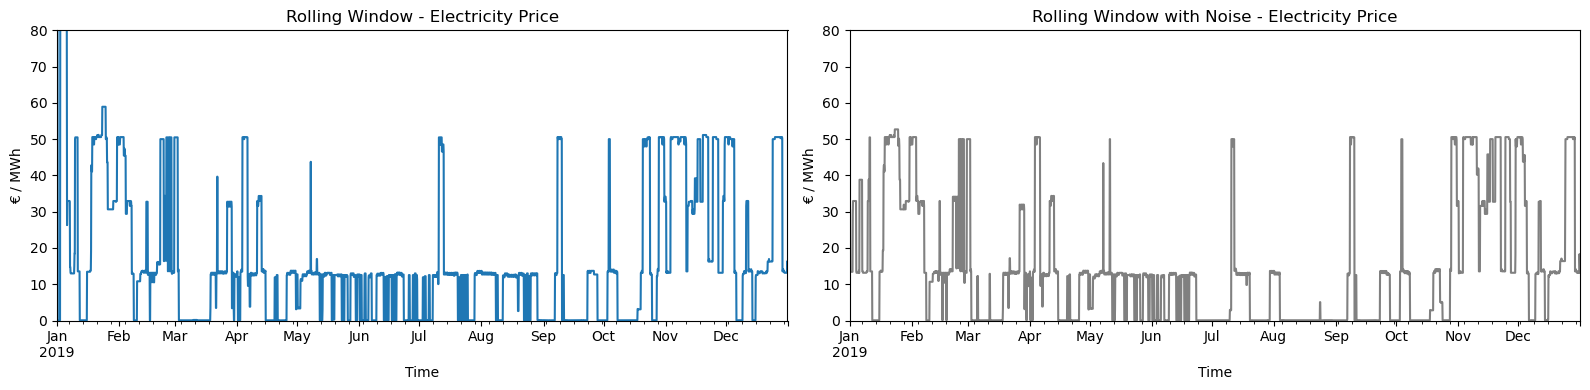

18.731493287636955
14.474517413866643


In [74]:
fig, ax = plt.subplots(1,2, figsize=(16,4))

n.buses_t.marginal_price['DE0 0'].plot(
    ax = ax[0],
    ylim=(0, 80),
    title = 'Rolling Window - Electricity Price'
)

n_wind_noise.buses_t.marginal_price['DE0 0'].plot(
    ax = ax[1],
    ylim = (0, 80),
    title = 'Rolling Window with Noise - Electricity Price',
    color = 'grey'
)

ax[0].set_xlabel('Time')
ax[1].set_xlabel('Time')
ax[0].set_ylabel('€ / MWh')
ax[1].set_ylabel('€ / MWh')

plt.tight_layout()
plt.show()

print(n.buses_t.marginal_price['DE0 0 H2'].mean())
print(n_wind_noise.buses_t.marginal_price['DE0 0 H2'].mean())

- fast gar kein Unterschied.
- allerdings ist der unterschied im Wind-Dispatch auch nur minimal (2%)
- das macht auf das gesamte Stromnetz durch die riesen verfügbarkeit an Kapazitäten und flexibilität fast gar keinen unterschied

- obwohl es natürlich auch an der nicht vorhandenen korrelation liegt. weil gerade bei wind, wenn mal 2h nichts weht und dann für 2h mehr, das ist ja kein problem. wenn jetzt aber korreliert ist und dann für 7h kein wind kommt da wird es ja spannend

- vlt geht es auch weniger schwankungen so genau zu modellieren sondern eher den fokus auf windausfälle zu legen, also einfach mit einer gewissen wahrscheinlichkeit phasen einzubauen in denen weniger wind ist - nur mal als idee

In [90]:
print(n.statistics.dispatch().loc["Generator", 'Onshore Wind'])
print(n_wind_noise.statistics.dispatch().loc["Generator", 'Onshore Wind'])

466214436.26067287
479068307.20915717


Good to know dass 2045 funktioniert, allerdings ist das Netzwerk glaube ich einfach zu flexibel. Und die arbeit reinzustecken bis sich kleine Stromschwankungen nicht mehr durch Preisschwankungen in Wärme, Gas, Whatever auswirken ist glaube ich zu hoch für den Erfolg den man dann hat

Was man noch probieren könnte ist ob sich mit co2 constraints, dadurch dass sich das allgemeine Preisniveau erhöht, auch mehr Schwankungen dazu kommen

Aber fürs erste würde ich jetzt erstmal auf 2035 übergehen:

--> notebook_2035 :)